In [29]:
import numpy as np
import pandas as pd
import time
import cv2
import threading

from matplotlib import pyplot as plt
import math

In [30]:
def auto_canny(gray, sigma=0.33):
    # compute the median of the single channel pixel intensities
    edged = np.zeros((260,680),np.uint8)
    for j in range(0,680,40) :
        for i in range(0,260,40):
            image = gray[i:i+40,j:j+40]
            v = int(np.mean(image))
            # apply automatic Canny edge detection using the computed median
            lower = int(max(0, (1.0 - sigma) * v))
            upper = int(min(255, (1.0 + sigma) * v))
#             print(lower,upper)
            edged[i:i+40,j:j+40] = cv2.Canny(image, 40, v+40)
    return edged

In [31]:
def hod_rd_sub1(meanhls,meanc):
    for i in range(my,shape[1]-lmd,lmd-2):
        ver_rd(i,meanhls,meanc)

In [32]:
def hod_rd_sub2(mean1hls,mean1c):
    for i in range(my+lmd,0, -(lmd-2)):
        ver_rd(i,mean1hls,mean1c)

In [33]:
def hor_rd(meanhls,meanc):
    hod_rd_sub1(meanhls,meanc)
    hod_rd_sub2(meanhls,meanc)

In [34]:
def ver_rd(x,meanhls,meanc):
    lm1 = lim1
    lm2 = lim2
    lmc = limc
    for i in range(mx,lmd+1,-(lmd-10)):
        lm1 += lm1*0.01
        lm2 += lm2*0.01
        lmc += limc*0.02
        lowhls = meanhls - [0,lm1,lm2]
        highhls = meanhls + [180,lm1,lm2]
        lowc = meanc - lmc
        highc = meanc + lmc
        newscr[i-lmd:i, x:x+lmd] =  cv2.inRange(scr[i-lmd:i, x:x+lmd],lowc,highc)#cv2.inRange(hls[i-lmd:i, x:x+lmd],lowhls,highhls)#+
        
        reshls = [0]+[np.mean(hls[i-lmd:i, x:x+lmd,j]) for j in range(1,3)]
        reshls = np.array(reshls)
        
        resc = [np.mean(scr[i-lmd:i, x:x+lmd,j]) for j in range(3)]
        resc = np.mean(resc)
        
        if(abs(reshls[1]-meanhls[1])<=15 and abs(reshls[2]-meanhls[2])<=15):
            meanhls = (4*reshls+6*meanhls)/10
        
        
        if resc <= 0.8*np.mean(highc) and resc >= 0.8*np.mean(lowc):
            meanc = (5*resc+5*meanc)/10
      

In [35]:
def dist(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

In [88]:
def sift_knn(prev_scr,scr):
    img1 = scr        
    img2 = prev_scr 
    sift = cv2.xfeatures2d.SURF_create()
    kp1 = sift.detect(img1,None)
    kp1, des1 = sift.compute(img1, kp1)
    kp2 = sift.detect(img2,None)
    kp2, des2 = sift.compute(img2, kp2)
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(des1,des2, k=2)
#     FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]
#     draw_params = dict(matchColor = (0,255,0),
#                        singlePointColor = (255,0,0),
#                        matchesMask = matchesMask,
#                        flags = 0)
#     img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    cv2.imshow('img3',img3)
    
#     matchesMask = [[0,0] for i in range(len(matches))]
    j=0
    k=0    
#     for i, (m1,m2) in enumerate(matches):
#         k+=1
#         if m1.distance < 0.9 * m2.distance:
#             j+=1
#             matchesMask[i] = [1,0]
#             pt1 = kp1[m1.queryIdx].pt
#             pt2 = kp2[m1.trainIdx].pt
#             dist = dist(pt1,pt2)
#             if i % 1 ==0:
                ## Draw pairs in purple, to make sure the result is ok
#             cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 1, (255,0,255), -1)
#             cv2.circle(img1, (int(pt2[0]),int(pt2[1])), 1, (0,255,255), -1)

#     print(j)
#     print(k)
    ## Draw match in blue, error in red
#     draw_params = dict(matchColor = (255, 0,0),
#                        singlePointColor = (0,0,255),
#                        matchesMask = matchesMask,
#                        flags = 0)

#     res = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)


In [165]:
import numpy as np
import pandas as pd
import time
import cv2
import threading
from sklearn.neighbors import KNeighborsClassifier
import copy

classifier = KNeighborsClassifier(n_neighbors=1)  
# lim = 4*std
lmd = 50
lim1 = lim2 = 10
limc = 30
kernel = np.ones((3,3),np.uint8)
shape = [480,680]#scr.shape
scr2 = 0
mx = shape[0] - 220
my = shape[1]//2
print("running")
kkk = 300*8*2
mask_prev1 = np.zeros((shape[0]-220,shape[1]),np.uint8)
mask_prev2 = np.zeros((shape[0]-220,shape[1]),np.uint8)
mean_prev_hls = 0
mean_prev_c = 0
vrec = cv2.VideoCapture('v4.mp4',0)
prev_info_countours = []
prev_scr = None
beg = 1
while(kkk):
    ret, scr = vrec.read()
    kkk-=1
# prev_scr = scr[220:480,:]
while True: 
    start_time = time.time()
    blank = cv2.imread('blank.png', 0)
    blank = cv2.resize(blank,(680,260))
    ret, scr = vrec.read()
    if not ret:
            break
    scr = cv2.resize(scr, (680,480)) 
    scr = np.array(scr[220:480,:])
    
    cv2.imshow('scr1',scr)

    frame = cv2.GaussianBlur(scr, (5, 5), 0)
    scr = cv2.addWeighted(scr,2.5,frame,-1.5,0)
    scr = cv2.bilateralFilter(scr,9,75,75)
    
    cv2.imshow('scred',scr)
    hls = cv2.cvtColor(scr, cv2.COLOR_BGR2HLS)
    gray = cv2.cvtColor(scr, cv2.COLOR_BGR2GRAY)
    
    canny = cv2.Canny(gray,50,100)
    canny = blank-canny
    cv2.imshow("blank1",canny)
    cv2.imshow("gray",gray)
    dist_transform = cv2.distanceTransform(canny,cv2.DIST_L2,5)
    ret, blank = cv2.threshold(dist_transform,0.02*dist_transform.max(),255,0)
#     blank = cv2.dilate(blank,kernel,iterations = 2)
    blank = cv2.morphologyEx(blank, cv2.MORPH_OPEN, kernel,5)
    cv2.imshow("blankobj",blank)
    
    
    blank = np.uint8(blank)
    cntblank = cv2.imread('blank.png', 0)
    cntblank = cv2.resize(cntblank,(680,260))
    img2, contours1, hierarchy1 = cv2.findContours(blank, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    info_countours = []
    train_info_countours = []
    ind = 0
    indexes = []
    for cnt in contours1:
        if len(cnt)>5:
            indexes.append(ind)
            ind+=1
            (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
            x,y = int(x),int(y)
            mA = int(ma)//2
            color = np.mean(gray[y-mA:y+mA,x-mA:x+mA])
            y = max(min(259,y),0)
            x = max(min(679,x),0)
            if np.isnan(color):
                color = gray[y,x]
            info = [color,y,x,angle,MA,ma]
            train_info_countours.append(info)
            
            if not beg:
                ind_pred = classifier.predict(np.reshape(info,(-1,6)))
                ind_pred = int(ind_pred)
                if  len(prev_info_countours[ind_pred]) >= 15:
                    del prev_info_countours[ind_pred][0]
                info_countours.append( prev_info_countours[ind_pred] + [info[1:3]])
            else:
                prev_info_countours.append([info[1:3]])
#             cv2.ellipse(scr,(x,y),(int(MA),int(ma)),angle,0,360,(0,255,255),1)
            cv2.ellipse(cntblank,(x,y),(int(MA),int(ma)),angle,0,360,50,1)
  
    beg = 0
    train_info_countours = np.reshape(train_info_countours,(-1,6))  
    indexes = np.reshape(indexes,(-1,1)) 
    classifier.fit(train_info_countours,indexes)
#     scr = cv2.drawContours(scr, contours1, -1, [255,255,0], 1)
    cntblank = cv2.drawContours(cntblank, contours1, -1, 0, 1)
#     cv2.imshow("scrobj",scr)
    cv2.imshow("blankobj2",cntblank)
    if info_countours !=[]:
        prev_info_countours = copy.deepcopy(info_countours)

#     scr1 = scr
#     scr2 = scr
#     newscr = np.zeros((shape[0]-220,shape[1]),np.uint8)
    

###   HLS
        #     hls = cv2.cvtColor(scr, cv2.COLOR_BGR2HLS)
        #     meanhls = [0]+[np.mean(hls[440-220:480-220,200:480, 1]),np.mean(hls[440-220:480-220,200:480, 2]) ]
        #     std = [np.std(hls[440-220:480-220,200:480, 1]) ,np.std(hls[440-220:480-220,200:480, 2])]
        #     lim1 = (lim1 + 16*std[0])/5  #(1:4(4))/5
        #     lim2 = (lim2 + 16*std[1])/5
        # #     print(lim1,lim2)
        #     meanhls = np.array(meanhls)
        #     meanhls = 0.3*meanhls + mean_prev_hls*0.7
        #     mean_prev_hls = meanhls


#### RGB
        #     meanc = [np.mean(scr[440-220:480-220,200:480, 0]),np.mean(scr[440-220:480-220,200:480, 1]),np.mean(scr[440-220:480-220,200:480, 2])]
        #     meanc = np.array(meanc)
        #     meanc = 0.2*meanc + mean_prev_c*0.8
        #     mean_prev_c = meanc

####
#     hor_rd(meanhls,meanc)

        #     cv2.imshow('newscr',newscr)
        #     mask3 = newscr #+ mask1
        #     mask4 = mask_prev1 + mask3 
        #     mask_prev1 = mask3 
    
#     dist_transform = cv2.distanceTransform(mask4,cv2.DIST_L2,5)
#     ret, mask4 = cv2.threshold(dist_transform,0.03*dist_transform.max(),255,0)
#     cv2.imshow('band4',mask4)
#     mask4 = np.uint8(blank)
#     im2, contours, hierarchy = cv2.findContours(mask4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            
#     for i in range(len(contours)):
#         epsilon = 0.003*cv2.arcLength(contours[i], True)
#         contours[i] = cv2.approxPolyDP(contours[i], epsilon, True)
#             for k in range(len(contours[i])):
#                 [point.append([i,j] for i incontours[i][k][0][0]:contours[i][k+1][0][0], contours[i][k][0][1]:contours[i][k+1][0][1]]
                
#             print(len(contours[i]))
#     last = contours
        
    
#     cv2.line(scr2,(0,480),(340,240),(255,255,0),2)
#     cv2.line(scr2,(680,480),(340,240),(255,255,0),2)

#     cv2.imshow('band4',mask4)
#     scr = cv2.drawContours(scr, contours, -1,[0,255,255], 3)
#     cv2.imshow('print',scr)
#     cv2.imshow('blank',blank)



#     cv2.line(scr2,(0, 480),(340, int(220)),(0, 255, 255), 1)
#     cv2.line(scr2,(680, 480),(340, int(220)),(0, 255, 255), 1)
    
#     cv2.line(scr2,(0,int(220)),(680,int(220)),(0,0,255),2)#216  220
    
#     for ind in range(0,260+20,20):
#         xx = (ind)*2
#         cv2.putText(scr2,str(xx),(10,480-ind), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,0),1,cv2.LINE_AA)
#         cv2.line(scr2,(0,480-ind),(680,480-ind),(0,255,255),1)

    print("FPS: ", 1.0 / (time.time() - start_time))
#     time.sleep(1)
    q=cv2.waitKey(1)
    if q == 27:
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()

running


/Users/shreyashkawalkar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shreyashkawalkar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shreyashkawalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


FPS:  2.2557067557124024
FPS:  12.338837456277377
FPS:  12.028333648788937
FPS:  12.17815871688559
FPS:  12.524161159998448
FPS:  12.665261530471124
FPS:  12.327848808159187
FPS:  12.51392274391281
FPS:  12.379005029159682
FPS:  12.731733229722224
FPS:  12.46120342613692
FPS:  13.193701203515548
FPS:  12.504334760365861
FPS:  13.131945509820067
FPS:  12.063031530145327
FPS:  13.016046995881965
FPS:  12.931612943008217
FPS:  12.617332081919477
FPS:  11.673218112493391
FPS:  8.82099556037864
FPS:  10.607266234718702
FPS:  11.706548102498834
FPS:  11.830937605776825
FPS:  12.652004597104789
FPS:  12.072788398989115
FPS:  12.44740950018103
FPS:  11.457092283822469
FPS:  12.154337891604147
FPS:  12.417412723224858
FPS:  12.279270206337682
FPS:  11.646477015563608
FPS:  11.804267127470654
FPS:  10.783769469283653
FPS:  11.643890454312007
FPS:  11.924071289065276
FPS:  11.591374254864625
FPS:  11.896136163164359
FPS:  11.924105188343994
FPS:  11.706580776251375
FPS:  12.145187304363438
FPS:  

In [159]:
print(np.isnan(np.mean(gray[55,701])))
# cv2.imshow('test1',gray[105-39:105+39,510-39:510+39])

IndexError: index 701 is out of bounds for axis 1 with size 680

In [28]:
import numpy as np
import pandas as pd
import time
import cv2
import threading
# import keras
import skimage.measure
# lim = 4*std
lmd = 40
lim1 = lim2 = 10
limc = 25
kernel = np.ones((3,3),np.uint8)

shape = [480,680]#scr.shape
scr2 = 0
mx = shape[0] - 220
my = shape[1]//2
print("running")
kkk = 300*8*2
mask_prev1 = np.zeros((shape[0]-220,shape[1]),np.uint8)
mask_prev2 = np.zeros((shape[0]-220,shape[1]),np.uint8)
mean_prev_hls = 0
mean_prev_c = 0
vrec = cv2.VideoCapture('v4.mp4',0)

while(kkk):
    ret, scr = vrec.read()
    kkk-=1

while True: 
    start_time = time.time()
    blank = cv2.imread('blank.png', 0)
    blank = cv2.resize(blank,(680//2,260//2))
    ret, scr = vrec.read()
#     scr =cv2.imread('c2.jpg', 1) #vrec.read()
    if not ret:
            break
        
#     keras.layers.Conv2D(scr, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), use_bias=True, kernel_initializer='glorot_uniform')   
#     keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
    scr = cv2.resize(scr, (680,480)) 
    scr = np.array(scr[220:480,:])

    cv2.imshow('scr1',scr)
    x = 340
    y = 130
    scr = cv2.resize(scr, (x,y)) 
    frame = cv2.GaussianBlur(scr, (3, 3), 0)
    frame = cv2.GaussianBlur(scr, (5, 5), 0)
    scr = cv2.addWeighted(scr,10,frame,-9,0)
#     scr = skimage.measure.block_reduce(scr,(2,2,3), np.max)
    cv2.imshow('scr2',scr)
    hls = cv2.cvtColor(scr, cv2.COLOR_BGR2HLS)
    gray = cv2.cvtColor(scr, cv2.COLOR_BGR2GRAY)
    mean1 = np.mean(gray[440//2-220//2:480//2-220//2,200//2:480//2])
    mean1 = np.array(mean1)
    low1 = mean1 - 10
    high1 = mean1 + 1
    
    canny = cv2.Canny(gray,min(50,mean1-1),high1)
    canny = blank-canny

    im2, contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    scr = cv2.drawContours(scr, contours, -1, 0, 1)
    blank = cv2.drawContours(blank, contours, -1, 0, 1)
#     dist_transform = cv2.distanceTransform(canny,cv2.DIST_L2,5)
#     ret, blank = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)
# #     blank = cv2.dilate(blank,kernel,iterations = 2)
#     blank = cv2.morphologyEx(blank, cv2.MORPH_OPEN, kernel,5)
#     scr = np.multiply(scr,blank) 
    cv2.imshow("edge normal canny", scr)
    cv2.imshow("blankobj",blank)
    sift_knn(prev_scr,scr)
    prev_scr = scr
    scr1 = scr
    scr2 = scr
    newscr = np.zeros((shape[0]-220,shape[1]),np.uint8)
    

###   HLS
    hls = cv2.cvtColor(scr, cv2.COLOR_BGR2HLS)
    meanhls = [0]+[np.mean(hls[440//2-220//2:480//2-220//2,200//2:480//2, i]) for i in range(1,3)]
    std = [np.std(hls[440//2-220//2:480//2-220//2,200//2:480//2, i]) for i in range(1,3)]
    lim1 = (lim1 + 16*std[0])/5  #(1:4(4))/5
    lim2 = (lim2 + 16*std[1])/5
#     print(lim1,lim2)
    meanhls = np.array(meanhls)
    meanhls = 0.3*meanhls + mean_prev_hls*0.7
    mean_prev_hls = meanhls


#### RGB
    meanc = [np.mean(scr[440//2-220//2:480//2-220//2,200//2:480//2, i]) for i in range(3)]
    meanc = np.array(meanc)
    meanc = 0.2*meanc + mean_prev_c*0.8
    mean_prev_c = meanc

####
#     hor_rd(meanhls,meanc)


#     cv2.imshow('newscr',newscr)
#     mask3 = newscr #+ mask1
#     mask4 = mask_prev1 + mask3 
#     mask_prev1 = mask3 
    
#     dist_transform = cv2.distanceTransform(mask4,cv2.DIST_L2,5)
#     ret, mask4 = cv2.threshold(dist_transform,0.03*dist_transform.max(),255,0)

#     cv2.imshow('band4',mask4)
    mask4 = np.uint8(blank)
    
    im2, contours, hierarchy = cv2.findContours(mask4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            
#     for i in range(len(contours)):
#         epsilon = 0.003*cv2.arcLength(contours[i], True)
#         contours[i] = cv2.approxPolyDP(contours[i], epsilon, True)
#             for k in range(len(contours[i])):
#                 [point.append([i,j] for i incontours[i][k][0][0]:contours[i][k+1][0][0], contours[i][k][0][1]:contours[i][k+1][0][1]]
                
#             print(len(contours[i]))
#     last = contours
        
    
#     cv2.line(scr2,(0,480),(340,240),(255,255,0),2)
#     cv2.line(scr2,(680,480),(340,240),(255,255,0),2)

#     cv2.imshow('band4',mask4)
#     scr = cv2.drawContours(scr, contours, -1,[0,255,255], 3)
#     cv2.imshow('print',scr)
#     cv2.imshow('blank',blank)



#     cv2.line(scr2,(0, 480),(340, int(220)),(0, 255, 255), 1)
#     cv2.line(scr2,(680, 480),(340, int(220)),(0, 255, 255), 1)
    
#     cv2.line(scr2,(0,int(220)),(680,int(220)),(0,0,255),2)#216  220
    
#     for ind in range(0,260+20,20):
#         xx = (ind)*2
#         cv2.putText(scr2,str(xx),(10,480-ind), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,0),1,cv2.LINE_AA)
#         cv2.line(scr2,(0,480-ind),(680,480-ind),(0,255,255),1)

    print("FPS: ", 1.0 / (time.time() - start_time))
    q=cv2.waitKey(1)
    if q == 27:
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()

running
66 38.963972353824964
73 2.8921892439949324
78 3.0513636630539156
79 3.0513636630539156
80 2.916816237026944
82 2.573391406342342
109 0.19598089825903853
112 3.118392500276096
113 3.118392500276096
114 3.6682387092748048
117 3.024902312251904
177 90.10095766171698
198 19.605144244632314
221 0.11155942706317427
14
FPS:  3.356468936907119
10 19.644312250592417
11 19.644312250592417
12 2.6844818723104176
14 0.061791696688112394
24 19.500489826694974
28 0.11903923447999303
29 0.11903923447999303
30 0.09023534176732265
31 0.4747722969408163
32 0.2950273398407337
33 0.07273137020376776
35 0.10425014236899158
36 0.11712337474165864
37 0.11712337474165864
40 0.06749878540232201
42 0.12014709125620707
43 0.12014709125620707
44 0.03880952807350699
45 0.04670437228457869
46 0.04670437228457869
47 0.18358256966708172
51 0.08531312365075268
54 0.07465151207319745
55 0.2387992537122658
56 0.0934153317336348
57 0.0934153317336348
58 0.030083574547976236
59 0.08342312530035043
60 0.08342312530

2 4.333259036467311
3 0.4825329361436214
4 0.4825329361436214
5 0.005476207855356782
14 0.019181064967441812
16 0.030958764627229362
22 0.10981751150831123
23 0.24563144232240935
25 0.739836075553773
30 0.05752677928990102
34 0.3576907811891517
35 0.06599763641113081
40 0.08212085850574931
45 0.07569201147658854
46 0.07569201147658854
51 0.07123983257973271
52 2.669672619249834
55 0.14326478884184202
56 0.14326478884184202
59 0.16709952171034234
67 2.025427096560718
74 1.8148144553964698
75 0.7950353017592227
76 1.4733367540680877
77 1.4733367540680877
83 0.2726454579982925
88 0.001490058058561243
89 0.001490058058561243
91 0.199917274300075
92 0.3588903119595025
93 1.8284894799000513
97 0.15733360566688306
99 1.5403458889408204
102 0.0
144 1.8046020172024673
164 1.839436976842657
165 1.839436976842657
166 22.370852688147647
170 2.436169327931619
178 3.784749231455796
181 5.751058870429861
187 0.03809440958720997
195 0.6001327064919121
197 6.530395525527789
199 0.042982051291562406
201

5 9.5367431640625e-06
7 0.17129476096266608
10 0.19728654099966442
12 0.19728654099966442
14 0.25615404021601984
15 0.1509993215487948
16 0.008249790859565863
17 0.03984374652306224
19 0.17114257255566434
21 0.01645916915252763
22 0.01645916915252763
23 0.01645916915252763
28 0.22358614581589548
53 0.0028281909292134145
54 0.0028281909292134145
59 1.3890245605281115
65 1.90087814468013
70 0.46169823595527615
73 0.8772836369930843
74 1.5754942590306005
85 0.8163969828867386
88 0.40685763461527447
94 0.8180946545675539
99 0.34268942974732525
101 0.4986802774585494
102 0.18794501723301063
103 0.3345075604967527
109 2.994040099809334
117 0.9022737233800225
120 0.4311980740179205
122 0.6110328269223343
123 0.9248551578506141
131 0.07229845013927234
133 49.82795880837927
134 1.30714404279335
136 0.6302474498636779
139 0.9760683307832693
151 0.8017630696342136
158 0.4840321414336128
159 0.4840321414336128
161 0.5648182575651666
163 0.9755469306113181
166 0.6071342856599281
167 0.6071342856599

4 0.0
9 33.54837210095292
10 3.260265930789257
13 0.536833934766153
17 0.004452629705567457
19 0.1817176664217564
25 0.43228117159795393
26 0.4819855017689726
39 0.1860046651150166
50 66.38025194001177
51 66.38025194001177
53 1.7447817558170162
60 0.5504775546264302
63 1.317944094062728
69 0.8741542019423855
72 0.28868249493910964
76 0.5638941883646018
77 0.1967474268955428
81 1.426350628526967
82 2.1614456151342654
83 2.272170759620946
89 1.0708466494137212
90 1.0705132237757233
96 3.1025509681062733
111 0.1663514034854144
113 2.284601297354645
115 1.2986766976762802
140 1.8988581526567603
148 3.670670955695659
163 4.266557580430212
164 4.266557580430212
166 4.154175459103747
169 4.504890974543082
171 4.870537158187069
172 4.870537158187069
174 4.567196693822659
175 3.967813120984423
181 4.789461515277103
183 5.5018385460172805
187 4.869903126135958
189 10.373920215457574
193 10.730639196202425
197 5.552039093883928
205 31.415424946741588
212 4.491131716571208
219 6.282793755602555
22

0 0.0011164240634737128
3 31.245753582645047
10 0.003418626466547951
11 0.8623074103411783
12 0.03315101002066652
13 0.06589065006087379
14 0.054366444754931985
15 0.3164489726138547
16 0.15207759099271517
19 0.15469013344926527
22 24.841515791481868
23 24.841515791481868
28 0.24230645956816002
46 0.4004635986587286
53 0.03970155942722973
54 0.04684327913037346
59 0.3301968284371822
62 0.916817092835114
74 0.6674326562203959
75 0.6674326562203959
84 0.01501786298863207
86 0.318666167420424
88 0.3056843109422945
91 0.18193600313143402
98 3.9288828147372308
100 1.8502297298923231
103 0.07599933658035019
104 0.39611217600053805
121 2.58228061005257
125 1.338972718234559
126 0.002073856405680862
129 0.026889450345869155
132 0.0057384082184380155
137 0.09153505856034516
138 0.03405702092219595
139 0.03405702092219595
140 0.02864952948595404
151 1.0583444873574224
154 0.007747217200995405
155 0.007747217200995405
166 0.8313543108806933
167 0.8313543108806933
171 0.9010872677540162
173 0.1552

0 0.0
1 0.3554925072990341
2 0.5793127063270244
3 0.5793127063270244
5 0.07595118432505424
8 0.571332951894646
13 0.027575626221251363
19 0.18510746280150048
20 0.09149617609798737
32 0.02493208857147725
33 0.02493208857147725
39 27.58412210338571
40 0.05444871390744478
41 0.05444871390744478
47 0.3994958233247069
48 0.10927969355662552
54 1.498807094887554
62 0.22899169365228172
99 15.684114949303597
101 41.54890382130796
121 0.44140439598835585
127 0.5561385655391933
129 0.3641917668231747
130 0.3641917668231747
131 0.0335897375555831
132 0.1104690434888343
135 0.1321648734934379
137 0.48833033680819027
140 0.114484575463757
144 0.32971335013188774
145 0.4824270778941142
150 0.2830655781394623
151 0.7074162647348161
158 0.6469356214184336
159 1.1175778846504063
163 0.5576332352716561
173 1.5984876502846357
174 0.04278467014151451
175 0.6188395007575844
178 3.9245660767286386
179 0.14141856342948828
181 0.09230205340830344
198 1.4070796497960023
202 1.1986479098659224
210 0.7099085480

13 8.975184997315e-05
22 0.005902918620223508
25 0.43284032916487697
27 0.26074532400813777
28 0.26074532400813777
32 0.4788863700966677
38 0.06094815347541616
44 0.4411997545836408
45 0.4411997545836408
49 0.003788585943185959
52 0.3067673654538536
54 6.662082365636055e-05
55 0.09157181739608439
56 0.09157181739608439
57 0.11396244785304088
58 0.46564227584390594
61 3.746266690283107
66 0.3711577436363422
67 0.3248662710516664
72 0.08132493721069586
78 0.1310843523856295
94 245.44240376308392
100 13.979497382908853
107 0.15713238627115683
111 0.13010749936513105
113 0.3159319758994968
114 0.4139399060416446
116 0.07564035380229547
118 0.11488032605996515
120 0.24278791140796963
122 0.24278791140796963
123 0.2865571538840922
125 5.072804540745802
127 0.09009236239691044
128 0.012287904347867647
131 0.23454188776071488
135 0.21407632218085662
147 0.17468832607165735
148 0.8720597257384858
155 0.021971644272282542
156 0.021971644272282542
165 0.8083363373224778
167 0.8083363373224778
174

6 15.448465168113675
7 15.38892305473213
9 0.07999437311215052
10 0.07999437311215052
12 0.077146814600294
17 0.47863583769920603
39 0.00811366380058022
40 0.17831257293495117
41 0.17831257293495117
42 22.095864951703224
43 1.3936780477249116
45 157.71821422171658
67 0.1424586285557389
68 0.6371767007617465
69 0.6371767007617465
70 0.4947578339021499
71 0.37539266206228816
74 0.6542448394214948
75 0.624822831048811
77 0.04381548525980822
78 0.26750405717401843
80 1.056451017298428
81 1.056451017298428
83 0.023538306951469426
86 0.360642944820604
88 0.9427337993791429
91 0.6822365644892123
92 0.5402798753952449
93 0.48263444499390273
94 0.08056172597541068
95 0.0772401840022146
96 0.3353425752488598
99 0.6441119953982787
106 0.48710725896120666
109 0.5118648171940577
110 0.06299504208690751
111 0.06299504208690751
114 0.42756635576652213
116 1.0286165815782338
117 1.0286165815782338
118 0.3523234847664252
122 0.2025384302644417
141 2.4022288955740034
156 1.1772658940329463
157 5.8651562

3 0.003033643846647115
6 0.5108554475433643
7 0.260354560323893
8 0.05412585269653986
12 0.8638101936012302
16 0.40850484672512727
18 0.017833936149261244
19 0.10640723554685896
20 0.08767575093129353
22 0.021274455841251944
23 0.5645651348996132
32 0.0454913288367907
47 1.4985577563974029
60 0.12491335838501876
63 0.6046744940000566
64 0.6046744940000566
66 0.5474732915428192
69 1.2029948498531002
72 0.3372914620123479
73 0.4461674750972316
74 0.4461674750972316
76 0.5426112285992041
78 1.1307849372753331
85 0.2306518343019236
86 0.4579367852028101
88 2.1500348058583003
90 0.1142466748038079
94 0.13243822336083827
95 0.5116916188766275
96 1.5261266727754188
97 0.775927311813924
100 0.8982849583837187
102 0.469778310623373
104 0.6112998862188597
109 0.3381838402270786
118 0.7187639418852007
122 1.2455230210449337
126 2.0215790823736253
128 1.2795141764956033
134 3.8217310033255902
154 37.25739305766102
160 13.350909551282971
167 6.042294045600026
172 2.3887874431280136
178 6.6095286731

1 3.814697265625e-06
2 2.3562152410126895
6 0.4046646773019702
9 0.1641572959861944
12 0.011643754004326051
13 0.23353487258859648
14 4.098076964300812
17 0.03774853566034327
21 6.961169277532447e-05
22 0.0
25 0.010610900502415291
30 0.00165998952393043
44 1.8184799033622523
45 32.24255692136567
49 0.0028151974764213782
50 0.0
53 0.009776367485302924
54 0.1850045818580226
55 0.1850045818580226
59 4.744868161016728
67 0.050552065372279874
68 0.22255544438593342
69 0.1323852100615167
70 1.0816566861482695
72 7.304065401347224
77 0.31895922484616873
78 0.5511087923779531
79 0.024768779701125582
83 0.26233462853842177
84 0.00025498619029340214
85 2.5867180447407936
87 0.0
88 0.0
91 0.0029225685132016044
92 0.6094241986990128
93 0.1938279713420598
94 0.011536619767084286
96 0.1515237700136499
97 1.1093316352255431
98 0.0
100 0.0
107 1.1179805267205805
114 1.7359114890352676
116 2.599493528977999
121 2.2044438565702564
129 2.349941739621484
131 1.991550721298018
144 1.0380397389192138
146 1.

2 0.311537924795211
5 0.6073239754923884
13 0.08361943071686835
27 0.049107931974329416
37 1.3071221192436442
38 1.0454010780435208
39 4.95210775666918
40 4.219333419351032
41 3.16348375331879
42 3.9565163466321214
43 3.9565163466321214
60 0.18125826546156526
61 0.02049170475988631
62 0.02049170475988631
63 0.30355018435232994
66 0.3120176076146754
68 0.3463912035579419
71 0.05432982113220482
75 0.032640259652472844
79 0.32676831928056516
80 0.09629749613047085
83 0.010027167411997195
90 0.36753094090157
99 0.22554104586547027
103 1.6002856048496747
108 3.007301293667666
109 2.3182775231647548
111 3.4426164574607645
114 3.1060026124549043
115 3.603670026543641
128 7.202052801778234
131 5.209453214943667
136 11.800887834116466
146 6.171412232111999
148 6.521152443731526
150 6.620290791480284
151 7.012351176207816
152 6.617049935149078
153 6.879818707638553
154 6.879818707638553
158 7.015215906498411
160 0.013352148854670952
168 22.52370610873672
169 0.024757943639350754
171 0.0113013379

2 22.253493500466003
3 22.253493500466003
9 1.33288414018138
16 0.015020638841926249
17 0.07028858329395583
20 0.006063660195092486
21 0.000577268445984709
22 0.0021977424104292855
23 0.09037170602095562
24 0.00044355596477504375
25 0.00044355596477504375
26 0.002854303735005911
27 0.002854303735005911
30 0.03875191267786356
33 0.2033712060979159
34 0.05121365692813162
35 3.899905673401136
55 2.642241929629043
65 0.17934665880252407
66 0.4452480639098386
69 0.9720051092317901
75 0.3502586396479081
88 0.9517322382887945
92 0.3187759843344854
101 0.4303392455999245
106 2.277542707584934
116 11.418389909779869
123 6.912428571993294
128 12.383676003545524
139 14.880944241062748
158 16.86269793433649
170 13.020790604808358
171 0.01459609056252331
178 11.5377052118194
191 0.1494412165709831
35
FPS:  12.192283431149404
3 0.07856570459123183
4 5.705453101401509
5 0.0006806963587286397
7 0.058030487596636635
8 0.01122518099428432
9 0.2594614535080994
10 0.1629484900821421
12 5.221764191925944
1

74 0.6022587353323822
75 0.9457128515724688
77 0.3392009679283054
81 0.005521919235409093
84 0.013397269476958608
97 1.2921863787206929
102 0.07271774244460859
106 0.8477009302649365
108 0.03307630357020616
112 1.4514140485250122
113 1.4514140485250122
117 1.9447198385844569
118 1.9447198385844569
132 4.109617421457609
139 0.0007332161728963601
140 0.9164539281868467
143 0.0
144 0.0
149 0.0017198489750494838
150 9.84385913751897
157 0.0
158 0.0
159 0.0
160 10.148667094494545
163 0.0
167 0.0
51
FPS:  11.961306807811644
0 0.32752583380932593
3 4.162262588237868
6 7.62939453125e-06
7 7.62939453125e-06
8 0.06251959058876054
10 0.235766594062079
12 0.02626443757527748
21 0.024325252172541546
22 0.0032501243089838334
23 0.025670911929210852
28 0.05274591110021725
29 0.6106711901246702
30 0.08870934300879935
32 0.16290944763284046
35 3.8689878965207796
42 2.8865255154695584
55 1.009115874308227
60 0.5623007495471809
71 0.8208474691251021
72 0.8208474691251021
73 0.841919059742694
74 5.1478593

19 0.11154345394974818
23 9.670670775475129
30 0.10432330665672802
50 0.7230654555496718
51 6.061009734981354
52 1.4356962938179476
58 1.199755563738497
59 1.199755563738497
62 0.08935229484808117
64 0.019895030162802353
65 0.003198839179223819
66 0.07461692988070438
67 0.20872561372373147
68 1.057547053079554
69 0.17199961507146905
70 0.17199961507146905
79 0.10715028027887388
87 0.0914514009441147
90 0.6783653655661389
91 0.494883942510585
93 0.14678170630298829
94 0.18316212747081137
96 34.163508639911896
98 0.008141522051731936
101 0.003553758541751704
104 0.28773172292939947
107 0.38599888865258497
111 1.5504400145728583
115 5.012999844325277
117 5.618174552851027
118 5.586895008755629
124 10.130146086697087
133 11.018971304960738
144 0.0007199577907311145
147 0.9049760620425246
161 0.0017163424807332807
163 14.761017927223461
166 13.024163811660653
167 14.37375386876137
172 0.0006179338602086361
177 0.23225525084473847
41
FPS:  11.903361022581826
3 9.18150426458424
4 0.0201140986

6 0.6524128684975012
14 3.5706476526403708
24 1.4869267146224543
28 0.10521085356315843
29 0.02505779946905129
31 0.012938881807490176
32 0.012938881807490176
33 0.011007503791371134
35 0.08487086627425669
36 0.020690785747994583
37 0.020690785747994583
38 0.07822991875370852
39 0.07822991875370852
40 0.05079642127096257
41 0.18547176880889657
44 7.358811382562998
51 5.295429217258969
56 4.566276392793799
57 4.451546102088954
58 3.6814194646114036
59 3.6867424668130155
60 3.6867424668130155
63 3.290280399498577
64 3.290280399498577
77 8.536316280342515
78 8.536316280342515
79 0.1822314047875976
85 0.19830609040962033
89 0.37716385475812625
90 0.37716385475812625
91 0.024709642646510308
93 0.5460675092155707
96 0.37143847866914703
97 0.3009116670957781
98 0.0053968947772611835
100 0.05423676901894352
101 1.47830794319113
104 0.4396760401833088
107 48.42466186612495
123 0.8178367303276504
124 0.6550498883899074
129 1.2268474745096807
130 0.6589643905633228
131 0.046480551394175944
133 0.

0 0.6862173852766335
4 0.34407751454806174
10 0.33414337102258035
11 0.33414337102258035
13 0.39369876079745525
16 0.012371775453423082
24 8.789707263034444
27 0.06409012059863806
28 0.05034018428048409
30 0.34561713586838577
31 0.04081217457821061
32 0.04081217457821061
37 0.4056947217762638
48 5.823748458871509
49 54.160761995359664
50 5.439444537643968
51 4.996183888658531
58 4.058801449583426
65 8.785980934360396
69 3.5939640111747364
78 57.9095757142957
86 0.32036792373121603
88 0.6858192137316486
91 0.24683910049722377
92 0.24683910049722377
93 0.46969207455648143
94 0.46969207455648143
100 0.0002560397978904699
101 0.0002560397978904699
102 0.7008568762156931
104 0.0015881790108055462
106 1.462454399450515
107 0.15192765179288972
109 0.2514567559061941
110 0.1810414905394355
111 0.1810414905394355
113 1.8765282642886276
114 0.14916326180963033
127 0.019118315942709463
128 0.019118315942709463
136 0.7258811380022819
139 0.6646604380157761
145 0.018400133638396328
146 0.0184001336

6 0.025697276838680273
9 0.9444049534968627
10 0.08289592552902769
14 0.010978552928006764
15 0.010978552928006764
17 0.018366489880942163
19 0.06284364881658999
21 0.012675685107067843
22 0.04528125032727022
23 0.016884076340612234
24 0.00010708365514845428
25 0.07008616135324762
26 0.004733639684097119
27 0.004733639684097119
40 2.3193972074470683
42 1.223553378587754
46 1.530675614701362
47 1.3405161606763838
50 1.018716388702026
51 0.13541637141320856
52 0.13541637141320856
54 0.022487496399034298
55 0.022487496399034298
56 0.014440855814525123
57 0.43311241577690857
58 0.0
62 0.004014540715165417
64 0.339666930347864
65 0.44905006142948617
66 0.14533392725938002
70 0.09746804461887446
75 0.30442884469491355
80 0.3575410207263503
81 0.3575410207263503
88 0.03237041249648529
92 0.07639621022453305
93 0.10794393007663988
95 0.546108065205983
98 0.06494435694899833
108 1.9963356604400155
132 2.8901983782463647
150 6.091407984076617
156 7.675378710960459
161 14.663742077159082
164 10.0

0 0.9432866269849582
9 0.09929568233159326
11 5.147203680235011
14 0.10199174366803375
18 0.38124396625089774
23 0.3781136966539426
25 0.1445100130768564
27 0.03611059186210798
41 0.10563837376650481
56 4.3796784283301
62 80.74795431876933
63 34.014570304417546
64 34.014570304417546
70 0.927547380681843
72 0.3793206709330194
77 0.09131262225380894
87 0.17400322193735518
92 0.2369123845667987
93 1.1763390290787161
97 0.5889537853500458
107 0.4339043531991966
109 1.0839772295340449
115 0.3001900047661045
119 0.594586093890971
123 1.4022883060466307
126 0.45396815067147617
133 0.4498602894487609
138 0.7468559608990566
139 1.5925360594292923
148 1.8763361084390147
152 0.287909554881569
158 6.657303148305369
159 2.0439465271908452
163 2.599566391636603
166 1.9427782726612148
168 1.4916903881250214
171 2.5875425974279014
174 2.537161046143743
175 2.7834164595709203
176 2.9896540851754327
177 3.342267741768447
190 7.530882849499112
195 8.61491411331205
202 12.540785156529322
203 11.8271010789

5 0.5631791970185209
10 0.2866785107533118
12 0.1017655159771801
14 0.04125578514767732
16 0.022052502675948108
17 0.022052502675948108
21 0.04888082536212527
27 0.03378282545247691
29 0.11222119129962457
44 0.7160700602987403
53 6.151295737689628
59 0.12384153716138785
61 5.696704827604282
62 0.03390446017772244
65 0.04374390449486594
66 0.09946897146181764
70 0.32953508460831377
71 0.29448987186127784
72 0.3840533476971962
73 1.267906443831549
75 0.8379452907143183
77 0.21372644922556833
82 0.01769886433184673
84 1.3269444849311953
86 1.4591183508541496
88 1.233043619452959
91 1.1053813903599314
92 1.1053813903599314
96 0.7810108654783552
105 1.1513489120602625
106 0.20621746478975142
114 0.5345617661861808
117 1.750817583944183
119 2.4799536565018285
122 2.464882666366095
123 2.730277153793561
127 3.807785642354482
129 4.834420443262433
141 7.314442524462419
142 9.096398841877877
143 9.121380564446403
147 11.189058937167692
164 11.097189613028434
165 11.80185366778813
170 0.00155731

0 0.7690164456407234
23 0.41889650533215655
37 0.22689522131733947
38 0.06794454363891596
39 0.1775672803093988
42 0.051780446210567245
43 0.051780446210567245
45 0.02894262282211944
47 0.1561131280667335
48 0.07441183434802551
49 0.28691931521673336
51 0.28691931521673336
52 0.6424974084022852
54 1.4042717798317563
65 1.5607815178367925
67 1.563058544686057
73 31.711099239137905
74 31.711099239137905
76 1.3352867502948307
84 0.3094658348153866
93 0.9985260184518134
94 2.2983829191503165
97 0.08651241746015215
98 0.09392771796837855
102 0.4475634205062857
114 3.535467539623007
115 3.535467539623007
116 3.5907972799323695
119 4.646639416164115
120 5.636678777470151
121 21.24701210376609
129 127.44553833335935
139 0.10779281316394501
140 0.10779281316394501
146 0.31208929858863454
35
FPS:  12.723352363387066
1 9.387132025391896
2 0.0075737989877816105
3 0.2851691313610352
8 0.028034699495815732
9 0.06745779057332234
11 0.3236155478805795
12 0.027475448682394578
13 0.09338940094388411
15 

23 0.1555064547706346
30 0.0007094208822504928
32 0.002642913556889864
33 0.002642913556889864
37 6.752429621096771
38 4.042122455989924
50 0.166216832834131
51 0.166216832834131
68 0.18543572708373218
69 0.05975201241997643
70 0.14374504718981607
90 68.77080738799923
94 1.6531668739454328
95 0.6555019012118365
100 1.52587890625e-05
101 1.52587890625e-05
111 0.006750122710567914
112 0.006750122710567914
113 0.019053384487747148
114 0.019053384487747148
115 0.007056497075890565
117 0.031139477289530856
123 1.5588782058464101
136 1.973728696168316
139 2.241595810174079
141 2.241595810174079
149 23.752351789320638
160 10.07638944067435
165 12.830199041411815
168 1.187713651667641
169 0.3194938208855067
170 0.039393586495890975
176 7.62939453125e-06
177 0.0
178 0.0
179 0.0
40
FPS:  12.293630578849102
0 0.0
1 0.003907367892791236
4 0.15044735754613867
6 19.475042318537906
7 0.1672003164727277
8 0.1672003164727277
11 0.5742970002577364
12 0.015688523510780455
13 0.3767107173915122
19 0.06858

0 0.03959831213693088
9 4.241364971924507
11 0.0598714615209542
12 0.0598714615209542
30 0.02255974163916585
31 0.6392833921533418
39 0.6907000520933034
40 0.6907000520933034
65 0.33546542700432963
76 0.40852451137343077
81 0.00026252213339363485
82 0.00026252213339363485
85 0.010973870313789602
91 1.9073486328125e-05
94 1.1937353542792588
96 0.0005697068695860129
97 0.0012392130818121335
99 0.03731270973467706
100 0.005948604227952947
101 1.7210909938648482
102 0.0
110 3.621285219440892
112 3.9267633009929503
115 4.546971991843304
116 4.168160922822565
134 0.04408005349975234
138 0.042307122523472254
151 0.009083696950935
152 0.12348272790483678
153 0.12348272790483678
156 0.007055210145123041
159 16.836057677721335
161 16.323509494946386
33
FPS:  12.569425006967524
2 0.0001658516136804838
4 0.30041798115854795
5 0.015201351901320236
7 0.014156533391336767
8 0.0029291466621040457
9 0.0004448663249851456
13 0.20322625695159122
15 5.320662258378202
16 0.006033828590860495
19 1.992852489

3 0.1348433730830615
4 0.007966477174287475
5 0.007966477174287475
7 0.0034446024544530036
8 0.02064217428407819
9 0.07067493000771978
11 0.038108531656744306
12 0.05207188003882263
15 0.9168565146753794
16 0.5513892361622075
26 0.00023592599633890117
29 6.42118863833827
33 5.4254737008500555
37 76.173114951459
44 0.6560086252731318
70 0.03383864832658688
71 0.03383864832658688
72 2.442598051999225e-05
73 2.442598051999225e-05
74 0.009748860401115592
79 0.12214924191759612
89 0.00026563553403554816
90 0.00026563553403554816
97 6.473755931273323e-05
104 0.05041269191261306
105 0.03974532330490321
117 2.2125610761741905
120 2.956137074636473
121 4.012445526399509
124 4.999853372036228
125 4.245778134499894
126 4.357807962454623
129 42.34553670290372
137 0.0
140 0.011905777113952683
160 13.842484145786363
168 0.03659149563280794
169 60.59935485153807
170 0.16206199477112987
171 15.11763995858515
173 0.006035868562556009
176 15.044936708331642
42
FPS:  11.280984822607671
0 0.0
1 0.0
2 0.00

9 0.014745274602522644
10 0.2357547391932439
12 0.041119410176996204
13 4.640779518354965e-05
16 0.25826939203963106
18 0.012222390644740497
19 0.13617344391740344
22 0.16973010009182568
23 0.1844616212389345
29 0.26980803193637354
35 0.16846685242703113
37 0.14664867743342233
45 0.26473353661138344
62 5.134358390023069
69 1.6431783192131382
71 7.787652149904102
79 0.21630244550406058
82 0.20753282518440475
86 1.6062367895995295
91 2.3386207736246747
98 0.046206698604405516
100 0.13960155830245816
108 0.6777137847131821
109 0.6777137847131821
110 0.07412108401614466
111 0.16746616928069122
117 0.13189292311906078
118 0.13189292311906078
123 0.14919273032154828
126 0.10727047064930006
132 7.750805105248316
135 0.26125231466571974
136 0.7232960935708267
141 0.2739404534009747
148 38.43602414923161
150 0.02317978091298651
152 1.2980627005878294
179 20.116977578753023
183 14.438210968940579
187 14.881930928145223
190 0.03682868611066506
196 0.10084308033578751
199 16.882379597767127
200 16

8 1.3736212346316055
9 11.275626707028211
10 11.275626707028211
11 0.08025367779695898
12 0.08025367779695898
13 4.825252777356536e-05
21 0.020898020555780047
22 0.020898020555780047
23 0.0005265145991130689
29 0.29178136294666407
30 0.29178136294666407
32 0.002802411207814099
33 0.002802411207814099
38 0.0162206328509357
39 0.0162206328509357
40 0.0162206328509357
43 1.1576473090240114
53 0.46016722891556877
55 0.22045076815396195
56 0.00036906087104638134
57 0.045726119278823425
58 0.1053190361505154
59 0.1053190361505154
60 1.600307893762201
61 1.600307893762201
63 0.029560871584041134
64 0.0007882405245263526
69 0.0004237577538146611
70 0.0004237577538146611
72 4.699963115551927
73 4.699963115551927
74 8.600049008492054
78 0.18529866900306824
79 0.21487954841195803
82 0.014194607445849959
83 0.0029887075836886367
84 0.06065309299322544
85 0.18983163398970831
86 0.002362612972667928
87 0.005328027423681118
90 0.2760404755676873
93 0.1843279566899471
94 0.03784463702587876
95 0.04262

6 0.6562226739832511
13 0.22015598151686896
27 0.4035360940920068
46 0.14271843760371775
49 0.0906407089873392
50 0.1986513469816208
52 0.1729240105697039
56 0.12676579111813532
57 0.12676579111813532
63 1.1281776454213341
68 0.12373916174678332
73 0.10181601370286303
154 13.981207240870717
170 26.565857580139156
172 0.11570502199141444
173 0.11570502199141444
176 0.22848900933931707
200 0.09679356524710377
18
FPS:  12.859927702642624
3 1.198984477818787
7 0.020874748789024733
8 3.982660869182797e-05
9 0.003023553694634968
10 0.05866230490727968
11 0.13714127858483297
14 0.014369237110223433
15 0.014369237110223433
19 7.62939453125e-06
20 0.24196728870469153
22 0.0008638415438670752
24 0.024076427869781165
25 0.012690261721003989
27 0.5302895050030587
28 0.0
29 0.00955876668443124
30 0.3782183172201199
34 5.394796609394436e-05
35 0.0006454508355195728
36 1.980246739749248
37 0.058756592586262625
38 0.19742266572844674
39 1.466764793639618
42 6.171251392054407
47 8.775834967841595
52 0.

4 0.13177440805770946
10 1.7584934263334144
14 0.012501768665989598
15 0.012501768665989598
17 1.9969890927806904
18 1.9969890927806904
28 0.278034047641407
49 0.9506927369422097
52 41.05334881980005
61 0.005516006079094086
63 0.00021609510861615825
65 0.0034758988963293886
66 0.00510805057071542
67 0.00510805057071542
68 5.501634636633284e-05
69 0.1573033959678932
70 5.501634636633284e-05
71 5.501634636633284e-05
83 0.44263005091187557
87 0.0
94 5.941877424824573
95 1.0123175746949187
102 2.2144946985872966
105 0.00608154634546824
113 0.757920191834726
122 2.0594662178891636
153 33.19921196047342
175 7.67353317021884
176 7.864063924087154
177 0.0
180 1.4928322122187772
190 0.4128717135864099
192 0.028908106101539297
193 0.028908106101539297
194 0.0010286959100758773
196 0.0
197 0.0
204 17.26994706510177
38
FPS:  12.092628471261186
0 0.0008977369753721978
1 0.0
6 0.19104238409097585
10 0.1114760743192218
23 0.1445305058587618
24 0.1445305058587618
25 0.1445305058587618
29 0.07208392360

9 1.8988776203506703
11 0.3573145188153839
17 2.697508230680211
23 2.6158201543323205
24 2.6158201543323205
35 0.0012643002524163145
38 0.013631382331082562
42 0.021046164325494672
43 0.021046164325494672
46 0.04418067571630333
47 3.195415140254953
50 0.7845119916299794
51 0.7845119916299794
76 2.556919339340625
96 1.3113661093039273
97 1.3113661093039273
99 0.5225853489368362
101 0.0011143095721594097
104 1.8115153772150387
106 1.0819192478288642
109 0.0012149676048214344
113 0.09864361982340315
114 0.0013278872964418585
117 0.24103003378567883
119 0.9843651155208393
120 7.0129494461234465
123 0.000148773193359375
130 0.04417064715096135
138 0.44952549043181256
143 0.6262969183041744
147 0.00480335070652742
148 0.019168088527607034
149 0.08803272027773786
160 0.2826193424200697
164 0.5330182065893874
165 0.6288126098824783
166 0.6288126098824783
171 0.5356343188943505
175 4.133088667952461
178 5.615381781411001
185 1.5837613335803922
199 5.055487482857721
202 8.016138194668454
203 7.4

3 0.49569250503036894
4 0.2313638014502533
5 0.22682866992149825
6 4.733653740510667
17 0.05273637589134511
33 1.7059844799040144e-05
36 0.13302667005749835
41 0.06399061370033109
42 0.06399061370033109
48 0.056604534707738616
50 0.02529489628846332
63 3.195966216967838
64 0.006816868283057517
68 40.47080207171041
69 40.47080207171041
71 41.69645617425319
84 2.1255192856950402
87 1.6195695980214482
97 0.5672841214512688
102 0.4625708196057837
106 0.08587781638008475
107 0.08587781638008475
109 0.12085326592917357
115 0.013757336404112976
116 0.013757336404112976
117 0.001529541388570218
118 3.377683596141722
119 0.44534404222706697
120 3.814697265625e-06
121 3.814697265625e-06
123 0.0
124 5.409712159399142
127 0.005888648469998612
128 0.04444262932120372
129 8.311148390075761
133 0.007327559821705981
144 0.1220879881101946
145 2.786258705803483
150 0.025296802513841796
153 0.0
161 0.297098464650048
162 2.450271848753116
173 1.7775702181570125
176 3.1832288538217037
178 3.7176255476693


0 319.39018528242764
5 0.063492381091814
6 0.09868826264990664
9 0.6067090324701478
10 0.021894300676113473
12 0.10492079093425707
17 0.009423300655456856
18 0.0037894539071730987
20 0.0379671951273475
21 0.0379671951273475
25 0.44893711477001186
28 0.0009401584349918001
34 25.068633246339868
42 11.820843471287969
46 106.78724606474391
49 1.9126621960808305
70 0.21797759703808872
71 0.03450989974809675
72 0.03450989974809675
74 0.17135802732532326
79 0.3600438362695055
80 0.09897373431495947
83 0.23662927019997704
85 4.740179956242507
89 0.019915416140342552
104 2.7447775033853783
110 0.11849264020887026
111 0.37765196074578133
113 0.0422381720388474
114 0.0422381720388474
115 0.29719615111049436
116 0.7098344392712186
118 0.5418593900311168
124 0.25879629420133815
127 1.4518382771724831
130 1.8134450550409498
132 1.809956036848612
135 3.163330286454313
142 3.9900316711080426
143 3.9900316711080426
155 8.721698469989063
159 2.3514637796780065
161 0.005198591280417764
167 9.139714084125

1 1.3513828153882657
2 12.220975576773549
4 0.02163797917218894
9 0.9685150156055473
11 0.09666860056969556
19 18.41234301247856
20 0.01601921799836021
34 3.772082425958927
35 0.00046672006497838016
37 0.0011798766758952881
38 0.0011798766758952881
39 0.05225023764037097
42 0.0
44 1.1638180197585126
45 1.1638180197585126
47 1.0490164758377765
48 1.6425416013916045
52 1.3628690544911213
56 4.137036758324091
71 0.24666185810858066
72 0.11975751624687256
73 0.025422024182079637
74 0.025422024182079637
78 0.024978904512969254
79 0.024978904512969254
80 0.08767649216907025
81 0.0036187485783877654
84 0.2589182009950675
93 0.46455125319930796
94 0.001259156392143666
95 0.001259156392143666
99 0.0
100 0.0
101 7.864199877963373e-05
102 0.25683222623417284
103 8.217109385886389e-05
106 0.17437567007908886
108 0.047513653381040105
109 0.047513653381040105
110 0.09842865890960419
112 0.7816276165563317
113 0.005052594969263669
114 0.01186769915125056
115 0.01186769915125056
116 0.1678065373362133

2 6.652824280630162
4 0.07038574596680239
5 0.12272085461443169
8 1.5379612459256553
10 1.9073486328125e-06
18 0.11796842545275618
21 0.12098900866219767
27 0.09062903629105656
32 0.0032244550857508407
43 0.16899985073272095
51 0.0706477735766469
53 0.07915416855005943
56 5.33149519955994
57 0.6096144892608117
60 0.9411097236753885
65 2.5252958313912712
66 2.6142684025785092
70 3.180892311239923
79 0.4526455535413539
80 0.03021508238686777
81 0.005628632351700056
82 0.005628632351700056
88 0.0286132892244087
89 0.0286132892244087
90 0.8246714430243296
91 0.37819256661168504
94 0.0020561784442756957
96 0.0015696957789273385
102 0.0060028355437319065
107 8.90550043482113e-05
108 9.7703922079969e-05
110 0.00013126106669681742
116 0.046817885229503815
120 6.486052031504194
124 0.18178468174189805
136 0.7551285413857329
139 0.11434458328932431
142 0.2207654701115078
154 0.7209413359880507
164 3.957693761087433
181 4.967184014359895
186 5.6988114811596144
189 4.546253219910279
192 3.13678521

12 2.3147669401750988
14 0.016037142015141007
19 0.0004145928396360329
21 0.004392969661990191
22 0.019202899968619912
23 0.016058772835288813
25 0.00540983791309907
26 0.00540983791309907
27 0.0032051630340152533
28 0.0032051630340152533
29 0.002154101821398912
32 0.35437536827570837
34 0.0
35 2.412626388678268e-05
36 0.0
37 0.04844215552391375
38 0.04844215552391375
39 0.04844215552391375
40 0.040388928734939225
41 0.040388928734939225
45 0.1071974583710549
46 0.005670508671026901
47 0.005670508671026901
49 0.028445315312173522
55 0.0770199183750975
67 1.2244664881751468
69 1.71026486539722
77 0.19338396020247692
81 0.06784430649424773
82 0.06784430649424773
86 0.6141428530124432
87 0.20540108883562042
89 0.3416620860887653
92 0.3304958317968137
95 0.09449408156447478
97 4.3208070396325535
98 0.363212128244609
100 0.17494158289340292
103 0.11557390156935352
106 0.629188317383719
112 0.19972469621430475
115 0.17432807271749512
120 1.901619142156202
133 0.28007635473749476
137 5.010968

3 5.732641755376491
4 2.1271934464401046
5 3.5817373476400647
9 0.2686982225956997
12 0.19367552268431334
32 0.31373625403205524
35 3.736383330473351
74 0.11648291529029317
75 3.939081750877184
76 0.4018329782851021
77 0.9416205396218692
86 0.11595185842418333
90 0.447737786055887
93 0.29866665215186555
96 0.43107369936967654
98 0.5564389629497994
99 0.4667452308441585
102 2.2691188922309453
107 0.18091908639663307
167 12.221412017303276
172 0.2179912864193204
180 0.1834312522596336
181 0.1834312522596336
184 0.19962360710782895
193 0.028800568230538497
25
FPS:  12.580018595722983
0 0.3063789165599706
4 0.011713782514311434
8 0.6065786028242873
9 0.6065786028242873
10 0.048743487556016415
11 0.048743487556016415
12 0.09442353207629765
15 0.04771514318499736
17 5.926273955869589
22 0.08280818448667257
24 0.00519381504464605
32 0.07112201961528805
33 0.09782528701745864
36 0.020956792754516475
38 0.0478888600158469
42 0.0002919240544321817
43 1.001412282233496
44 1.001412282233496
61 0.2

1 0.004269081294684971
3 0.1961719576051275
4 0.0020371921002811984
6 0.21873480921053354
8 0.20146767517320024
21 0.11682850069050918
22 0.21105851959272548
23 0.13132451298473444
24 0.13132451298473444
37 0.5952773630496654
44 0.30874695176424294
45 0.015446524623264388
46 0.015446524623264388
50 0.0006601190055690303
52 2.2374683164423543
53 0.0
58 0.00012680641280055741
59 0.00012680641280055741
60 0.000141143798828125
62 0.00023834990466023724
64 0.002253889756962563
65 0.12210285569560407
66 0.1329120550363358
67 0.018511791979953188
68 3.2551605986578527
70 0.002553924862488075
71 0.1908864645456946
72 3.814697265625e-06
73 0.000748157349264933
74 0.000748157349264933
75 0.05345978592930957
76 0.016016156272101296
79 0.0
80 0.0
81 0.29910217729189315
82 0.0
83 0.0
84 4.5935037913483794e-05
85 0.000270843505859375
90 0.2749259941309641
91 0.5875047270974515
103 0.06353373932643687
109 0.5638736942250798
110 0.6297052745438007
114 1.0531919254761375
116 3.684350626454724
125 3.680

0 0.09743175155066239
3 0.25058476468672963
4 0.0191364463228906
5 0.04682261802451626
10 0.3625287583895843
13 0.08809852680621803
17 0.1619365308208483
18 0.07835456751269898
19 0.12093885917935185
23 0.16879249274272923
26 0.021241476102136465
27 0.021241476102136465
29 23.357534641512633
30 0.12980014480004112
32 0.06886670004790618
33 0.7910996961215941
38 0.30421248695207126
39 0.44708057403141155
40 10.084871211857664
41 9.004314331685078
43 7.223266882573771
44 6.033095220802882
45 6.338085478772528
53 0.034805716780065006
58 0.12991531901262976
59 0.2619408991987222
63 2.0054242612337156
74 0.07994683345371564
77 0.18783613277727879
81 0.6072102361312007
82 0.6595583053474415
89 0.8634471736264331
91 1.1051891560373848
94 0.1843360377586103
95 0.1843360377586103
96 2.4722147391418594
97 2.4722147391418594
99 1.0925087592163039
117 0.009327804587282978
118 0.026643096483720992
121 0.011318380999277044
122 0.42176866985048056
123 0.17019265416516152
124 0.12065331696197683
125 0

7 0.011411740670849381
10 0.7865753966406017
13 0.12924674249271154
15 0.001888588195436711
16 0.009662169774293027
22 0.15501771436812256
23 0.15501771436812256
29 0.09967030036392285
30 0.23589335502997957
31 0.016770486909842976
32 0.016770486909842976
33 0.016770486909842976
34 0.20991277835461608
37 0.1208680312247617
41 0.1624024253416774
42 0.1440620721357131
43 0.021190542706680807
48 1.3024908962911852
49 0.03909571849186766
53 8.542832948186478
68 0.6968092058288496
71 1.0070190434239685
72 0.6753850399699821
75 0.25059705690627954
82 3.7938678694274968
83 0.37694848231389855
89 2.3634489679846626
92 0.3493708437945212
93 1.603073958992531
100 0.42170753029358793
107 0.5947358637369774
115 1.2647894506380593
118 0.5261477303080542
120 0.27283793562486847
123 1.0140341935752377
132 1.0308277024527468
133 0.9044423456533351
134 1.1239519854686144
135 4.37571348089302
137 4.064045410655657
139 1.1388968178867733
141 1.1388968178867733
144 0.34887624612727247
148 0.13870685515658

2 1.2729784350585436
8 5.056200515784331
10 0.002077393384472225
17 0.13843812969962876
18 0.02823911277263739
19 0.13625688195588262
20 0.015817805047544254
21 0.015817805047544254
24 0.16246339721489336
26 0.16246339721489336
27 0.02893025669835195
29 0.09984034817822868
30 0.017055086571253885
34 0.5392094054994896
35 0.07691102272852354
43 0.03101266505612625
44 0.03101266505612625
53 0.09444576237295513
55 0.34289403606902225
56 0.3641708861116049
68 1.810026951273669
70 0.206597517269525
71 0.2773169756824354
75 0.15875193248580674
86 0.2970701916291231
89 0.11370925063549901
90 0.27036677309064516
91 0.855112236023785
94 0.2680614541331156
95 0.6474712549098846
96 0.6384700285325644
100 0.13417726775518174
103 0.7060184326648817
106 0.9371579424078689
110 0.6963416314649592
112 0.6963416314649592
114 0.21799243119883008
120 0.10164143287292182
153 26.21365369274971
178 4.695233324355467
179 5.104633993707303
180 5.104633993707303
185 1.549317363530731
187 0.009381611797235899
18

0 0.09296447470655533
1 0.09296447470655533
8 0.07549572554162641
13 0.012301283793239937
14 0.13196940691523054
16 0.01489160206695643
20 0.43237333581523435
24 0.1510397122160601
28 0.2523004404134069
38 0.2427965636013022
40 0.4823744963921389
41 0.22783256511588892
42 0.21240704588782533
43 0.21240704588782533
52 0.6559795039493949
53 0.8723261679953062
55 0.5129538354872695
56 0.0076240759430943016
63 0.01123444924612706
64 0.0
65 0.0
66 0.15800096593855903
67 0.00018939501323404556
68 1.3908812745167491
69 0.2498367003710475
71 0.0
73 1.1454700080101698
74 0.22627456392005957
75 1.3765158228883132
77 0.6132435122651241
78 0.0
79 0.000542720292726717
80 0.3145369734837918
82 0.0
83 6.431718356888523
84 0.42762814742090133
86 0.001519016091511463
87 0.011537433162664288
88 0.011537433162664288
89 0.00265262826787006
90 0.3287597743501355
92 2.5949330260827277
99 1.0147818146351844
101 4.060702621214818
103 0.0019927914255689965
108 0.0
109 7.197556405682833e-05
110 0.00322570945140

0 5.523406192601656
2 1.0275321447243135
3 0.016518906088821464
6 0.041188100971230095
7 0.1750622069964354
8 0.14012710173237716
18 0.0023645492621845346
19 0.01906060212798587
20 0.16143350649058796
25 0.08692424726551223
28 0.08692424726551223
33 0.06169543805456948
39 0.11936543728477948
40 1.375408659158321e-05
43 7.864199877963372e-06
48 0.5577147281288751
49 0.43408441611646986
55 0.28833956716961934
59 0.24235008850450762
60 0.24235008850450762
67 0.10473703900176001
68 0.26518757982239516
69 0.13857823050876997
71 0.2232197881723152
73 0.2157940941685657
75 0.2737442824572785
81 0.012916833212331596
82 0.05747873888983775
84 0.09680696860644308
85 0.09680696860644308
94 1.3289400157534625
110 17.497454307131804
125 1.3859330182838483
126 1.3859330182838483
129 2.009702987463589
133 3.025044170221595
139 5.152507216441523
140 5.370940563960077
143 6.251483252867435
144 5.275189169306549
147 0.008691568185604992
148 0.008691568185604992
149 0.004466943715913222
150 0.01600528599

2 0.5751768479698742
4 0.20477273915446348
5 0.0029986626461763516
6 0.1436393542956104
12 0.1042485904518904
13 0.259515622306928
14 0.0515870193874387
16 0.22933953171638302
19 0.024247382827915578
20 0.024247382827915578
21 0.024247382827915578
27 0.11298874588708455
28 0.06119113934103617
29 0.05959963907203266
30 4.640779518354965e-05
31 4.640779518354965e-05
32 4.640779518354965e-05
40 1.9695003988110042
46 0.13302038753157908
47 0.15689459643298564
49 0.2011817600138695
50 0.6362199485232721
53 0.09374022326133175
64 0.1819901152070945
66 7.039730539985804
67 0.18380658831833419
71 3.0630125206138423
77 0.026348681490033738
78 0.1097533810139966
84 0.020782683563262655
86 0.005277423764856853
87 0.005380677483646565
88 0.04883073382560867
89 0.005094356455419917
90 0.005094356455419917
91 0.00010504279947673312
93 0.04512880071224057
95 0.2731833122188084
103 3.9061959592612676
108 6.323350670963944
117 11.144095204062165
120 9.803007089740191
121 0.12044641710813025
122 0.00083

20 0.00015448346505215902
23 0.025794364608128506
24 0.03691089168054713
28 0.004379598093719371
29 0.004379598093719371
33 0.09295101683165094
41 3.1049876726481505
52 2.187625329012179
57 0.0001154536891969418
61 0.002987811559652638
68 0.0
79 0.2957738005174591
80 0.00011796299816945058
86 0.2989506673059519
87 0.0009711401875781183
89 0.005103497908475157
90 0.002303019021708327
91 0.0
93 94.71699073402135
95 0.1854516443763863
96 4.464988674438334e-05
97 4.464988674438334e-05
100 0.10191858920934901
108 0.49280028594187997
116 1.6159537255969723
117 2.2352809999206666
120 2.7862083397781907
121 2.9837684136574927
122 2.939386344084943
125 3.3816149632899823
127 4.229890866554652
129 4.108236937253375
140 0.004077638379657249
141 13.07611537254599
142 0.005578814446559745
143 0.005578814446559745
144 0.12480769414966444
148 0.0006138226039279382
149 0.005206356070629774
150 0.005206356070629774
151 15.621103051345761
41
FPS:  11.76885995678891
0 1.291447791736684
1 0.00429018465644

2 0.05572357311440458
18 0.0016496790531337468
34 0.03314222068831045
35 0.11532203076449171
36 0.11532203076449171
39 14.464097566599802
51 2.979148926367653
54 1.543412163867373
55 1.5609210666353173
56 1.0437912076664253
58 0.6868943196801038
59 0.6868943196801038
60 0.7335548742381955
62 0.29471500482216295
65 0.282100445232638
68 0.5046225856312712
69 0.14216625561227686
71 0.4153406152840484
73 7.62939453125e-06
80 0.23950890641321634
86 0.0002593994140625
90 9.33042511645127e-05
93 0.3038759127576275
98 0.339270586287245
99 0.0
100 0.11094718575432753
101 0.0
103 0.002991036476486289
104 0.0
106 0.001410077702512149
108 0.25676346445779996
109 4.1085546929431944e-05
110 4.1085546929431944e-05
112 3.814697265625e-06
113 3.814697265625e-06
115 2.7808633473048205
116 0.04362649837872041
120 3.4332275390625e-05
122 0.0028686751709699415
123 0.016004180380833996
127 2.3899708964445616
131 3.2710903559252182
135 2.216284176006948
155 0.0
162 0.0
164 0.01583388888070416
166 0.0
167 0.0

1 12.556505798282442
5 0.04566284679100047
10 0.00975793017528749
14 0.07197649470395297
18 0.0009163217277118159
19 0.0016245057496034863
20 0.009599891636134093
21 0.006096693040453397
22 6.908710585126814e-05
23 0.0017478350092719674
27 0.07017421255185165
28 0.07017421255185165
29 0.07017421255185165
30 0.09632203243301045
31 0.09632203243301045
35 0.17449001995775906
42 0.09069658543599703
49 3.3540037253059096
51 3.1023565150204897
57 2.0279757808036742
63 1.150491943981718
64 1.150491943981718
66 1.0551994307896013
67 1.0851424862132595
68 1.0493632292441009
69 1.0493632292441009
70 1.6830994930063035
73 1.746280183709278
74 3.814697265625e-06
75 1.327393622855771
77 1.6350221676339738
78 1.6350221676339738
79 1.6233040511774988
83 1.6116649689043379
84 5.398167304262125e-05
88 9.061888591578477
91 1.3255549495980858
92 1.3255549495980858
93 0.00010223459841352384
97 1.5216753694246337
98 0.30267012510022306
104 0.339268490932131
105 0.004040744075551966
106 0.026277929963409392

1 8.59326466391419
2 1.3711603363565439
3 7.96242548443779
4 0.01983557956064324
9 0.30865389694322176
12 0.3479529477928651
15 0.012024100660611147
18 0.18870362781937544
23 0.0014015275106699398
24 0.5186271455778866
27 0.11098803087215134
28 0.043770647797786555
32 0.022434593642783135
33 0.022434593642783135
36 6.348921576344772e-05
41 0.32465568036496845
42 0.10916099782893353
52 1.199293602701072
54 2.6521359495012686
55 2.6521359495012686
56 2.66552056479739
57 2.66552056479739
69 0.0011981854199934951
73 0.0
80 2.5434674837937923
81 0.00010071089769320744
82 5.009949345107528
83 2.542435158479566
91 0.302667852007937
92 1.9081535314608526
99 0.3392688400516521
104 0.00017059844799040144
105 0.0394054320963193
110 0.2070685268541376
112 1.4973001736772207
113 0.43495486356563484
114 0.43495486356563484
115 0.6396865291433067
116 0.8948795042381549
118 0.10221296779634466
119 0.010569129591408976
120 0.2571884169090458
121 0.0536706426498439
122 4.1085546929431944e-05
123 4.10855

0 16.402467318957886
2 0.47898891000915783
5 0.20369544790731997
7 0.5010904434049788
11 0.07154859299585689
17 0.03335415277209262
19 0.19276222252664463
39 0.3234060894445904
58 1.5055747567827844
63 0.17057201243773176
64 0.6839907223380173
75 1.9864476108178188
76 0.26428409498255745
77 0.26428409498255745
78 0.5772720614888512
82 0.99361261821022
86 0.3117083057766784
92 0.5552788861910914
93 0.12956680614708604
94 0.8297637960782134
99 0.493225192067756
100 0.6504276655023359
106 4.624720075959522
107 0.23114604104450914
115 0.7212844190104609
116 2.168325549970149
120 0.5879120409457095
121 0.5879120409457095
127 0.1944166686923019
129 0.6596450881220314
133 0.6179072787861537
139 2.5487679126193736
144 3.2338204037810545
146 4.630870826620918
156 7.350183799573428
162 0.004329222600214217
164 11.860032826855228
174 0.0029218190546085663
175 5.169274348517315
177 11.978731412871914
40
FPS:  12.098034860813458
5 0.21980431624738453
6 0.0018909841910202331
7 0.10650771530934677
8 

4 0.034893512683474674
8 0.09289588989628503
36 0.09403505804843793
46 0.16014749210278634
58 6.567609782228792
59 0.9226595369462365
61 2.3888189884343145
70 3.45544330538205
72 0.2754051168169967
73 0.9316597542786306
76 0.09943304278847304
78 0.11213614421674312
79 0.11213614421674312
80 0.19942299888114948
81 0.15245495427056785
82 0.32405316268688117
84 0.45819591053521375
86 0.32764995547168846
87 6.116402402981526
88 0.2850100787110657
91 0.0564719291289211
95 3.1497850689547318
100 0.41849574152871166
107 0.33236814967945205
110 0.027573698167811876
111 0.20926207918084022
112 0.22909978411128376
114 0.15425515822822192
115 0.43173480543719006
117 0.25505375522191576
124 0.003920566133833024
125 0.003920566133833024
126 1.2867031534112698
128 0.8703750177998151
130 0.06416992181857922
140 1.5814750825298796
142 2.0913440921696482
143 2.0779693582687453
152 0.8821677521590567
154 9.041113544394804
155 9.041113544394804
156 5.759488076006092
161 0.02613796271763353
162 11.1021572

0 254.38399234785385
3 0.5434612679060651
6 0.0006532160885389863
7 0.0006532160885389863
16 0.1978829648538845
24 0.025203410372508606
29 0.51297910197613
38 0.014753452021969676
39 0.014753452021969676
40 0.005799736306528767
41 0.0010933816770716538
42 0.0010933816770716538
44 5.34875783159223
49 0.014732297623596001
58 0.006125820649968042
60 0.0247356584695172
65 0.013710563412282842
72 0.19837205787141668
73 0.0939327839361913
76 0.00477249577507416
77 0.00477249577507416
81 0.000367816742248265
84 0.013017196507487148
87 1.482304246186505
88 0.0514245097796015
89 0.000287193759532451
90 0.5346917101953922
91 0.5346917101953922
92 0.06385385962268085
93 1.3270997208174131
94 3.8156696006606534
95 3.8156696006606534
96 0.11119775849697781
97 0.24409869714336258
104 1.71620777108359
106 1.0607925034491725
111 2.398691519323784
112 0.0011198329548284163
114 1.0316266629620903
119 0.7776346443005004
124 11.242849605885727
125 0.8638163352620983
128 0.37766974803871617
130 0.375626420

0 0.0077936683711550495
1 0.8135937723700889
3 0.4194016985402912
4 0.22548009333887378
5 0.04398329078033203
6 0.04201767478566339
7 0.0009116587762599291
8 0.0009116587762599291
11 0.05653268376018305
12 0.0014511213191924584
13 0.1466186089322481
14 0.1795181870957923
15 0.39684865501090844
17 0.004499009707736078
18 0.15630460695056633
19 0.15630460695056633
20 0.3027643706330002
23 0.5858258985492948
26 0.0283003132184477
28 0.13091142619148222
29 0.04470145935561891
32 0.10958165656786104
36 0.012030996383433816
37 0.012030996383433816
40 0.020186262395460983
41 0.020186262395460983
42 0.020186262395460983
43 0.07278487497265868
46 0.512937369770344
47 0.048071423118275065
48 0.4906691069025403
62 213.28020915551338
72 0.018399252600138825
76 0.0006386969857426979
79 0.0864254963805803
80 0.0020422030889128456
81 0.4554721115898783
82 1.846588599285607
83 0.005147551981381891
84 0.00023651123046875
87 0.0047928206215705265
88 3.7540949232828833
89 3.7540949232828833
90 0.68429323

2 0.02355745116397977
8 0.00657336098561199
9 0.23265706857219645
10 0.0979144723801255
11 0.03112795545773281
12 0.04118084695995202
13 0.12167123128990652
14 0.24472083303872733
15 0.4730428940605157
19 0.5238176083483868
22 0.022384351095903716
26 0.09771674942034149
28 0.05757946106749675
30 0.03890149792217946
31 0.02455833365363464
32 0.027574268127848568
33 0.010262290756634387
34 0.07629718506610109
35 0.04731485752448604
36 0.003584776382870768
37 0.19483291306611503
38 0.32177617480944115
40 0.32177617480944115
44 0.29869155045727047
55 0.4834221667044658
56 1.7553354506308048
57 1.7676381317527978
58 1.7676381317527978
61 1.6533583370912726
62 1.6533583370912726
70 0.11214271558051615
71 0.08749641154802107
76 0.5535587187446714
78 4.728219170079567
80 0.13445577302724337
82 0.0018796550625156928
94 0.20768418806043823
107 0.27958787417076153
113 0.01955404776478974
117 0.04973139933760498
121 0.17112232393141338
127 0.021695205335053834
144 4.037902295721965
174 0.0
44
FPS:

1 0.001103812827539479
2 0.3616120570417626
3 0.02381507406689949
4 0.1433398863270111
5 0.0005453849881016396
7 0.3597877755341101
9 0.01864644041125644
10 0.03875567707744338
11 0.0
12 6.662082365636055e-05
13 0.3562161562247168
14 0.0
15 0.0
18 0.0025808788171806383
19 0.44991420384996633
20 0.44991420384996633
21 0.38390976683081
35 1.4644656311793867
36 1.3571370025430318
37 1.3571370025430318
38 1.3571370025430318
43 5.035544884660372e-05
44 0.001330691132692857
50 0.2670569537520782
51 0.0004953968614418211
53 0.8291250025903354
54 0.13529210463598018
56 0.01936963623965888
60 0.009024809468819334
69 0.2965889755025875
70 0.05483781059431982
71 0.0068341874539165825
72 0.0068341874539165825
75 0.2904562955422196
76 0.20397318976394954
81 0.1980231918238698
87 0.0278260946322729
90 0.14166438439757373
91 0.14166438439757373
101 0.3637325470480214
115 1.0434191233461454
116 1.0434191233461454
117 0.2909961037240864
122 1.2044588239517628
124 2.0094150530504864
128 2.08720107739368

4 0.2673802994318454
5 0.1696548070786178
6 0.3342614489919256
7 0.09303616683507077
9 0.34809417957377026
11 0.11753237289005716
12 0.12337614085637172
13 0.09715155032678917
14 0.09715155032678917
15 0.05241229250453708
16 0.3300893080879475
18 0.3300893080879475
19 0.02601521173963715
20 0.062486582392393825
25 2.0542773464715972e-05
26 0.09208465903971637
30 0.1139020618570112
31 0.9208584976346342
42 3.8203244801343827
46 2.15188041764817
53 0.19172118574120903
57 0.02001988051563398
62 0.8325629996799325
66 0.1300911740127868
68 0.050623243437431076
80 0.29907672900645066
87 0.004266168865790505
88 0.004266168865790505
96 6.151014517439689e-05
97 6.151014517439689e-05
99 0.00022006538546533137
100 0.00022006538546533137
103 0.051898282659014826
114 0.3006328602413387
118 0.8492556338760757
119 0.7184231555300251
120 0.40767160660371665
122 6.458998805436002
123 7.7150787857625795
124 1.002757344143751
126 0.7695098037154783
133 4.364189177192249
134 4.364189177192249
137 0.389230

0 0.003617525949228522
2 0.1806173504225649
3 0.15661911468581
4 0.1882245538974518
6 0.1862462079779175
8 0.0854159423415655
9 0.015421337388445616
11 0.12294096400127719
15 0.16993467530044984
16 0.03915266809817502
17 0.02874105019404715
19 0.12300148218414772
20 0.12300148218414772
21 0.1817659215403824
22 44.73950189670598
23 5.006223987512796
24 0.03446398921922356
25 0.10756649555976004
26 0.012572445890524864
27 0.012572445890524864
28 0.18894561049316808
31 0.4222269826434418
32 0.11189432479821375
35 0.0522931663412637
38 0.6448266642888231
46 1.6625331683413878
51 0.8617610743790219
52 1.5772359086193157
53 1.6187999594740872
55 1.0038971063751043
58 0.006456245240746232
63 0.0013481393260123056
66 0.3485796281660287
72 0.10777989867884134
73 3.161781172127843
79 0.7825724706435953
80 0.5975472758906901
83 0.5383695426108298
86 0.41182290407008615
108 0.38195669723193243
123 0.963165107371201
126 14.560542158253032
129 161.26145143611114
133 3.6490622952668956
150 0.77660976

5 9.5367431640625e-06
9 0.41729697945139704
13 0.040515671767023184
14 0.040515671767023184
16 0.001685398052207986
17 0.03977217876379329
18 0.014707549847968347
20 0.041317694575775894
22 0.14622928044207123
30 0.00873510034113553
32 0.039420745070025374
34 0.03921988639714437
35 0.06441578045067031
36 0.06441578045067031
43 0.05704223967534236
49 43.78251242695423
56 0.09068676086817831
61 0.652614663055873
64 0.3843211951949533
67 0.019087385072749354
73 2.6930031762624975
74 0.0002713601463633585
75 0.46879106320946945
78 0.3510704174825775
110 0.38329451989346214
116 3.8364878811243783
121 0.2815220816683008
124 0.2570899141183383
128 0.4079322218320813
129 0.4079322218320813
131 0.8798293850384916
133 107.98862247003963
135 0.0004054361039912849
142 3.3704799526549047
149 139.99402529276875
150 6.598279050652587
152 3.268007295916999
154 9.184911065534044
156 0.7592111945468801
162 0.00705629910181876
163 0.030136267746129843
164 0.030136267746129843
165 0.0
166 0.0
44
FPS:  11.

5 0.057117530168284435
11 0.7800680897846353
17 0.006371887716421224
18 0.005645136219677467
22 0.02774813629486671
23 0.07486954422329789
24 0.1342021276448065
25 3.5408237595538
26 0.007542358089879006
31 0.09219212976371284
32 0.09219212976371284
37 0.6938652973332551
38 0.07074703908408568
42 0.4156326460011781
54 5.118005086129896
66 1.259750382206145
67 1.4047253299216056
78 4.352463751147415
82 0.16693656188430703
86 0.0003497528232744646
87 9.797050040226022
95 0.1547656447465572
96 0.07204489610298567
97 3.0517578125e-05
98 0.0019039275960621759
99 0.0019039275960621759
101 0.7456625157852479
113 0.022136696120817364
114 0.02719624100774139
115 0.02719624100774139
120 0.009608833968430975
121 0.009608833968430975
122 0.009608833968430975
124 0.07159363013852334
126 0.1850672332730443
134 1.0242226620426447
146 1.0499179104633833
151 1.6886724038005232
152 2.5924646672341236
166 2.8427647386473445
167 2.8482428868823333
173 4.0842210082807995
174 5.1516237924846
176 6.485801293

2 217.38537153406998
4 15.747199036745288
5 0.261737894624796
6 0.06201944012141766
7 0.031394301462077105
10 0.17962567952096517
12 0.046077699058833584
15 12.318422476652618
16 12.318422476652618
20 0.025792093518510063
21 0.08816381100356016
25 0.5236213791682882
26 0.034839424417553166
27 0.1840273058934011
28 0.1840273058934011
29 0.1840273058934011
32 0.6990487670682609
34 0.07949689252505605
36 0.05578335114958417
48 0.6523117795448409
62 0.5957265475595325
65 0.3676189164159952
67 4.9494488135611325
76 0.10610055379032327
81 0.07552469981003612
83 0.002050945298127603
92 32.35695271955867
93 1.459183531903573
94 1.459183531903573
103 0.0024323324623003444
113 0.2613029573056436
114 0.2613029573056436
115 0.063930831850106
116 0.25047923027221475
120 0.11384871960672385
129 1.4177042736966508
131 1.7113780425929197
132 2.071219017455707
134 2.2107973802584113
135 2.2107973802584113
136 2.3884059174143117
139 2.907599116662185
140 3.875976379227727
141 4.093568483550411
143 4.066

6 8.741574328564948
9 3.9320999389816864e-05
10 0.0004923915714345851
11 9.5367431640625e-06
12 0.22067997585403193
13 0.07479844626857977
14 0.034779373895379294
18 0.19192783810430683
19 0.016835724598053995
20 0.042352920811546346
21 0.05863494219841852
22 0.04693862451521892
23 0.19308893529378457
29 0.08481492975836216
31 0.019658012600035638
32 0.019658012600035638
33 0.3181570346807579
34 0.22732017504336763
36 0.0070404235035991395
38 0.08652834679214781
71 0.3640644671789948
77 0.13086370032416164
79 6.610184599746383
81 2.0158289209700775
82 0.018142710221322307
87 2.0391710346718086
90 2.64844057983526
102 0.0019114983240315448
107 0.07679096134430563
113 0.10290119422122024
115 1.481872413670913
118 0.01198408866441413
121 0.4556624321850209
125 0.002796984837049577
126 0.002796984837049577
129 0.06453268241793475
136 0.07060698137272278
143 1.0107339248015892
146 3.3140922727088515
147 3.0323582593201746
150 5.370493490776701
152 6.018925589154591
153 6.158601025407425
157

6 0.03453381706457985
7 1.3940314368645874
9 0.15677776018893344
12 0.3982344192715015
13 0.6731939964059866
14 0.3050959529001865
15 0.5162698042512648
24 0.18616621668010225
28 0.14264073124135818
29 0.14264073124135818
30 0.05460283098488523
32 0.032184134219183744
33 0.032184134219183744
35 10.52584805584282
39 0.30476245711282696
44 0.5624489142748224
45 6.27306946052717
49 3.972964730899229
51 0.31601308704231523
52 0.43288107958795957
53 0.4173239977316412
57 12.814601730384634
58 12.814601730384634
60 3.3495260078826954
61 3.1726603307730192
62 3.1726603307730192
68 3.3296442045341705
69 3.3296442045341705
73 0.02185130592643779
74 2.7985236789975887
80 0.4338978270890936
84 0.00019301011109426145
85 0.00019301011109426145
87 1.156045691963028
90 4.220256239138719
91 4.220256239138719
94 0.11933074214705426
96 0.0
124 2.1593418259515818
137 0.5097154432408141
148 0.023695412053028945
150 19.06069917578647
42
FPS:  12.396200429136348
2 8.495515426955263
4 1.218574021870524
6 8.7

1 0.7554750051072148
2 3.1972989300232336e-05
3 9.107571012710608
4 8.00476144789033
5 0.0017496324319740398
6 0.005676315676593869
8 0.010173199710791692
10 0.03337149370000601
11 0.009479278047040959
13 0.1232077810972271
14 0.1232077810972271
16 0.004215758278920311
18 0.04091573601147175
19 0.03372170051224587
22 0.03787601004896937
23 0.03787601004896937
24 0.15702471841832447
25 0.20693328430068034
27 0.20693328430068034
36 0.03298606907630286
47 26.19752489808484
48 26.19752489808484
54 0.8987859466071412
64 23.811430007028683
77 0.4338978270890936
82 0.00019301011109426145
83 0.00019301011109426145
85 0.17962056224644157
87 0.3752666548588489
88 0.3752666548588489
89 4.028567450796198
90 4.028567450796198
93 0.2461352909387182
95 0.0
101 0.40951621437300634
102 0.40951621437300634
103 0.20440431720419522
104 0.20440431720419522
108 0.36114067031520686
128 3.057289737835014
133 4.243604529475908
135 4.98460629470407
137 4.210126838851722
140 5.256776790799281
149 30.005392322430

1 2.4192886139639684
3 0.31923095138175234
4 0.0028827809460531288
5 2.262383476721644
7 0.09460711598603289
8 0.011139595977722884
9 0.06270662451998889
10 0.06270662451998889
11 0.0006412777279413711
14 0.006822151733343843
19 0.002187901816812399
20 0.004997441237319836
21 0.004997441237319836
23 0.17094859958059846
24 0.6634560456815096
28 0.05916120459687812
29 0.05916120459687812
30 0.16981470630891662
34 8.094825861856195
37 0.000823771487030494
38 0.011527144741926194
39 0.011527144741926194
41 0.10917445786421175
42 0.04099914974350168
46 1.7059844799040144e-05
47 1.7059844799040144e-05
50 0.05701988160797378
51 0.05701988160797378
52 0.6154559358081225
53 0.3845391818167122
55 0.12815330272907544
58 0.5929642996327316
59 0.5929642996327316
60 0.1651460624143204
65 24.093938977061942
66 0.14449338199405862
67 0.14449338199405862
68 1.0789593218788873e-05
69 0.02297906887306025
70 0.02297906887306025
71 0.4299937403891104
72 0.4299937403891104
73 0.1682113915917827
76 0.0
77 0.

1 0.009324644203370012
2 0.8483690182056869
4 1.7324019712685808
5 0.4288560297261147
6 1.3633713189414776
14 0.21725796224799726
16 8.682355318407883
17 0.14453655623881814
20 0.00010559547832997443
23 0.005753453840972534
24 0.008671021700076493
25 0.7581920560898512
29 0.25987276827376815
33 0.1668593777156588
41 3.267295633972473
44 1.2297595475196683
50 1.1094177407702162
53 0.8739790065023815
54 0.8739790065023815
55 10.910498126733119
60 1.3464009221348785
61 0.931881213668608
66 0.8150897904145225
74 34.15427566312697
88 0.4338978270890936
90 0.04351819748611291
95 0.00019301011109426145
96 0.00019301011109426145
100 3.8609397647177355
134 2.3966277550342032
139 2.468203979266215
140 2.708531467570785
142 4.723231487695472
150 14.349100672306335
152 13.134617558512998
166 8.251462234581801
193 13.68127311172778
195 0.6129245829489696
215 0.7031878469778406
216 0.7031878469778406
219 0.2444589751809342
222 0.035272436080227225
245 0.15845551362780858
246 0.15845551362780858
44
F

1 2.7246385646381754
3 4.00543212890625e-05
4 8.717804968763481
5 8.908360458001555
6 0.06659150275838197
13 0.0005671596654585455
18 0.0006425019308907257
19 0.3614155261108816
28 0.02771103642599012
29 0.039695766140300154
36 0.10554165639620945
37 0.10554165639620945
45 0.48220612293947906
46 4.8110862079919094
47 4.8110862079919094
48 8.22174002471572
54 3.2548643738161522
61 26.75144229970201
63 0.29180390754545954
67 0.12844567294462791
80 0.689733524483038
81 10.742363840175697
83 1.820924004592551
89 1.2119881250357831
95 0.5364836033455895
112 1.0615270600798856
113 0.4232207538999319
118 0.003440679304524181
119 0.003440679304524181
124 4.289360916775273
125 4.289360916775273
127 0.4371247089553997
137 0.974898473513304
143 0.9636413459581465
144 0.9636413459581465
146 0.04356472211574935
150 1.0360444956630093
171 8.070948929533195
180 0.20514015227591198
192 0.725312096943637
193 0.04912914234831674
194 16.10213289043072
195 16.10213289043072
198 0.0025722263509870224
44
FP

2 0.0001698102750710648
3 9.38337645665519
4 0.4994312263153327
7 0.020417015278383917
8 0.020417015278383917
10 0.005637854452301428
12 9.846427535354849e-05
16 0.00897359836620329
17 0.005166587446399196
18 0.0036085423116946932
24 0.045945852124396405
26 0.6219308867222996
34 0.27924770819868083
36 227.76717383845215
42 0.0005075303827714443
43 3.272567553849527
49 2.380235320122402
51 1.9740458361861026
73 0.007080686477307035
96 2.154174047076428
97 2.154174047076428
101 0.24853313228934407
104 0.28310882678283306
110 1.5109878487986896
115 5.7220458984375e-06
116 3.7037820636132923
118 0.01845084956004611
119 0.8046272638159686
120 0.03584126358734364
121 0.03584126358734364
127 0.09993692029979602
129 0.7844453050055201
132 9.776308909499612
133 0.0050105376977852105
137 0.08761968849044868
138 0.6911921925804225
152 3.9614755218054065
161 15.39141779185396
168 0.16728494609217184
172 0.6179862663135164
173 0.0004658306128684615
174 0.0004658306128684615
179 2.288818359375e-05
1

32 0.40499070406479004
36 0.04119432726041477
41 0.049824217376651485
53 6.927160196956561
55 0.10615925719226443
59 0.3548069633805177
67 0.300415844922998
68 0.17839628100449129
72 0.07574644243750707
73 0.007185010401116636
74 0.23349084559179112
81 0.1024308745566224
84 0.22323349803227271
85 2.5884267470414284
86 3.3045100110694787
88 0.07741273298764437
89 0.07741273298764437
101 1.620816582965843
102 1.620816582965843
103 2.036214440353893
113 2.1761682541694194
116 0.450595602505228
125 0.5628370440761487
126 0.5628370440761487
127 0.647096186677879
129 0.041217895747783784
130 0.16127298572583076
136 0.10164563229459268
137 0.7319110900318901
139 1.9451337683785785
142 3.4243987021700346
147 4.148837984236575
159 5.786937671387588
167 6.814454330343515
168 8.881592322166837
176 0.5516888200300191
181 1.302168072575635
183 0.6319323958788045
184 0.017866382147152932
52
FPS:  12.100373313023258
3 6.438072978367005
4 0.9235501681550581
5 0.9190062484062178
12 0.9940815880202862
1

10 0.334304487984205
14 0.029155955799779445
16 0.3049001230760491
17 0.3049001230760491
18 0.07035053537788306
19 0.23364316719503095
20 0.04010417651126919
22 0.04629521756555935
27 0.14091568328574713
28 0.18767670197921768
29 0.18767670197921768
36 7.263338457341875
39 5.553874228463991
41 7.2832562504842855
60 0.42976979969825374
63 0.06264972680234866
64 0.06264972680234866
67 0.08034758038452089
75 0.21805631413197868
76 5.678524001783028
92 2.5918304900499067
95 0.09971486377495442
96 0.09971486377495442
104 0.24575296790708165
114 2.4115300503716224
115 1.6239263244771216
119 0.09324592069876611
123 0.18161774983653403
125 0.07175133397695808
130 0.9840418117220392
153 6.160858836876812
155 6.579569272725083
156 6.621404826988713
157 7.437286975390289
160 7.755217219373979
166 15.156180970021543
167 15.156180970021543
182 14.661200564018213
183 0.20701238272387062
191 0.019375900011635756
40
FPS:  12.467908016456208
1 2.0087346782694335
2 2.0525468756146013
3 1.203439878462031

0 0.3286209064270387
1 0.6570884525839439
2 3.0955282347265305
4 0.3521768475509122
5 0.2545851744940541
6 0.0018270169880597526
11 0.10937931940544147
12 0.10937931940544147
13 0.040608902095003896
14 0.0019161175380904664
23 0.10804272320503044
26 0.025826267078916988
36 0.13166759685167734
50 1.6864351003849314
56 28.101213849163177
59 1.233737158272391
60 1.7665769336498176
62 1.0646012907388034
65 0.1022063682300648
67 0.6365841357292736
71 0.01372768726636587
72 20.557192256061416
75 0.040235885370710045
76 0.040235885370710045
89 5.152082913568092
91 0.3408437955794562
96 0.012909645851243925
97 0.0
99 0.011034030304335278
101 1.52587890625e-05
102 0.3532740801333263
103 0.8259027551896777
104 0.044188955867983375
105 0.9761131176835444
107 0.9761131176835444
108 3.814697265625e-06
109 1.7059844799040144e-05
112 0.0005222096239821656
115 0.2428881106801722
117 0.08805615843962075
118 0.20170610303075834
119 0.20170610303075834
127 0.22147904426750428
129 8.148732332627452
163 6.

1 0.5555607850399451
2 0.23897968586897778
5 0.14409955619758813
8 0.07589719381301373
9 0.3944320983127073
10 0.21604626237707952
11 0.21604626237707952
12 0.12210575913825275
13 0.12210575913825275
14 0.025260196633229114
15 0.0071975667673261
18 0.21915848265800902
20 0.1269675979164732
23 0.3305638712600203
33 0.032342945579604106
39 0.0036410760850759836
42 0.17938290688476805
50 0.4495809104089878
52 0.054161230568200304
55 2.9486554656407136
64 2.0793364418148705
69 0.2387029244213086
70 0.42085664945798085
72 0.0003405351853404512
73 0.0003405351853404512
74 0.16995982937117576
75 0.03401867207268661
77 0.18327772001659254
78 1.5442382361929512
80 2.946257477963781
83 0.021222348191124674
85 0.04881069233511416
89 3.0566919746747443
90 2.049713104209425
91 2.049713104209425
95 0.19077362399125533
97 0.05744337681668924
100 0.33108933798532614
103 137.74808106763587
106 0.023320938331511807
124 0.32643945346619513
125 0.004106459149826087
127 0.0015745518204986675
128 0.00157455

8 0.025566931007845933
14 0.5414073430368338
16 0.09839068835489903
17 0.25192093817581257
18 0.25192093817581257
23 0.3094927949687963
24 0.0003563846596135805
39 0.16308762092099824
40 0.16308762092099824
41 0.03350856569736892
42 0.03350856569736892
44 0.02409201860715412
45 0.33552347037683383
54 0.04393933788719934
67 3.5472729203360314
68 3.5472729203360314
69 1.533566469176487
74 0.5240373279395475
76 0.32162776357520495
83 1.3609457119384367
87 4.055078816503391e-05
88 4.055078816503391e-05
90 3.265016872342709
91 0.00478675198952425
93 0.04435721598493585
98 1.8481188208645243
104 0.46406288132784307
105 5.6039570772811205
106 5.6039570772811205
107 14.395760745283024
108 14.395760745283024
109 0.004176457674589102
114 2.3249591013008963
121 2.5495137769648815
128 0.8405192114682458
129 0.000194549560546875
131 0.3194696871257308
142 1.512383201506746
149 0.05997358294346556
150 0.05997358294346556
153 0.051777911248086554
156 0.27131758288067304
159 4.473956551648033
162 3.28

2 0.40418861232621134
11 0.3927210423591117
17 0.21229738102924048
18 0.21229738102924048
19 0.996613899695475
22 0.02677337394822874
23 0.07612192982548509
24 0.012963006449895084
27 0.10407024779732357
28 0.33124030396002835
45 0.12723575662217693
64 15.30596751166064
67 0.0051959327568605945
72 15.555673387691431
91 5.320630284977016
92 31.506597632496696
113 4.374904966366623
114 4.374904966366623
116 3.353886272377155
117 3.734440889142607
133 0.0897693556530698
136 0.4509317992191889
137 0.4509317992191889
139 0.5547117653937371
142 0.7077541823674556
144 0.6039177755410938
145 0.7408156257344772
146 0.019150017740669427
148 0.0698519296455159
152 0.48208759020532993
160 0.08675778537451502
161 0.8672270810109084
163 0.03437264638473028
167 0.3094653642119727
168 0.4663692397207539
177 0.470495487370412
180 4.082511271625215
184 4.419111144638513
191 10.160675803395026
193 0.0004608684787151781
202 17.832613916139284
204 0.052324206013871964
205 0.15863269765306545
207 17.1900000

19 0.10445919352239272
22 0.12380039347553978
23 0.12380039347553978
26 0.024566027310567205
30 0.23634296849952113
35 0.032620436614445324
37 0.6270980247522129
41 0.15742911081597283
42 0.15742911081597283
45 0.4155582566261863
51 0.0694741294235119
53 0.11159432159799942
56 53.20939003542643
59 0.18551250836715102
61 0.09369503989389144
67 0.0616505598368121
77 0.00015208657435456942
81 0.0
88 39.77395122687737
90 42.75632050463655
126 0.010143820525237572
138 0.8049460341592967
169 0.11564941442488416
175 0.20762327630273736
179 0.18263970343989544
182 0.11948107811032246
183 0.13926548319387158
184 0.06003085531425234
186 0.008087612535202357
192 0.23811898768103157
193 0.02930812427247963
197 0.39834603948773994
198 0.02276742774144769
199 1.0295155719404938
200 0.1662884609033654
207 0.03978235409775864
211 1.1214725509005201
213 2.4745240830065383
214 3.051483168250982
227 10.329033252259007
234 0.33844764122833554
239 13.125723149820196
253 16.80797604344248
254 16.80797604344

7 0.0010253396049930963
8 0.0010253396049930963
11 0.16480251224132905
12 0.16480251224132905
13 0.16859413430798392
18 0.011755171599086752
22 5.135693366178993e-06
23 0.034135443343462746
28 1.794960997077819e-05
31 0.05814860862714985
32 0.21556403368526417
33 0.21556403368526417
37 0.0
38 0.33603713087194204
51 0.00834307427169638
53 0.254282977978171
73 0.5843279217925563
85 2.1763998231433517
90 0.47906556599022604
101 0.013222606320230548
110 0.12642136953280178
114 0.019545982064886107
115 0.0874501796200997
117 0.02389961022883489
120 0.27535178077218186
124 0.007824345824344799
125 0.04023003071710603
126 0.04023003071710603
127 0.0018639510231007335
128 0.0
129 0.15879948768463503
130 0.09174310735682693
131 0.09264526171162472
133 0.008618495309369582
135 0.0002839324045704406
140 0.12691542410650306
141 3.01248323232741
146 0.00039557141510810506
147 3.331041182818027e-05
150 0.010105472903154947
157 2.27654365055442
161 3.5081831215851107
164 4.107681647472197
179 0.0
188

0 0.0
2 0.038570106989256364
3 3.0205804936243013
4 0.19816630008851435
7 0.21796901583101239
8 0.07715276399685511
9 0.028117790939444345
11 0.018326468003125013
12 0.05543674004270162
14 0.2944090228166237
18 0.0656549691887224
20 0.0021733197768584876
33 0.0009632771535424331
39 1.8194560962489486
40 2.2632489205909168
68 3.135208571463622
70 21.51866278148664
72 0.24103579193484753
80 0.08127254422412619
83 1.5239185382097056
90 0.2680737024540715
91 0.2680737024540715
92 0.10172454128805922
95 1.521653908805248
98 2.076972962602841
99 0.12536992900501673
101 0.3727000269473517
102 0.30395391686152573
106 0.0778054731882863
108 0.8359034594842176
119 0.818439487438624
122 0.7307024034387232
137 2.99491747785049
140 6.941250683279539
144 253.90071874204824
147 0.37337173382668326
148 0.37337173382668326
154 10.991961206069186
157 6.096226028020811
158 1.4111573827643822
159 1.4111573827643822
160 11.74356382796399
162 11.795248615776485
163 11.795248615776485
171 0.00305953941061740

6 0.7645632889328937
8 0.2092812438687011
10 0.057580599878096016
11 0.057580599878096016
12 0.1561982370970381
13 0.1561982370970381
14 0.007113298886684846
15 0.00015552787881390525
16 0.01567997843333353
17 0.1172106069393807
18 0.24027070213241358
19 0.24027070213241358
20 1.6348778917988103
21 0.08413383969628353
22 0.2834599181868228
23 7.864199877963372e-06
25 0.6973612294403447
31 0.000157699787968402
32 0.0021205942929663126
34 0.01513720182832369
38 0.12775516367272924
39 0.12775516367272924
40 0.4974340983379963
46 0.3512672976379605
56 0.1257506241631529
59 0.20879023131649135
71 8.224614910406196
77 34.77536205971417
82 0.25025489144375834
84 0.08245571337902755
85 0.08245571337902755
87 0.00025361282560111483
88 0.00025361282560111483
91 0.01618733916449571
92 0.01618733916449571
94 4.88519610399845e-05
95 4.88519610399845e-05
97 0.8486128700198988
98 0.10129737758832205
99 0.10129737758832205
100 0.28021906001649466
101 0.004871392306013046
103 0.16829267241920523
107 0.

0 0.0
2 0.07493652590923626
3 0.3414478653975558
5 0.17962971441179254
8 0.2830887830862847
13 0.1610949593865842
19 0.12654289375254157
21 0.09113045812712466
23 0.01133871326144109
26 0.22447758340996937
27 0.04083414976147216
35 0.012565372490220899
51 0.02961629403224092
82 2.0284746263341646
91 0.24211418050615893
94 0.17062680660176055
95 0.019625001030766445
96 0.1508000863927201
97 8.81229490391261
99 6.291359902370698e-05
102 0.0019378662109375
105 1.8579990391392298
106 0.010506249705104154
107 0.09946445366479159
110 0.10140253851535912
111 0.0022153844106723546
112 0.0022153844106723546
113 0.0010834344658982435
114 0.0010834344658982435
115 0.13749555084979787
116 0.0709824386647423
117 0.016479642302217944
119 0.08986332443012825
123 0.0038364823084919043
124 0.0038364823084919043
127 0.21614307398272342
128 0.21614307398272342
129 0.08015860498151987
134 1.2166369122161511
135 0.5333811786971174
147 0.4311607773239574
149 2.2818325356401665
152 1.3785415480480234
154 1.9

2 0.0
3 1.9073486328125e-05
8 4.63768758538608
11 1.4627361559064367
14 0.12630602527063886
15 0.0822780054277192
16 0.0822780054277192
17 0.026327432206386163
18 0.026327432206386163
21 0.19206140259311505
22 4.230119112868023
23 0.09415295209747779
25 0.09648551159596581
30 0.09521366028478147
32 0.09521366028478147
34 0.036709273192062866
35 0.036709273192062866
41 3.803962905839611
42 0.023363725275988206
45 3.7097328885957674
46 3.7097328885957674
64 1.447464064454178
68 0.9676163502241447
71 0.7562019101593918
77 1.0954303903771385
84 0.9569424580722987
85 0.8533957572344378
86 0.8533957572344378
87 1.066514609068505
88 1.3771537530820064
92 1.2247382786365397
96 1.7867279819127058
103 48.83595019693251
107 0.8991117785205759
109 0.6950152130295645
113 0.9249397473095271
120 0.5029563554734864
124 1.012791042123573
129 0.00010850114939367593
130 0.010382134349396336
133 0.036734611681853525
134 0.0005568935422025958
135 0.0022110646463728784
136 0.00577388456190772
137 0.00577388

1 0.04382617260625793
2 3.6101328336234475e-05
3 0.0015280814963060736
5 0.0
6 0.0
18 0.2414121065241462
19 0.17768729042760772
20 0.17768729042760772
21 0.17931713000787158
28 0.1104433389615578
30 0.2797684214334325
31 0.02767344018550294
45 0.014028870107583542
46 0.002924407731440881
53 1.5173742559726837
54 1.5173742559726837
58 6.885227080531568
76 34.378696406619284
84 1.9018506613539312
87 1.9538427829849443
107 0.34614674446291416
109 3.3510650978373486
111 0.29058947161845833
113 4.815638237188301
114 0.98952157616822
115 0.98952157616822
119 0.9700858924854975
120 0.9700858924854975
121 0.2258401495066719
122 0.9908659107209203
125 0.9545290766049933
129 2.563425649682315
131 0.26924365297476227
133 0.9570442437243524
135 0.255694036789598
138 0.2419940182600821
140 0.010260091914041532
141 0.010260091914041532
142 0.23382119734823484
145 0.1954248232022152
148 4.4636675371904575
149 0.3343477978691088
150 0.0759684864994716
152 0.1681863429224479
153 0.1681863429224479
171 

0 0.038068396752182536
1 1.0137697041258478e-05
8 0.09758056516658553
9 0.09758056516658553
17 1.0956801118953765
24 0.20136664074371213
30 0.13529504620201588
53 0.08996209352970458
58 0.37349000764384865
77 0.11554454927670199
79 0.01905661485261104
99 0.3313158607356367
100 0.1485759662194061
101 0.1485759662194061
102 0.2799647572130093
103 0.138212491820035
108 1.3050732278198545
110 1.6749960858150132
112 0.36984765297383426
113 0.4237647823831063
114 0.21582439524469765
116 0.16638061047373495
118 0.9944103885311839
120 0.07160122545428846
121 0.043741259090201795
122 0.1405596682744498
129 1.498029335545234
130 0.872962318525253
132 0.9405448004283209
133 0.6730592741779086
134 0.1326970281777764
155 19.567014424793822
158 31.65588769711035
166 19.204958523607072
167 19.204958523607072
171 0.6146385223360489
172 0.6146385223360489
181 0.005244141903669319
182 14.622195419230204
188 14.805061678491876
194 0.01587021347234056
195 0.05575860719634257
198 0.0
43
FPS:  11.6466063737

0 0.4029042273466803
1 0.4029042273466803
6 0.35696643849540727
11 0.06548135636364051
19 1.99901414700478
23 1.5120784799121427
35 0.00795472684297
36 0.00795472684297
41 14.600870414315938
42 0.00842613781523615
47 14.498499221918498
48 0.1905208892321038
56 1.9165613652533031
57 1.4929697955769203
58 1.6609515309371974
59 39.603537679129836
69 0.3597639293637895
74 0.29771543127036904
86 1.0462735393737457
87 0.0928402412347819
88 0.47846270873498636
91 0.00010708365514845428
93 1.5516381016171175
97 0.06049934230722935
98 0.06049934230722935
100 0.0717059055097958
101 0.030508734375314372
104 17.384755384502494
106 0.004131047670658622
110 0.00037331446816600794
111 0.0010126207120965233
114 0.04790687014277544
115 0.12131081060421275
118 0.4568131275428146
124 0.0
125 0.0
126 0.5833640788442408
130 0.0
134 0.0
144 1.116051168344234
149 3.2856428869833207
151 1.4243253517460495
152 1.0698619053846503
153 4.400631996953064
154 0.7727363834845856
158 0.7705208166663322
160 0.83379697

0 0.4031645928797975
1 0.4031645928797975
2 0.10405071194821115
4 0.26994055352238855
5 0.010297499707925099
6 0.010297499707925099
8 0.05535201565770512
11 0.317862268162977
13 0.058437849584628464
19 1.8223665826023865
32 0.9870493131562551
53 3.1317832974952955
58 11.223160443713232
67 3.599066170703378
68 3.8548706063493685
72 3.726928741931681
75 3.645422320019047
76 3.645422320019047
80 6.946740876676267
86 0.0
89 0.0
94 3.1181388329353044
95 3.1181388329353044
96 1.4441569056900385
97 1.4441569056900385
100 0.0
101 0.0
102 0.5724511653504882
103 2.3754326169901003
104 0.4237838872552586
105 0.0
106 0.0
113 0.0004862654321928847
114 0.0015237077525266417
115 0.27610918644458493
117 0.0020752268676602634
125 9.658042069375735e-05
126 9.658042069375735e-05
127 0.0
130 0.0
132 1.3456285689121559
133 1.3456285689121559
136 1.7386868653256973
137 1.7241723199359273
143 2.3363621307565094
144 2.3054876063203538
145 2.3054876063203538
146 3.2178584293471597
151 3.2058005892621186
153 3.

3 0.0027576701210166254
5 0.0889794850626873
7 0.5213410381126788
8 1.433996574190055
9 0.12894166071271984
12 0.23152305524258726
17 0.268271345523719
19 2.8825206228934044
20 0.9038569049557358
24 0.6273856070027516
35 0.04918143967703924
52 0.0
53 0.0
56 0.022589055102241504
58 1.7059844799040144e-05
60 0.0005208144581871342
61 0.0005208144581871342
63 0.011325683926785648
64 0.011325683926785648
67 0.03224511610383956
68 0.03224511610383956
76 14.983239329386628
79 15.878785973478413
84 4.810703854961855
87 3.8654365594269593
96 7.638925321388545e-05
97 0.0008289838337745945
98 2.530503129066771
99 0.5723710410570493
101 0.6945971257346029
104 0.0
105 3.814697265625e-06
106 0.05417833914106891
108 0.29024783130301013
111 0.3534342266595755
118 0.019065269607711516
120 0.012839171645304199
121 0.012839171645304199
123 0.0025276680344748273
146 6.387379041088729
154 8.135662399284053
159 10.055861414166086
164 0.10292157652645359
166 0.8307162240276029
173 0.038580375644795974
174 13

1 11.9391316258441
3 0.11334379386270059
4 0.6267201876616784
5 8.090714594020826
8 0.14665190717818016
15 2.0643596340066086
29 0.018323569832386217
30 0.11807774641591715
43 8.197172615273331
52 2.210041143780986
54 1.949257892318389
59 1.6053670602233583
60 1.359388543830234
86 0.22685989436325232
87 0.3566905069955744
88 0.3566905069955744
92 0.11993179179569868
97 0.08929853259216573
101 2.059637413928806
107 0.7273037427587079
108 0.7273037427587079
110 0.36990483121070455
112 0.48518996553054655
113 1.019400342266719
129 0.539694418583035
145 0.16382560919856387
147 1.0602185144294662
148 1.0602185144294662
175 3.6062965842592467
177 4.645008585537693
179 4.359517702804699
183 0.017763984768121393
191 0.0014907024755776873
193 0.0
195 9.512476627709962
198 9.637382133338829
202 0.0
208 14.21100779997441
38
FPS:  11.978763083865255
3 0.3282029537627486
9 0.13213263483356735
10 0.12880727519327245
11 1.7534408803195736
15 0.07187667734198792
20 0.19445251349060047
21 0.19445251349

21 0.04450594830170611
22 0.37781252274309685
23 0.6125783902731516
24 1.3656094382774826
28 0.28150928271829495
32 0.02382668737321255
44 1.468918914411671
65 0.1825218002960649
78 0.2167189304659865
85 0.9452086267053074
86 0.25093605825233184
90 0.6079527719449344
94 0.7223670645049132
106 0.21085234530314662
114 1.4713474448737625
116 0.6032898098594888
125 0.7546005228582119
132 4.432656925038634
174 2.4535732018113188
177 1.9711403245351335
202 0.15968759515277992
211 22.86935333176699
212 0.15689858608860177
23
FPS:  12.38960931546019
2 0.004677816073869174
4 0.02017911475543831
7 0.07068343079348852
8 0.7643559918688207
9 0.7643559918688207
12 0.00035232296955602587
13 0.00035232296955602587
14 0.027150785875036706
16 0.21656621193830267
19 0.5380569829805043
20 0.5380569829805043
21 0.8455004077815399
28 0.20312949125346352
30 0.11753549563420926
34 29.154971543448546
36 1.3820612670827517
37 2.782833021345975
38 24.89990279654455
46 4.8430713285859674
50 1.4119187446348087
58

3 0.024069252228908843
7 0.14455019408726516
12 0.055972819937802766
13 0.055972819937802766
15 0.011631333029854996
16 0.012551482274551435
18 0.0037403432522705995
25 9.706458415845624
30 0.21312903367033123
33 1.2999801747681705
34 0.1101767425908523
36 1.6539511298234855
50 0.15471014381981815
55 0.14421472271947938
65 0.40425963996264414
68 0.0680897303487503
72 0.008142055564304923
73 0.05649680755307788
74 0.0023651246101305382
83 0.011315115521608727
89 0.17248518455973785
94 0.12374453325665931
101 0.900186131620508
114 2.874058840851711
115 1.815022296721869
122 2.753231349468325
129 3.734838384915223
134 3.3765472135835926
147 0.3516087562045559
153 0.0
159 0.0028023982261816283
31
FPS:  12.773064612892124
6 0.24493375170276915
7 0.9251540864010729
8 0.2365667636340288
11 0.18770025276728464
16 1.0089262929200424
20 0.22521075800093668
23 0.12037832210768357
25 0.025392034911592403
26 0.025392034911592403
27 1.0334035445805778
28 1.0334035445805778
29 1.0334035445805778
33 0

0 2.1188987090821008
1 1.948238079747894
2 1.9124150333568763
3 1.9124150333568763
21 0.01340546278167815
22 1.903444701922199
23 1.903444701922199
27 0.03695290763268848
28 0.014926781715951685
29 0.021181183427982954
30 0.026452172871172536
31 0.09500020115762044
37 13.313705144940684
39 0.02840054283346591
41 0.06541485627241309
45 1.6536816826595195
46 1.2029832316411802
47 1.2029832316411802
51 0.9709207824815176
53 1.0918677456051133
76 0.0
77 0.027590679770393808
78 0.027590679770393808
85 0.0037486034514792295
89 0.0015988679132163763
101 17.80160141186704
102 0.005143145694336983
103 0.000841449931577285
104 0.000841449931577285
109 0.0016209545994980608
111 0.00040415992928346807
112 0.00040415992928346807
115 0.1292928656723741
116 0.22950161904372834
122 0.058653239012474316
131 1.0493895901045294
132 1.0493895901045294
134 0.8308323410766841
145 4.53405689514729
156 5.738799121997996
175 3.9904493197793918
176 3.4758645832158304
179 4.394436633710844
182 3.9405880775626185

7 0.8620108618425747
12 0.21998873027751192
20 0.3034817892786238
26 1.7450896880158748
27 0.36760202909961864
28 0.0502636208134687
29 0.005869088714182798
35 0.054296846462660774
37 0.2571649304942231
39 3.799982267663275
42 0.06678910991519572
44 0.0005575725216855915
47 1.4257266312365526
59 4.206103584559975
70 1.6532466593496589
79 0.2465656988298899
80 1.7604485715142622
84 0.49459586112249276
87 0.6676723720548203
88 0.6676723720548203
89 0.08044458086789807
93 0.5315410519414365
99 0.41050290546920143
104 0.9283487311787229
105 0.9283487311787229
107 0.7359319264526484
109 0.07715308539055014
111 0.29783942645394285
112 0.5747236601609246
115 0.6847521160325114
121 1.1485940441122167
128 0.5447492072305201
134 1.4218163030864492
135 8.024036940106631
137 1.6551820385825293
140 1.9914021004094193
141 1.9914021004094193
142 8.983852500682456
147 5.621881018530335
148 5.621881018530335
152 7.000722913498644
161 10.693082476368051
169 3.8092841798171135
182 14.032573499170146
187 

2 0.3554167961102927
4 0.25015765995851424
9 0.2791847064996615
18 0.3238799521970401
21 0.6357539565873994
23 0.2904965203089045
24 0.5966730230373298
41 70.87770316574517
47 0.4326871870380594
52 2.824821604900123
54 0.1515777116016747
55 0.12643279361969992
56 0.12643279361969992
68 4.191741666663283
74 2.805419817184364
82 0.019860340612856735
86 0.19231747479931632
89 0.7275228780588037
90 0.7275228780588037
91 0.4426076880111384
94 0.7589771368282681
102 0.08954465888645072
105 0.32490481370907764
115 1.38042046431996
116 0.6168772316143942
118 1.87976992114352
119 1.0870336075270983
133 0.44008443262675245
137 0.944438603356493
152 1.800307018566977
153 1.800307018566977
156 1.027948124489589
162 2.108985658538549
167 20.587108058534742
168 20.587108058534742
171 20.765000365290412
180 291.9783977004641
187 0.0017889262693086146
188 0.0017889262693086146
189 6.507424279474418
195 0.0002962720922690979
200 0.031287067006803594
42
FPS:  12.169854953038907
0 0.7314265548373343
1 8.

7 0.49860321097666244
8 0.49860321097666244
9 0.4753475378207309
13 0.9125076602877094
33 0.1838774888578197
34 0.135871656994815
39 17.931489945228048
45 6.039119061071664
49 5.233416819019434
54 7.15076633518628
55 7.15076633518628
64 4.0011450316129835
70 0.03007496123000314
73 0.17415499309734667
75 0.13511664370638019
86 0.8250981986513837
92 1.1561017486156722
102 0.8652826021555199
113 0.9986753833084481
118 0.47410934188644943
119 0.47410934188644943
121 1.9245628143302271
124 0.03668955205747147
163 11.602297425898845
167 4.210261844364482
168 4.210261844364482
171 5.1522140165591255
172 5.1522140165591255
175 0.0013210974622749855
179 5.104517667516917
188 0.006374686716132867
31
FPS:  11.734189786903087
3 0.0230258062532291
4 0.01034344405445931
5 0.01930810493005924
12 0.4806457461052106
13 0.4806457461052106
14 0.5453744564351302
15 0.8427583503104811
16 0.3078340405852241
18 0.08744775321139975
20 0.4061312637358505
22 0.1729113974379773
23 0.15067695961085895
35 12.88605

3 0.027014615200751668
11 1.2371421534701337
25 0.3652280722325444
26 0.1650400509113419
27 0.6380632784936806
28 0.154464310034377
30 0.24202963491768117
33 0.4451098782366909
34 0.21253087718241162
35 0.4595971005468367
42 8.11993907274723
47 6.739111870648556
52 6.352836954398288
56 6.213985549085299
68 0.15760532329364854
70 0.2629496283596799
81 0.4525696460209584
82 0.8356818427658343
83 0.14593205036044696
87 4.655572020075085
88 4.655572020075085
93 0.22311588487974007
95 0.11269311909229003
96 0.5784414008049552
98 0.15019824233037474
99 0.19671287039469357
101 0.27946827061175605
106 0.16563601105132278
109 0.32680659440178617
111 2.950077023342899
112 0.5483020690402254
115 2.569756367114121
117 1.2622218727884664
127 2.6961311745667356
128 2.6961311745667356
129 1.972328863534813
132 1.987481799496277
134 1.1160444194425927
137 1.0521344191205653
141 0.6586056690877413
142 0.02901683590161912
146 12.057215979960105
155 4.650279514441777
163 0.057084054233273215
166 7.153579

2 15.584320055174453
3 1.9619288490228952
4 2.7747277234360914
5 0.2882737580513371
6 0.4594785630259956
9 0.8919299324380543
12 0.06809543420964739
18 0.12628702768658254
22 0.797646408316685
23 0.1371689309558718
27 0.2629734276806284
30 0.2126453830548683
31 14.771995412643541
35 0.5344169983121357
38 0.16852673856447678
51 1.3805524190785996
59 1.155393148687849
61 3.526173574587892
63 1.0827989854249744
64 0.46637395855007546
65 0.20855370299780024
69 1.0023619979886904
70 2.5627404340794904
71 2.7741569531580828
76 2.729530231201295
79 2.3360692151079108
84 4.084979994072539
85 2.908119849577231
88 0.262385888858628
97 1.3232227952671527
105 0.8760283356858469
108 1.1103213677760884
110 0.05451237339390933
111 0.05451237339390933
112 0.5555476879184343
113 2.174259843060729
118 0.6582435220906104
120 0.10478596883647157
121 0.10478596883647157
123 1.9004071816427293
126 1.7672147803140383
127 2.097602804306809
131 1.3296768344209502
144 1.4691219077932907
145 1.4691219077932907
1

1 0.0
2 0.0
5 0.19068035128769406
6 0.2366502799857001
9 0.1598336708088846
10 0.1598336708088846
11 0.37830513387598597
14 0.11249575572839228
17 0.2912330093611088
19 0.08866579856515674
22 0.014291541335702256
28 0.10206471331249206
34 0.32166342842578644
35 5.629177180431041
37 0.23961851958523836
38 0.23961851958523836
43 4.395964612899271
49 0.1265506167140658
55 1.145062538364394
57 1.0338979051036505
58 1.1861229799639788
60 1.4394107396505593
62 0.8534169586832535
67 0.6088825608726824
74 2.598963322490455
76 0.16084751183006882
78 0.2677027306314881
82 0.5064562397617803
84 1.2621568488195358
85 0.7836540510452802
87 0.9319749115665167
89 4.416839103099868
101 0.9199899446879793
103 0.095088568194745
105 0.3918134233366845
106 0.9958665338346282
107 0.10096349129571032
108 1.4601367114669181
109 1.0770016380643326
112 0.710811928359582
119 1.0863663453587142
125 0.8926651143596449
134 0.7295510905348277
140 1.0210532779326398
142 1.4813890367145586
143 2.2765883134522436
151 

3 1.2168141697450936
13 0.05605693776900662
14 0.6700022202217697
15 0.14443513647489806
16 0.055504732190415504
18 0.0721582911620311
20 0.9161208826952777
21 0.04357054854188718
22 0.11214657367664692
23 0.017843625988739155
24 134.74993981658946
26 0.11375848159831667
27 0.11375848159831667
29 0.3401870222993574
34 0.0009011167636095217
35 0.0009011167636095217
38 1.805654967059943
39 1.805654967059943
41 4.023156770052037
42 3.943412031551613
44 0.7571180438619631
45 0.6815263271934829
49 0.8041130741716882
50 0.686883060816915
51 1.053737562383057
52 1.053737562383057
61 0.4261779349634713
65 2.0355587050465367
74 1.11072096000015
75 1.11072096000015
77 1.1257579128357704
78 0.4104529393437334
80 0.04668859835596312
82 4.435362128780408
83 0.08085810428112176
86 0.675291001945375
89 0.27507648459758355
93 0.6011546575634285
98 0.7528509456564804
101 0.4541297428458556
103 1.6203035337455083
108 1.7246230320753233
111 0.6772496331163684
112 0.6499135975558359
113 0.6499135975558359

12 1.4947421706366373
15 0.4412094155474215
19 0.06779552018128224
22 0.3193898869943516
23 0.3193898869943516
24 0.12798343033042672
26 0.2609073256000592
32 0.19542919859809765
39 112.08635534251668
41 4.661870005165848
43 20.24739741887895
44 3.517290538291133
45 5.452393241422464
46 2.080494854148729
47 6.046625056580759
50 3.578896933202708
54 4.055543559017296
56 3.2763984638333508
60 3.328362190779914
65 8.441345630276086
66 0.5693696874508477
67 1.492173098231265
74 0.6601390109196608
77 3.090139006586597
79 11.546139290243952
82 1.6968090763143606
86 1.352370170785295
88 1.9703358366402122
104 2.2518416867616753
106 1.2216696614192124
107 1.8906477040033058
114 1.5017612502949216
115 1.85181635755144
125 2.312613544743509
126 2.312613544743509
129 2.17463041586365
130 0.9582536533668644
131 1.7083456410201638
135 1.6363340709181948
136 3.5662323574863373
142 4.087901739328871
145 2.097449454447061
148 0.5230808321867917
153 4.031394275572364
157 0.746240587109207
159 1.4737291

2 2.191989086900619
3 2.686736443318938
6 0.1534635080634045
7 8.330825251297268
8 29.998168261098186
9 0.6848974411471446
10 0.45802815594986485
11 0.7365321205384985
14 0.3918277284818196
16 0.3725970445003256
20 0.050515237511944526
21 0.291741707390777
23 7.7035115325737324
33 4.389420224361967
34 1.6806377681877587
42 5.629930847009177
43 94.39860530279239
47 6.427204232380275
48 3.90770747417583
58 4.7157030881464115
59 0.3434297302580609
73 4.881318484148326
74 4.8117440898608566
77 4.883605018960294
78 4.883605018960294
83 0.5902788582089774
85 0.15418332484873895
89 0.8534930899270596
90 0.5847699109489478
97 0.2367390533642408
98 3.5252369606530154
104 1.0257415809008266
107 0.41189733061424705
108 0.41189733061424705
112 0.6060659842329783
114 0.9943734883051875
115 3.0966291326329687
116 0.9508239714043001
133 0.4002763063110133
134 0.4002763063110133
154 3.4369452957430062
155 0.519957559770336
166 1.4910542032069045
170 2.5473383519610873
171 0.8856221179480303
175 1.4294

8 4.8841156940295605
10 1.267193952272727
13 1.3252567788599474
17 0.004309345583785271
18 0.03246768605988466
19 0.03246768605988466
20 0.00041920468303272235
22 0.020554537917601097
23 0.007349404107612478
26 0.003098219997608142
29 0.0006171916111978184
30 0.015333092498648688
32 11.394488322583603
33 0.015508790016144261
40 13.18778222829056
48 10.36870701012093
50 8.186454262452612
53 10.70949566311338
57 12.046945333145668
66 7.500492978879126
71 1.6013288681691904
72 9.862187664742224
77 6.7070613976544164
79 1.1791438298963328
88 6.665536577749009
89 4.096173595261784
100 4.353244925599889
102 4.417394397014039
103 4.417394397014039
113 1.6327694281067309
117 1.3464844199594006
131 1.8634241500456223
136 1.0818127570195613
141 1.652173578924145
144 19.43181075888844
146 0.7971954928732249
148 0.6740874679841382
149 0.6445780491907156
150 1.4797493888109914
152 0.7296612510462797
153 0.7296612510462797
161 1.7938457453206311
170 0.758050941115778
182 2.0448632121759087
186 2.787

49 0.34685418697073944
51 2.190001414669864
57 0.34948214623487955
59 0.4375100821824518
60 0.24414361236651905
74 0.6504891564095295
75 0.29194723216982976
78 0.07579061033137832
99 4.344113585210742
103 22.049310251628047
104 22.049310251628047
105 22.298396220701385
123 3.8346869847315728
125 13.820114224217523
135 3.6332774556392713
144 12.297920493400596
148 9.501848575416055
155 4.76435277869695
159 1.4935516868969039
167 2.0933308548390586
169 4.83423460828086
170 1.3498617034392293
171 1.3498617034392293
172 0.10294542826268664
173 0.10294542826268664
181 1.0075508433717326
185 1.68447937644903
188 4.353877708534066
190 1.8508867822582271
192 0.07224530179120006
193 1.824487305483853
202 1.4697345643733124
203 1.4697345643733124
208 2.1048121623996705
210 0.6166005121659549
211 1.6029870688957584
214 1.0038176121247704
221 0.9144002845544057
231 1.189658731925239
234 1.1767389054641835
242 182.8712711440589
243 182.8712711440589
247 6.908310644403978
269 0.12937348482522035
44


3 1.005158021251047
4 0.08039235013062719
5 0.249872265493202
7 0.12092175930876939
9 0.5707497695934646
10 0.21484100275863813
13 0.6326089706455942
20 0.01529162878497167
25 0.45038986337312426
26 0.11773367681564044
32 0.16174907115729883
34 0.2754449801286928
35 0.5824810511214245
47 0.6943616618034288
48 0.14574387487432142
49 0.14574387487432142
50 0.2992565051967022
51 0.43561889138650833
52 0.2666423682539493
56 10.19813217489686
65 1.655583047623563
73 5.204831845454725
79 1.6930856112348172
92 2.196378960525134
93 0.7597641016923153
95 2.1902917259628483
108 1.6668368006604708
109 1.6668368006604708
115 2.4355269289224055
117 1.6018291451358155
118 1.183546436545867
120 2.3242891806361516
121 0.4983790211094068
129 2.227293014590885
131 4.57722940540179
134 1.911185539592443
135 1.911185539592443
139 0.7818553273726715
144 0.42038376662482835
145 0.42038376662482835
166 3.504880889880679
170 3.216531643631098
172 6.377780849383201
173 5.58050268228384
183 3.8905298625695237
1

6 15.121069553719003
8 15.23632391421607
24 2.153891881517156
25 2.153891881517156
28 14.144555070187055
36 0.8335100897096368
39 0.3005659206420186
44 0.8868832049132591
47 0.3418157889889045
59 12.744233150395258
63 172.99417026330278
65 13.61510453999059
66 11.17507279439248
68 17.427009506451224
71 9.787850314293458
72 9.787850314293458
96 0.9840721555808922
97 7.662597764892801
102 0.8338004118801381
107 9.277656114003339
110 1.0189129549361584
126 3.7183956970284684
132 0.40706606716475036
145 1.122598175468785
149 1.3651758895035324
156 0.47653373033680596
157 0.3978443665875563
158 0.3978443665875563
161 0.9048214190229706
162 0.9048214190229706
166 0.38336817435944415
184 6.168930207473749
187 4.932102235127772
189 5.1796260502865215
195 5.607070760558363
198 3.4061813480522325
201 4.656670275616142
202 4.656670275616142
203 5.17446430834029
204 4.102521722215114
212 0.3450399941374921
221 4.0805431706286335
223 2.198961228935282
227 3.355534274397677
228 1.7063852119972995
23

5 0.832229774144817
6 0.832229774144817
12 0.691875026553899
13 0.6352776700565538
18 1.069774137842313
19 0.48073044882162225
20 15.931731993110441
23 0.973412083765706
31 14.752799274063765
44 3.518542978832108
51 0.09154159001233256
56 0.2093530503578381
66 0.09014829171796483
69 0.011618042392996242
70 0.3950771875736439
75 0.08562993048315118
105 0.3592526668841859
106 0.571647273465784
110 0.3462660054262158
129 0.3921219351213871
130 0.3921219351213871
134 0.36609911323956545
135 0.5040463738737424
136 0.21790779921247055
141 0.39011081935512787
142 0.39011081935512787
151 1.2048285442884588
155 0.049200086636136564
160 0.12547715882318175
165 0.7660717760800326
166 0.39043989387111144
172 1.9578115893051538
176 1.9930019445644298
179 1.741901829074272
180 4.929023221011739
181 5.138898361747476
183 11.861094221557615
184 11.351870040664362
186 3.190203485601209
187 3.190203485601209
188 2.762447334586937
189 2.762447334586937
198 2.67237302665155
215 0.012006604358011312
216 0.

2 0.6541549271095741
4 0.7524111815069839
5 1.0451421002372643
6 0.5980034134400634
7 1.3470963294128346
8 0.8140059209354173
13 0.6911126316222339
15 25.516359539083123
17 0.5352608029513821
21 1.0998215676419731
27 0.6309913538467354
30 13.50862164358148
42 4.759749779342042
43 23.308482486736953
45 15.25809165218217
50 14.628060337530849
56 4.62839826260384
57 0.291290283602779
58 0.291290283602779
61 1.6632178705955443
63 1.1676199829029372
64 76.8800516183565
66 0.4689989701742984
69 0.25532347044074144
73 0.6555971806337375
74 0.6555971806337375
77 0.1976589416747169
78 1.0010684826269953
79 0.6160448301225228
87 0.1129877772631415
88 0.35787439761289
89 0.38650545977891765
90 0.48840540739424887
95 0.4151408603589942
98 0.0983872916591293
99 0.0983872916591293
105 1.8085018418082353
112 0.6351371967014106
126 4.980628264177442
127 0.676748221029774
128 0.7662627780962411
129 0.9776338562331904
133 2.3330935907143364
134 0.443397482064608
138 0.8587955885538031
141 0.880812340558

1 4.461756638005561
4 1.0134536977165531
5 1.0134536977165531
7 1.3322563208373912
8 1.3322563208373912
13 0.14959810957812678
18 0.7950628143468713
27 0.8221535737380139
32 0.8525770000464368
48 2.8844846008859006
50 2.887430697236509
55 1.4100937766794026
63 4.1538241105929545
64 7.5088198969231055
65 7.5088198969231055
67 1.4218632021613655
69 3.1564628380687445
70 3.197647671888763
73 0.9216883788648992
77 3.097543721649431
83 7.049411902710099
94 3.4176482930588183
95 3.4176482930588183
96 7.062291921026435
100 0.6849032708232274
108 0.009072505020785434
118 9.247952259903773
131 1.5803821996153824
132 1.5803821996153824
143 7.7194315062121115
148 6.762401952187879
166 0.00021579186437577745
167 1.6548741181538573
33
FPS:  12.076299173377635
5 0.7174701411792772
11 0.8807839382116672
12 0.6362719744720101
21 7.293130326470335
25 0.4541091439712768
27 0.7434200425391466
28 0.9722900391822331
39 5.8921810498022795
40 6.7464994948849695
41 2.1742788858799
43 8.25738960045561
44 2.508

1 0.03250763526487284
3 0.043979158588229796
4 0.11033892930098131
6 0.025601630139559836
10 0.11973528901725007
11 0.11973528901725007
12 1.6992548942361432
13 0.0882878797161404
15 0.03752684194445328
16 0.03752684194445328
17 0.0028373373613677405
18 0.006744847562282453
19 0.006744847562282453
20 0.16436771048606735
21 0.013037599507951724
22 0.0074142721410803665
23 0.35378218136199946
24 1.8086103992031828
28 6.548588690127293
40 6.572858826636104
43 6.133104653200375
44 6.120607504617986
51 5.789498030246258
52 1.0259173244140245
56 0.8242701585416541
60 0.2876302137226653
71 0.2689749849305704
72 1.1856232299453155
76 5.085059964684407
77 0.4967176262567426
78 0.24880619958390793
85 5.767539008598888
112 1.4040642374727494
115 0.7341441345790621
120 0.8269530998152247
121 0.8269530998152247
122 3.898036149886217
123 0.01835672912402607
124 0.01835672912402607
126 1.3785746914679953
135 5.660619211626909
139 0.4643313016037651
142 2.1249769068033824
151 2.4028563445047593
158 13

2 0.06867082951237455
3 0.2781105711580869
8 0.09924056114558169
10 8.166432275461734
13 0.3047021106203215
18 0.1385510206300465
21 0.6514926435195159
22 0.19869857565559415
23 0.19869857565559415
32 0.028700565644945712
34 1.4956099896669324
35 1.4956099896669324
37 0.011838954601580296
38 0.011838954601580296
39 0.16531075283391294
40 0.16531075283391294
44 0.4705154112168214
56 0.20032956332874313
58 4.841414936819578
59 4.786870102189261
60 2.8940328634697936
69 2.9489214961529395
70 4.620474083461907
72 4.991304995944426
77 2.501219018469254
78 1.8009719646833957
79 2.3899555149368727
83 2.6988771621252554
97 0.6169948263107565
107 0.7524585388922729
113 1.7865214100442837
114 1.7865214100442837
118 0.283679008725945
129 1.1482112645315163
148 0.8417452609208026
150 1.4030786827278137
151 1.4030786827278137
153 1.1572730983701436
157 0.0021682795968139277
163 1.0612331316279067
174 3.2509289596032653
185 4.0153968799985895
193 4.075758808994561
199 4.2397345886036915
207 3.747525

3 8.878703404139571
4 1.3727361827343205
8 0.12466031831842297
10 6.690807681127699
12 0.3888537154373958
15 0.124072486940766
16 0.124072486940766
23 0.567427883519741
26 0.8337035722813139
27 0.8337035722813139
31 6.886249142533031
35 0.35165096078996644
36 0.35165096078996644
41 0.20349279322549663
44 0.19476032886337658
45 0.19476032886337658
51 4.206518545823096
54 3.7938053329857437
62 2.4308766311898298
75 1.7772311057856034
77 0.9301168499448498
81 0.3593777205044201
82 0.3098951589507057
84 1.1863337478049216
93 0.17463669749829439
108 0.010280184480463963
109 0.5621126948094403
114 0.8693747441958212
116 1.9746227802218712
117 0.182302652411865
120 0.1163352744087065
123 0.7215440486186565
136 0.2514804759131878
139 0.20349758349316446
140 0.2520170107983069
142 0.33223294259647934
143 0.45592752534252123
144 1.0161003598489653
150 86.88835325118079
155 1.7353484143944047
166 11.853657763440834
170 18.174394260397744
186 1.2519206174739752
198 0.04998124374319488
200 13.72398

2 1.172710921348599
19 0.2776637767284165
23 0.4294380339982013
25 0.10740368444208209
30 0.09068872580270392
34 1.448612565628441
36 2.3856176548926733
37 5.516407768514325
38 5.485491446915774
55 4.436478214341334
56 0.7255946553213448
57 0.7255946553213448
60 2.668379075590411
62 242.23797215115985
70 2.383669654418643
72 2.6776173300051394
80 0.3712290001531539
83 0.35799420795772097
89 0.4549867148465975
94 0.18436788575834026
95 0.18436788575834026
99 0.11494748527938994
100 1.1872247503819238
101 1.1872247503819238
106 0.3901224141015151
107 0.38022269315470664
108 0.38022269315470664
110 3.2638167164589555
113 0.9084711155334707
115 2.9309046525056877
125 1.0590615855070353
128 0.2865075214557596
133 0.0137515153950668
146 59.891740112197475
150 2.7883874512300078
161 7.681069209075844
170 0.46908937427589664
171 24.17158749503815
176 0.051924080814896786
180 0.04158357099116459
183 0.13165145103108739
184 0.13165145103108739
191 8.239938020067452
199 14.210460385321907
44
FPS:

8 1.2212990259996125e-05
12 0.22528578298673133
14 0.11921931476399877
15 0.11921931476399877
18 0.5617943475916474
20 0.20478367465600722
23 0.2262496626089662
24 0.2262496626089662
25 0.022905226481672546
28 0.17711732065335126
31 0.11498749740090976
32 0.11498749740090976
33 0.037139395412308394
34 0.037139395412308394
35 0.21936784924758015
38 0.1839213395699073
43 0.6168108888195095
44 0.6168108888195095
46 0.16729598443159996
48 0.05748872306321789
49 0.05748872306321789
50 0.0731928910813992
51 0.0731928910813992
65 3.6474359370579537
66 30.02277906648997
68 13.151559056600481
71 7.829272041444965
74 2.301664478022824
75 2.193627998841061
76 2.067530051020799
80 1.5687190433783493
83 1.4608075981907758
84 1.7317118135553506
85 0.10854492754856838
87 4.315837287515549e-05
88 0.1651849858116321
90 6.748888402158406e-05
92 0.001457593778575348
94 0.2446614903615757
97 0.2673291075546888
98 0.280086403448443
99 0.6509339111096195
103 0.41732857798251377
111 0.07286664092369138
112 0

0 7.447555824026935
3 9.02316931315909
4 0.32931311215375547
6 0.8094163314015728
9 8.622238977367799
12 14.29708588974425
15 0.26333821426237763
16 0.26333821426237763
22 0.05617678618233506
23 0.05617678618233506
24 0.004622789850813866
27 0.6292448113627627
32 0.1315083766240912
35 0.030557151170615412
36 0.030557151170615412
39 0.2482025700225395
46 0.024822545815412832
47 0.10214037390413344
48 0.24733129918922758
58 5.1713793336995035
61 5.18149207293242
69 4.10414198740327
71 3.5748037337209513
73 0.008996254029887681
74 1.7788139392993734
81 0.027350827401734848
84 0.08042819357907571
87 0.3380864842447692
91 0.18347785927244412
92 0.18347785927244412
99 0.43643366649115417
104 16.7757084947318
107 0.3529946119660006
108 0.3529946119660006
112 0.07901007167247205
113 0.1576396302657061
116 0.8478805277151207
120 0.5241820594833035
125 0.6050353402274148
127 0.3344833532636335
132 0.024974797069512212
134 0.0008497189993673662
135 0.33441878845643824
137 0.10070325963068756
143 

4 0.08508058630727887
5 0.20152104320741684
8 0.048330994397176925
13 0.011051896914297477
14 0.011051896914297477
20 0.059050215108033675
25 0.12119527975995917
31 0.36875437538748107
32 0.36875437538748107
34 0.05029332131313151
43 2.168755514630473
50 0.983965205541257
54 0.9475119705489073
60 0.26165840902074017
61 0.17810114288667867
63 0.7653824794883708
65 0.5187468456143142
66 0.3405440206802174
69 0.3517110643136008
79 0.06177164150266427
80 0.06177164150266427
83 124.29749504360512
86 2.095018344486957
89 0.5181687835999697
90 0.48542628275873073
91 0.03535659774802531
92 0.03535659774802531
94 2.2808730340084153
98 0.3672447303453152
112 1.4097715904758883
123 3.406318780408924
128 4.813546946488516
129 8.573892429269385
130 5.413194300127936
139 8.719689255974036
142 8.56276286174912
145 8.617906158322825
151 11.984860205297972
154 0.05189366830665378
156 14.175457519763247
158 1.52587890625e-05
159 3.145679951185349e-05
160 0.006262817501777817
161 0.19375570936789283
162 

7 0.02061360467498363
14 0.21302744874442753
15 3.8605855036648267
16 3.8605855036648267
24 0.0017319775856201982
25 0.9180264574666108
26 0.01186076983397064
27 0.01186076983397064
28 0.02526131960584989
29 0.0741334821605238
30 0.006034503835147794
41 1.6036396865803053
43 0.026159574025208385
44 0.026159574025208385
48 1.072333261714195
49 0.014763075558630013
52 1.0623494423847617
54 0.06725791096137305
55 0.3536744548804051
56 0.3536744548804051
63 0.02726228346858426
74 0.11286044065360665
77 0.22741044770809796
83 0.2193764812069852
85 0.22688243172446368
86 0.21733416101143832
89 0.03151060776321701
92 0.4645987194075808
94 0.3194019812067843
101 0.06493483248849707
114 7.94026913236185
117 11.154697904299985
119 0.12353997753558363
120 0.12353997753558363
124 11.563907594314836
125 0.16491977694946458
126 12.26036036926784
127 11.921857361454038
130 12.618229115952081
131 0.5478195405890233
134 0.01644537891727908
138 0.005653710812583719
143 0.18587080151533325
145 15.3303720

1 0.002806186473460745
5 0.1039154843665357
6 0.005078616155773582
10 0.0003349610490631941
14 14.661597458506867
15 14.661597458506867
16 0.058858674012362916
17 0.9591204123629639
18 0.9591204123629639
19 2.221648618978191
27 0.05792584637398461
28 0.06573396416919665
29 0.48840009341273943
38 21.38208962127433
46 6.659222480237073
53 2.5358462134031483
54 2.4102299636293547
62 1.8739103379892788
69 0.026901034150402587
70 0.15434449779784457
71 0.5160076627980646
72 0.5160076627980646
74 0.008630752563476562
76 0.5081110975624391
77 0.47364928299035736
78 0.5787918104241049
81 0.9910493494456397
84 0.7665095705849642
88 0.40045368016810146
89 2.871688264038974
91 0.1542406975811814
92 0.12450336576999904
93 0.05777808609851282
94 0.05777808609851282
103 0.042647956648735184
104 0.1185690132564684
106 0.10472743402924779
108 0.11744638751149983
113 0.17203702726481598
116 0.5176024069269054
117 0.5901299153598915
119 0.1536270883864837
123 0.4331413696192123
124 0.13220021289595577
1

15 0.03140692060032491
22 11.485249478321718
23 3.0200784620547454
24 3.0200784620547454
25 10.549497491057199
27 0.15096624112873622
35 0.2426900298497205
36 0.2426900298497205
47 6.01719811929862
68 3.6354099294004794
71 3.5879254490374883
74 3.2501725618376014
76 3.5375484048586108
79 2.3741301686559444
85 2.062343530591757
88 1.771297404256907
92 1.4587043683391792
94 0.0827775524393835
100 0.38423459645425556
102 4.126082578917983
103 0.5591434147429466
104 0.5591434147429466
105 0.31644905264503964
113 1.6982603346523837
116 0.1778246246720259
120 0.2912983982905723
127 0.05365368086715005
128 0.05365368086715005
134 0.004081673293128964
135 0.004081673293128964
140 2.1703758296602715
141 0.1011723342193764
143 25.353184203878456
144 0.35960188280486277
145 0.639510315850013
146 0.8607955207235632
152 0.2157394541708084
154 0.8872726947689562
162 0.12964858023535644
163 0.12964858023535644
166 0.0006538618121663156
167 0.00941661709536193
168 0.08495320669989492
169 0.00183145200

4 82.10106061951444
10 16.748420342347778
12 17.33553017461707
13 0.008185487269014661
22 0.10531951748135264
30 13.97250770230673
32 15.37653985299746
39 0.029685786866024175
41 0.3232074727731465
43 13.447085151330084
63 11.846191563467354
73 20.248205138819394
74 13.03757201845481
82 8.103277905401383
89 13.42295536685949
90 7.704465063398263
93 10.762112851273084
97 10.684207804763536
103 7.386655891248621
110 3.713776574668864
118 0.023661811628369413
119 0.03813367402013869
122 0.2932822679807853
127 0.16175567798968268
132 2.8457137070349607
134 0.16012842649053222
135 0.16012842649053222
150 0.06657143965023786
152 0.07505780202754893
153 0.07505780202754893
154 0.030600802666335046
155 4.769909611832621
156 1.3024638071785772
158 0.2939892261596788
163 0.24039859636582261
169 0.5827993321405349
180 6.39233012177323
188 9.191787421834636
198 0.12921223146910885
199 0.12921223146910885
207 0.08251518175975463
209 0.0007875664001809045
210 0.0015430438651138159
212 0.0
215 0.0056

4 10.030205401857659
11 0.07617136644841649
18 0.001325693745161499
19 0.001325693745161499
20 0.15905822032314954
21 0.36514991631015015
32 0.11588737786193722
36 128.43820548137728
38 0.007110681656084661
41 0.03170255543888171
43 0.2865146065934781
46 0.21822591809095443
47 0.05471989936379917
58 19.25218792390523
64 17.540919214618672
82 4.996434875729127
83 0.38860986342042997
84 3.5929969182505785
91 0.21126444938453548
101 0.47039761907680516
104 0.27515349637280534
110 3.1014553475796287
126 0.13657311709504757
130 0.6449350257413232
132 0.3136706104495149
133 0.3136706104495149
135 0.2013509379360083
138 0.17311599357625937
153 2.2747701392511948
154 3.0472924399052967
155 2.0085405982933096
156 4.94435344316401
162 9.204030438086573
167 0.2259645731687257
169 0.8207163329028488
171 0.00012230849870209807
175 0.005398339827201864
183 0.010531530100786281
187 0.1642968031728445
188 0.1642968031728445
40
FPS:  11.943867322762895
3 46.19689551558912
8 0.11257153832264154
13 0.220

0 0.5463840907627738
10 0.03454811174190566
17 0.24661810267047815
18 0.24661810267047815
20 0.37343083302770047
22 0.4396797852143149
23 0.030665458073509774
25 0.13619731792459672
27 0.13619731792459672
29 4.336940653017617
38 0.02212533917899931
39 0.7857209833230288
42 1.2854587493513343
43 0.15565749168961562
46 0.09346318243687292
47 0.08820897073323085
54 0.03279054946513818
59 0.03732702228875228
84 21.303832728369
86 19.118626029399334
87 18.697675662692564
123 0.3782733914849308
124 0.11500828449707881
136 0.5118942985787622
137 1.0310374233056496
140 0.0059495386311926865
154 0.10105774348968351
156 0.02957679836495706
157 0.02957679836495706
159 0.2854322029713728
163 0.7436676081378901
165 0.0687130989533897
167 0.000367816742248265
168 0.004478893632180052
170 152.5260647071104
174 0.031274443245962735
179 2.018653333740527
180 0.13607064421995163
198 8.977691960365377
200 0.003031242075644291
204 0.22428019713092642
205 0.8290811301410734
206 9.301729465427217
208 13.909

13 0.21403298690098516
14 0.21403298690098516
20 0.008726093938402972
21 0.008726093938402972
24 0.08933099459739681
25 0.07156198495415078
28 0.2143859517107627
30 0.20413670255356373
39 0.4063980715369573
40 0.4063980715369573
41 0.27572704646526863
45 1.3305668775148607
46 0.09603653740818253
49 0.04508785963651259
52 0.09880375397007059
53 0.09880375397007059
54 0.04708965783085466
55 0.10016068510910786
57 0.028865598191554136
63 0.00099303098413407
66 8.435804518844597
84 0.1142455281883946
85 0.1142455281883946
98 3.779398422454087
100 4.935735261920822
101 0.3262409937395031
108 0.41408084078382357
114 0.9851354360511708
130 0.3689286706673939
131 0.3636552157612405
133 0.18442711312281135
137 0.0009217369574303562
138 0.0009217369574303562
140 0.05965328545111526
141 6.291359902370698e-05
142 6.291359902370698e-05
159 9.401914752102938
163 198.57060988469672
190 0.21622780320136553
191 3.1787840358050166
192 0.7735919253734437
202 0.000152587890625
209 0.01216561204688257
218 

5 0.01853968226196625
6 0.04318884256219221
7 0.04318884256219221
8 0.0361712274599799
9 0.07202179010071763
11 0.23279571571490118
12 0.07187516558187688
30 0.46285739893361955
31 0.46285739893361955
37 0.3956420777422286
40 0.44277689827360334
42 0.25328237704300444
51 0.23800664135149438
53 1.247794025629031
63 5.961714558705899
64 2.6070816704018758
65 27.530778006097684
66 4.188895510518788
72 2.451169845550798
73 2.3391167494151763
74 1.9923194692596322
79 0.0314442179767786
80 0.0314442179767786
81 0.3217779773313742
82 0.005999421336413042
86 0.02564439138706996
87 0.6271494303969902
92 0.4032438510066661
93 0.18237285872530137
97 2.698611248803606
100 0.26076678955172067
101 0.15651769404324567
102 7.62939453125e-06
104 0.15917196691145033
120 0.38187383990454954
126 0.06804767126155785
127 0.0867358551279855
129 0.5989970928154078
132 0.0022529332062123718
134 0.13343848047919438
135 1.7059844799040144e-05
136 0.014680835044372405
137 0.28451006284529123
142 3.02205322093207


1 0.003892531744474417
19 0.07944089884928342
25 16.051863710631263
43 11.129008563198559
54 5.6474356868178015
58 7.559810266482235
60 7.709659729692755
62 5.143567926690291
72 1.8614125041378715
76 1.5745179203589421
77 1.0465288386426794
84 0.2673675679927573
87 0.277367860128687
89 0.6114615628680773
90 0.6114615628680773
97 0.6979900105240952
100 0.43173277911436025
111 0.987985972251913
112 0.4589512979384206
117 1.0268333871882465
120 0.3819964764970107
128 0.5524647180461209
129 4.930214155097328
132 0.41369525842761257
136 1.5364160411179695
137 0.423133631647184
140 0.39697753018279275
142 0.5673177500561841
184 0.010817394551719088
187 0.02326903920848521
197 0.043508788827939744
202 0.0019363788092888307
204 0.0
33
FPS:  12.568634031739943
6 6.733372920266667e-05
8 0.005310146287215903
9 0.016032300027269256
10 0.016032300027269256
11 0.672998077473463
13 0.11489526458930303
17 0.042564005464519966
18 0.17914533707447586
20 0.0036161157084017015
25 0.017961450527895367
26 0

8 0.01590028149418229
32 0.3830345944016481
39 0.3002377879269353
46 0.1100161681389416
59 8.051145293995006
60 14.007113348392444
61 7.840091100313955
62 7.244366452933222
68 8.035277362361443
80 2.122386546946333
82 1.0296667468150622
83 3.077244668460388
94 0.4536471952336232
95 0.41014601912345383
100 0.10948240142091804
102 0.32862912680064693
103 2.754957385754296
107 0.7788937864468771
108 0.1704505676025039
111 0.16217931534369023
123 0.12493448250570544
124 0.45846193184299566
139 0.9631811577489616
140 1.0143160201998338
141 1.115035340254603
143 1.3054059101553896
144 1.3054059101553896
147 0.18149226292625883
149 0.1430329603205117
153 1.6356970163236018
158 2.265991036007389
161 3.1620169939559393
162 3.473062345293966
163 3.476375829393838
178 7.376128171034812
180 3.807093066275482
184 10.658804107113292
185 169.0391050111285
186 11.254514027618175
190 187.32608947270364
191 13.034234339968197
199 0.24838377055556704
210 209.95921010435364
211 0.020764707404476643
212 0.

0 0.733729532088089
5 0.7998600561384658
12 0.16643787463263204
18 0.0962341793354382
24 0.0030136259295894586
25 0.1113250345510394
30 0.011663526720276544
41 0.09857785978240864
46 0.009555764873920201
47 0.10574992470802089
51 16.19571462858844
52 1.7429688945013497
53 1.7429688945013497
56 1.3119440059986622
57 1.3119440059986622
58 0.46040897059795166
59 0.46040897059795166
65 9.861191440472076
66 9.861191440472076
69 9.715908623430007
94 0.049220553811640276
95 0.007488644483166699
96 0.682920762642425
98 1.4746672058646941
100 0.023158624639581554
101 0.023158624639581554
102 4.752571326995857
103 0.1877208502059159
105 0.18268665035548923
107 16.406759401174888
108 16.406759401174888
110 1.2500845604146824
111 0.21515659900265932
118 1.502029619626037
119 1.502029619626037
123 0.08168804308733534
126 0.3031977329590115
134 4.595630645612628
135 0.8190430090430312
136 0.8190430090430312
155 1.2336738121073432
156 1.2336738121073432
162 2.69035022378857
164 3.5663814432142993
165

4 0.06529330693978086
5 1.0147402811536141
7 0.23051355559103676
8 0.35667406745133207
12 0.10996513208628544
14 0.2964697900975969
16 0.11896444265852815
34 13.083437527855075
42 3.725879025222987
53 2.427426378527869
61 0.37454112522169
71 0.5105738386563663
74 1.260082587207559
75 3.1219558460016215
92 3.683478904346075
94 4.066548110589096
97 1.1666316800401175
102 2.069876774067025
120 2.3803693796328953
121 2.2612870541721697
122 2.2612870541721697
123 2.5809585110407833
124 2.5809585110407833
151 0.062701639483037
24
FPS:  12.742060333566242
3 0.0451311350500485
4 0.01519501450876085
5 0.01519501450876085
8 0.012178804575257917
11 0.0175403650514067
13 0.18502639863219386
16 0.021833833690701618
19 0.013467570433977288
22 0.3343027880447464
24 0.05529373684683626
26 0.2849317159470632
27 0.0015322741956339345
28 0.0027866826977227806
32 0.20360613557114352
36 2.2051501391596364
39 21.540311189614904
40 2.0564370283525077
47 19.38099444528881
51 4.451889010978969
52 4.45188901097

1 1.36624533828579
2 1.36624533828579
3 1.1094297195446203
4 0.11390292748297193
5 0.11390292748297193
7 0.16314240836895974
9 0.026596845450269056
12 0.16365484276402723
16 0.3454876710258419
17 0.3454876710258419
18 0.24043206236567827
19 0.04687135439004217
20 0.052519888596473434
24 0.4450475692315374
25 0.14295814727238138
26 0.23242096092466116
30 21.14753034257767
40 0.17627635564333402
41 0.17627635564333402
47 3.0259163435544
62 29.532676316304624
67 0.3587887838765684
71 11.503723176389245
79 0.5526364681218386
85 15.204599920386665
106 50.30547762867304
107 0.442909072249895
113 0.5523977587376169
115 4.669950608787701
118 0.3880357856771112
125 0.11514862959892513
127 0.44022003995548153
134 2.1234195820971378
145 1.5391421281015212
147 0.4864575041032812
150 0.9372020204417468
151 0.056284821286503
154 0.36439582386083164
157 1.8988642529371436
169 3.63835713666627
175 2.2868529564026514
178 3.6840334068632483
193 8.598247975695664
199 10.172953272704776
206 3.207986580701

4 0.0659888310760547
8 101.2271910061726
10 0.12137674950933937
13 0.07694341066024452
14 0.07694341066024452
21 0.021765858411056223
22 0.2485404455497087
23 27.786348600016968
25 0.028333957712967435
32 21.04309584752943
34 0.029654934004823726
35 0.12464998565988347
39 0.8337722837284756
41 0.02232886056722529
49 0.1966315113927841
61 85.49807901006999
104 0.6287948039665667
111 0.6641502155130353
112 0.6641502155130353
113 12.999815270027598
119 0.7586127020468263
125 10.198038910252002
145 0.009930755314148406
148 0.0003480375588365797
149 7.62939453125e-06
150 0.019053078987547944
151 0.4749184468200429
153 0.03226117691831432
157 0.3886150590096292
160 4.565295358259174
178 0.0636157124838177
182 0.9685576090097002
183 0.5418537293817939
184 0.0019428609323823072
187 0.21393557306659672
188 0.21393557306659672
192 15.199759095564335
197 5.240227998993075
202 5.76317318208422
210 8.76380906372001
211 8.76380906372001
216 7.781680897373585
231 1.1131580022091792
232 8.261485708954

11 0.23359554035052513
12 0.02564890448889934
19 0.01302842054807631
30 0.3471699568704374
33 0.1638705607405107
40 0.29659673326226116
41 0.09513697290222614
42 0.24177435708845643
44 0.03048925993263147
45 0.03048925993263147
47 0.044093523171258454
48 0.14591387300183636
50 0.21712529283506318
53 0.12169218967582567
56 1.8399742165445543
62 11.473431856204204
71 25.34836992801764
87 0.20296034022806744
89 0.012688068468913249
91 0.09094718467992993
95 0.37325073092611843
98 0.00407015863748299
99 0.18851932198446683
100 0.6017382243883752
102 0.02959995876864012
103 0.06713482238831056
104 0.022522748310926356
105 0.0027881131446432835
108 0.0013001361893685986
109 0.0013001361893685986
110 0.6512090395049368
113 0.5376844913231968
114 0.04204653671554548
115 0.04204653671554548
116 0.172084334756884
117 0.00011444091796875
118 9.40350616696163
119 0.5059122594565357
120 0.5059122594565357
121 0.44298923974794346
122 4.846170555959909
123 0.14797206823589923
124 0.008593546935413319

5 0.11456760173711338
13 0.2287357127174392
15 0.3114839756280307
16 0.3114839756280307
17 0.20227899415602937
21 0.20045804667023837
23 0.21811182247577057
24 0.21811182247577057
25 0.09768559082154298
26 0.29078104573992913
27 0.29078104573992913
29 0.2380632973289358
31 0.037825624217157745
32 0.10685679404492973
33 0.18512816768881152
34 0.038029066595628595
36 1.544041280045556
37 1.544041280045556
38 1.544041280045556
42 0.029839137722109856
43 0.13096611324505142
44 0.111263665940718
47 0.0152019993662379
49 0.1458138962949326
51 0.29219702358828825
52 0.29219702358828825
55 0.3762302934519965
56 0.17867879972692474
99 0.785863163857912
100 0.5528952746970128
103 0.4367555355551601
110 0.7211885576735295
111 0.58925742334891
112 0.4545934998216267
114 0.5810439255062381
116 0.4555554347746116
123 0.6140696034756361
124 1.1096183000483755
125 7.721330569048296
126 0.008433552278694975
128 1.1805074691112822
130 15.026961382013104
132 0.5754184376279273
135 0.9205836016294763
143 

4 0.18040324942741456
8 0.3192613807933245
9 0.09755982466466252
10 0.06599373814479095
11 0.06599373814479095
13 0.11019663839945913
15 0.42145494404255757
21 0.06875874651943607
25 0.10580558450623706
27 0.38225589043955144
28 0.38225589043955144
30 0.3590245647946317
34 0.242857082664153
35 0.242857082664153
36 0.22247528786797616
37 0.0078205313230362
38 0.0003331041182818028
40 0.30956084896632524
41 0.30956084896632524
42 0.21264077652065771
43 0.2555837902507783
44 0.2555837902507783
45 0.02074507010135408
46 0.9522858909357221
47 0.008753360483231144
55 133.81502021944027
56 21.942429334816328
58 3.6262897224036896
60 2.3766428850465093
67 4.159791785818363
68 3.351224583303673
71 4.206416412161158
72 3.568539808835611
76 3.809124686529658
78 4.163141120863524
82 0.4288125498838289
84 0.3079595101287225
87 2.7425988174155047
88 2.7425988174155047
89 0.19830265236611402
91 0.544906653718583
92 0.2319505402058356
93 0.3705407964064191
97 0.3564595445802915
98 0.006351602684693884

8 0.23789570032326426
9 6.911342976376891e-05
10 6.911342976376891e-05
11 6.911342976376891e-05
12 1.2147294212346096
14 0.1747485163419263
15 0.12768515472882977
16 0.06210457219933834
20 0.04985000614812009
21 0.07594997938852324
22 0.2888543940045962
23 0.011218692115698531
26 0.5889891973801814
27 0.5889891973801814
28 0.5889891973801814
34 0.2904816655956707
37 0.5581065610966084
38 0.13141746952346559
39 0.17964927704766923
41 0.5100352702399169
46 0.27053517806663824
52 72.05687701225638
61 1.7836861188875712
63 3.8505148570886343
65 10.869636023181924
77 0.5859707640106763
88 0.2432715703309074
91 0.06398341870601262
94 3.500546605093804
98 1.8905822079411794
100 0.21145025053470623
107 0.0038314451689116574
109 0.00022428992608778534
112 0.0079408567999065
113 0.17535373180554514
115 0.009651941714497549
116 0.01026004156417503
117 0.01026004156417503
118 0.012309294549621494
123 0.10593172399597528
124 0.004469107926250509
126 0.0
131 59.5637561797019
136 15.739944018919347
1

1 51.4866180508528
7 0.3270080216136466
10 0.08690470850427798
14 0.29689435725175317
15 0.006864034437961905
17 0.6241463725746926
24 0.2000380383927572
25 0.30595097263399285
34 0.03348193581905954
36 0.2721232038720686
43 0.02349377001713397
44 0.2574639800402274
45 0.2931530349011972
46 0.2931530349011972
67 8.421987446778445
68 8.421987446778445
74 0.99506062143273
79 1.7986950359817624
81 1.6337382125741087
83 0.3056476043194684
92 0.019043196468947976
93 0.019043196468947976
94 0.04600888458519447
96 0.6897811568560883
98 0.8365638111562094
101 0.28597153790984803
102 0.21064718137445124
103 0.21064718137445124
105 11.289635055968736
114 0.16794621797632275
120 0.14545841726741257
125 0.1207469620451179
127 0.31078216893838106
130 0.3161639376443855
131 0.4376762648908547
132 1.0049923179401776
138 0.13846477167018117
145 4.507802275405513
160 1.086597866616788
163 0.0007315073661813022
165 16.717874227074223
166 3.145679951185349e-05
167 9.650505554713072e-05
168 17.37891118208

12 0.31596572154311175
17 0.11414604843304799
30 0.0922263821767129
41 0.3162725697732647
42 1.9463447710508814
43 0.18883364445919054
44 14.19484586213936
57 0.8276555075471443
64 21.875217168658118
71 8.146294732707434
80 3.1048983502259433
85 4.845973847663655
86 1.0494512466434496
87 0.2833955021996613
88 0.9968476462807984
94 0.2417919946892605
97 0.3467421203671396
105 0.25011335912668975
112 2.5124842817908495
115 0.3360977269836124
116 1.6032431410494008
117 0.18256884445358157
118 0.18256884445358157
119 0.03254761429249271
120 0.09397906524657648
127 0.4926154711415146
128 0.10621943947008046
131 3.4322359653617185
132 0.09571801557550645
136 0.24153503467246498
138 2.0310819084269247
146 0.09730587690377608
147 0.14847613451647187
151 0.14024219843307062
162 8.37903883026134
163 8.37903883026134
174 6.097386300094391
178 6.292660500797244
188 20.97771657211194
195 5.512655889014151
196 0.42783928046303094
199 6.823937919616058e-05
202 3.145679951185349e-05
203 0.000226838207

7 0.27058498165372197
12 0.05892260982001139
16 0.07793391375152049
17 0.07793391375152049
20 0.05516802132023554
22 0.0001163482666015625
29 0.08741884110835615
42 0.03320739522289569
48 48.30614717453749
53 48.30434022888862
68 6.342522686411819
72 24.212142229940696
85 1.7951751199297137
87 1.0772149979173384
88 0.8967681306046824
93 1.4398229788078931
94 1.4398229788078931
99 6.204368259032621
103 1.3986633954295573
104 0.5621379295055813
113 0.7407894094325369
114 1.5004800317398552
119 3.5185341160539068
121 1.428837313481581
127 1.807084345390565
131 0.45679814049039813
135 0.08994616471430332
138 0.8829741676478929
139 0.8829741676478929
143 11.564588966520304
146 2.0212080090243476
148 149.32164526349143
152 10.868041504796619
166 12.29588966121827
167 5.49708050604232
170 12.268533081326844
174 12.552983183629292
185 1.5356223033704854
186 0.030536767648432352
192 0.031997840746332246
195 12.307647932072271
196 12.307647932072271
198 12.759699791792265
43
FPS:  11.98968630118

16 0.42390582348939737
27 0.18946874001492467
40 25.673796350319225
58 3.847929617478174
67 16.64447741599474
69 68.23072141693407
94 2.3807764078128013
96 7.482626907132804
101 3.463608738344406
107 1.1770233608762597
115 3.23368078024663
118 3.007943909357225
119 3.007943909357225
122 0.9023065054319511
123 0.1213922072019123
125 1.6087163526002615
126 0.1523533578057754
128 0.27951337709452884
130 0.14364674128227628
140 3.383225323500305
141 0.439687503564053
145 0.5369517551461683
147 5.5722154788205405
148 0.14847123318019576
150 2.6645644760277856
151 2.6645644760277856
154 0.6329908187798516
157 2.163879949794259
168 2.3864232119832938
29
FPS:  12.82744151765098
1 32.10978730038373
4 0.4250667292721646
22 0.6853736850311043
26 0.1619885291271208
35 0.7194005074452305
40 0.028188842439102427
42 0.6619890374185247
43 0.6619890374185247
47 0.22916788362334922
49 0.14607885596047512
50 0.14607885596047512
51 0.0811034513337755
53 0.016898575423455336
54 0.06929167038316147
57 0.804

2 0.35806156669676054
6 0.19354247343874761
7 0.23122369422931488
9 0.15095915096817514
11 0.31901794451840554
12 0.13283490003465778
14 0.0520706484169223
16 0.007425576466561573
17 0.004194724528599309
19 0.009589724239211166
20 0.13495822913610073
22 0.8624955382055695
24 0.8985833002511985
29 0.015979431724358183
30 0.015979431724358183
31 0.05986355899435987
33 0.05908673490369932
35 0.0687267980290814
36 0.00152695141293529
38 0.0015971696026198061
40 0.006684143202186384
45 10.9745645563972
50 3.1431788597844514
51 3.394820146418782
52 2.996497077751253
53 2.9307648303667135
62 1.839777385061374
66 0.25665376282590074
67 0.16296116919552253
70 0.2853702516454348
74 0.08145885935547144
77 0.2852230857401726
78 0.7182443788674041
80 0.6562818569143297
85 16.990370539350256
86 0.13565928449826808
91 0.06960781241630283
94 0.5379715107154485
97 0.3833241124554213
107 0.0515761719444842
108 0.0996459856842944
139 0.00186920166015625
140 0.00186920166015625
141 0.13430484923504496
142

2 0.18088177441750522
3 0.5383562081679503
4 0.13846751514044542
7 0.08917543150096595
8 0.4739316149704958
11 0.08866701048752564
13 0.2955725547607835
16 0.016874071888938528
17 0.016874071888938528
18 0.016874071888938528
22 0.04647765128666798
28 0.7872999118330289
35 0.0362366847803863
38 0.49891923876667793
39 0.10611942504871165
40 0.28085131327423
41 0.3220585882526815
44 0.2255351107187839
52 2.489658890510654
66 0.05346474061980385
68 0.059873274855879344
69 0.7923363662128287
70 0.7923363662128287
72 1.0656201138409314
80 0.3620209013054984
94 4.709102519393929
97 0.36141386563334466
98 0.6314109581215929
114 0.2786618596515837
115 0.2786618596515837
124 0.4550740798603621
125 0.172238708041709
130 0.0027842194600510867
131 0.23791306026569445
135 0.15760947404184045
138 0.37005305434422464
149 13.529905736332829
155 0.574060212653491
156 0.574060212653491
172 7.225370117333812
175 5.9581305092309185
189 0.18619912598401722
193 0.003644295918920468
195 0.7075809935153293
196

9 1.1522251708447828
10 0.07977873161741007
20 0.12182124388069444
21 2.4350719189619
25 0.06717064142391004
34 0.007005330872800795
35 0.007005330872800795
36 0.21607338073977303
37 0.30381612474088665
38 0.3515037392312344
41 0.09492855589367354
45 0.14737425496105014
46 0.30533344623456593
48 14.4494668937307
49 14.4494668937307
72 0.38205119532657333
77 0.03461715864236759
90 0.2222188770739147
91 0.4123815674786775
97 0.5028511175944224
100 5.507348630764329
105 4.825252777356536e-05
106 0.7568698038707192
109 0.18029828872995704
111 0.7294298484716539
112 7.743689239929437
114 1.4425853962013968
115 0.04040564528953955
123 0.17641618352755853
125 0.48888676220692995
131 0.19137430898618793
133 0.005799469084952889
138 0.06574875561721115
150 0.07929459356269943
151 13.873433306116977
152 13.873433306116977
153 14.101637494333682
156 0.0041000454231397716
157 0.0041000454231397716
159 0.0
160 5.340576171875e-05
176 0.009621223112941087
177 0.009621223112941087
43
FPS:  12.16233834

8 0.2698786622017623
10 0.0024927762384469175
11 0.20238075305206188
14 0.2848661634175579
20 0.21400364704771396
22 0.831013236312396
23 0.05961838016178294
24 0.10625727532572915
28 0.23040756973994655
30 0.20730196332610668
31 0.27390480665089556
32 0.27390480665089556
33 0.0585940844059382
36 0.09611870414840372
37 0.00019807060219951126
38 0.09520912191425877
39 0.1437137851488202
43 0.1343979452682639
45 0.0796913497242667
64 3.7441797113701214
72 0.43718081548637006
74 5.745021262982859
77 0.004413195882074738
78 0.004413195882074738
79 0.05880791360005856
81 0.8453391083390198
83 0.22595948041488165
84 0.17339365083748134
85 0.11029817863907959
86 0.011630591575404553
87 0.14508591247076189
89 1.1340622767816508
92 0.5126154097242539
93 0.02605645686724874
94 0.015390802095121676
96 0.014087464857531285
103 0.08834336584436175
106 0.0028529957376688354
107 1.0947296886288862
108 0.18535101193189502
110 0.4623260201548233
112 0.43393648254417705
115 21.38130068196828
116 0.26608

3 17.52106580695418
9 0.01591561200260123
10 0.01591561200260123
11 0.06619957274197968
13 0.010588978637880404
14 0.010588978637880404
24 0.4289741019316889
26 13.675541053877398
35 0.03209125042651452
40 13.449410641255202
45 0.19524695563229622
46 0.11073708819209606
47 0.17267965016370096
48 12.985792540102727
49 12.985792540102727
50 0.13953579686599266
53 9.597094382299723
62 6.19318497083433
65 3.9922532613737642
68 2.300684320130387
69 2.3279804764680763
70 2.4280311774418935
72 51.93469822601179
73 1.0757116989658067
74 0.6150631783984389
75 0.24894597178635539
80 0.016290792297892404
81 0.00220212878373885
89 0.02724958501526075
92 0.17138426807519735
95 0.139068318898904
97 0.22258758979673143
99 0.5000173551860138
109 0.2605629973124796
113 0.12878916587261754
115 0.13046287313519694
116 0.3925377459845456
120 0.9426629449630622
124 2.1893917989535585
133 7.943626990232173
135 8.258924078287345
137 7.334991984062416
144 10.652688365665247
160 0.31472970552651736
164 0.00476

1 0.19188743119877566
3 0.0656751576108711
7 0.11664677183590626
8 0.11664677183590626
12 0.7732844796386141
18 0.20513986712003082
25 15.00374725209954
26 15.00374725209954
40 0.7607515578529169
41 0.804845172917148
45 0.0057360109940337925
57 6.555495075904638
61 6.903818317647177
71 2.662343599442125
80 1.663559212455271
84 0.7696991773379085
89 0.04345024935303573
90 0.10176034094395216
91 0.028984060787029822
93 0.5056276391265359
94 0.14958818288844355
95 0.14958818288844355
96 0.16961791298141435
97 0.16961791298141435
99 0.027868418581864014
101 2.0541535414509977
107 0.00015411801851666077
108 0.0003093493696786006
112 0.1164099171356647
113 0.7938479090531362
116 0.8073054451236517
117 0.8073054451236517
130 0.0004630773809894206
134 0.4294737184478569
135 0.020202079200543004
136 0.020202079200543004
141 0.006020095088638355
154 3.390761458495088
162 0.035905953871906086
185 11.651143172772061
187 0.09049806028633352
188 0.09049806028633352
189 0.0032739260088232814
190 14.4

2 0.030292757315163166
7 0.041490253138222556
11 0.014106173320411272
12 0.014106173320411272
13 0.014106173320411272
15 0.2769168211559612
16 0.0848492911850772
24 0.8945188768181945
29 0.08777895669814668
30 0.08777895669814668
31 0.03199948177080127
33 0.00010923630571957667
40 0.03022446054597612
44 0.3950384016924322
47 10.021098435568737
57 6.585923755083259
63 6.12921743783698
70 4.807125689278554
71 4.807125689278554
72 4.4151380700744225
75 4.532654492072679
76 4.0212427874481005
79 2.4731927779216547
81 1.7149506359591054
86 0.960062771471827
88 0.001682986330220848
89 0.032746386089803826
93 0.40672780136914644
95 0.006688629747102242
97 3.4954718669689826
102 0.0009269007903129541
110 10.69388239526706
112 0.16288700648617918
114 0.6880379791953398
120 0.0008282923598195209
125 0.429459305337616
126 0.019960834937755967
127 0.019960834937755967
131 0.0001983642578125
147 4.384300946939925
148 5.461898305831519
162 0.10284622173490804
163 0.10284622173490804
166 0.2448282316

0 0.4270395534560628
5 0.09184805020693439
9 0.017476587561437038
13 0.03159726899416819
14 0.03159726899416819
17 2.9793738082529655e-05
18 2.9793738082529655e-05
19 1.059089605480059
20 1.059089605480059
21 0.0005827909911871403
25 0.12523033226774957
34 1.6579819891342653
45 0.04290229429406083
46 0.0001337322093426369
51 0.052204583653541206
53 1.4433577912668194
56 12.23979051019492
67 15.263917660676576
76 2.7404252600660923
78 2.9358681134323
79 2.5976674310820203
81 0.9246882956952278
90 0.9691494624330731
91 0.2069269043650529
96 0.2162986811560802
100 0.09840242294798537
105 0.014828776368396173
109 4.369213242018219
117 24.041463147980217
120 0.1874146264819094
131 0.22139344954097473
143 0.661741170377038
151 0.688616169898302
155 2.837715506837913
158 4.109892997808616
159 4.109892997808616
165 5.985226910834521
166 5.985226910834521
170 10.23036406889524
176 0.0990122552253594
178 0.0022661356720396647
179 0.22270066880651684
180 0.906956510956671
181 0.02428043032825135


2 0.05053935889637062
7 0.1058404557656213
8 0.1656029723275404
13 0.007901901381305074
14 0.16034900391572549
15 0.02840054283346591
17 0.0030305218934348257
20 2.296208233189509
21 2.296208233189509
23 0.1341887503122613
30 0.2370285954044644
32 1.636909962200425
35 0.4694624624960222
54 1.9449271166605937
55 10.412615822817468
58 10.680849365601603
73 5.779541658939387
76 5.078561278974537
77 5.078561278974537
86 5.503782706803677
87 2.129548529562473
100 0.08814504484546952
101 24.857240612661624
105 14.590412968242665
106 0.009829947857540265
110 0.050335449643942556
119 4.805303616743546
121 0.31395112798596664
122 0.38638270625309534
123 0.7871714539861528
124 0.00017414416825124095
125 0.00017414416825124095
127 0.003320005894452094
128 0.005444267993126697
129 0.005444267993126697
137 0.06809295023588788
138 0.5194831166975158
140 0.34242733295097694
147 0.33720814311214037
164 6.321544118217302
178 0.1006969283974133
180 0.0022661356720396647
181 13.971577610231787
182 10.438

0 0.0014017419659703957
3 18.514955652158704
4 0.15012407361243185
6 0.2899552318614003
8 0.09832642243773315
9 0.09832642243773315
11 0.6633192368465788
14 16.384128804055802
15 0.3892453821020227
26 3.1796963951072468
27 3.1796963951072468
31 3.537265779965718
36 0.5201935257231866
37 42.50661539745896
40 0.26700738235070354
71 6.677068425867383
73 7.085455425130723
82 2.303631182528288
86 2.6707585572853225
94 2.7502756815924827
109 0.14398659253476148
114 0.022781499822709342
115 1.3033513394066807
117 0.2910389095830397
118 0.20456007400739085
120 0.4460896064982422
122 0.07013517277935713
128 2.3621730867949315
131 0.35604454406724617
133 0.0011992537003341624
143 0.14525060592733413
144 0.14525060592733413
145 0.11211840272568752
146 0.41491479745853554
159 0.08218911057456262
168 1.4061354754919355
178 6.983507052336453
189 10.697741614776103
191 12.393065645003247
192 12.928977518213873
198 13.240369485937533
199 13.240369485937533
210 2.402347299079174
211 0.04355696642263625

10 1.0606439866353994
15 0.11982242984192226
16 0.7594656190717881
27 0.13997650479155413
29 18.72419590326672
36 4.6857194620865155
37 4.6857194620865155
41 0.011101653204769838
48 0.0732864962106619
53 10.234177784201
62 3.098561041200387
65 10.202284327873741
66 10.058079245502025
68 10.60834997633644
73 7.727375092584372
82 7.666739727039194
83 7.666739727039194
84 3.7548766871159454
88 7.784075065492743
89 5.18079768820729
103 1.9858302870521176
104 2.5162707368733925
112 0.8788694692789161
113 0.023438271122406346
114 0.023438271122406346
116 0.052740950003433415
118 0.20591012183014148
120 0.31566998890332953
123 0.17626330089628922
124 0.00203870498786022
126 4.464988674438334e-05
131 0.04851896416596502
139 0.17209857384922625
141 0.035310509666028375
142 0.035310509666028375
144 0.7955539458214123
146 7.62939453125e-05
154 0.1570774255495394
169 2.4422420078048304
183 23.627675062322798
189 0.8326682648684018
190 12.622656930761854
192 0.0388287711725349
200 16.86786201958231

8 4.750300872256999
14 0.3206044865795664
18 0.008199359898618195
19 0.008998381668902258
24 0.10381422577075329
32 0.3004921839913191
35 0.1569669117113891
40 22.82061594245427
43 3.6662786737318203
46 0.005291748266869071
55 0.11430050310158928
81 3.759520468930285
84 10.084568364783904
110 3.654468437640491
111 1.072054703521889
113 0.03445867392162508
115 0.00019792361100880198
118 0.022536437240791206
119 0.022536437240791206
124 0.22701326186500892
126 0.04997942465677194
129 0.04540464809425836
131 0.02189978803692225
132 0.003309231738829576
133 0.5904649043834919
136 7.002853298448875e-05
137 0.06012600172704931
138 0.06012600172704931
140 1.670229647224209
145 0.0008322359011651418
152 0.005968167934525078
154 1.2004603678760402
155 1.2004603678760402
157 0.4501059028604988
158 0.016994325185461234
159 0.00044723156732715365
162 0.0
163 0.003033363218313657
164 0.09635946223945266
168 0.0
169 0.9671682264286712
171 3.4984228869294802
172 9.116358710801002
175 120.195866675339

3 5.173762451507318
4 0.25223482321752866
5 10.694474886346965
8 0.06428691809207658
9 4.975779946581877
14 0.836609377760081
16 0.3556004489667005
17 0.3556004489667005
18 0.11122836985716196
40 0.005597845654717246
44 0.0031318385765331013
46 0.2423446592933305
47 0.07766455100462961
50 14.881678452673263
63 0.005586097629959561
82 4.852634183854769
83 83.19006207901144
92 0.5770091648944191
95 0.21746515316291218
98 19.066470821560163
102 0.08650217243000029
106 0.1372332288159166
109 0.6074506396450651
110 0.36719966619158406
114 0.06545651165339453
120 0.5482674949673709
123 0.3728022261738202
128 2.8243929687970217
130 4.273770098765352
131 4.273770098765352
134 2.2714057166871644
138 215.99994924638764
143 6.607449938157872
144 6.607449938157872
148 0.7962176578302147
150 0.03904105506780285
160 0.007518825404987296
161 0.007518825404987296
38
FPS:  12.332017111859225
0 16.6235126739261
7 0.3351623505289887
17 0.6689350337550328
23 0.4150768216966308
24 0.04940969109665205
25 0.

5 30.148847742223307
6 30.148847742223307
9 0.09299279620691098
10 0.27334739763703036
11 0.321984824324572
13 0.14239434612235935
14 0.04119982157251375
15 0.1734335377494034
16 20.20508181680601
17 20.20508181680601
22 0.0796195311994692
30 2.7297827936149366
38 0.2659481517266198
39 0.005173237249609165
45 24.073580653030447
52 0.14822279981952602
56 13.757511222744816
73 20.34958979655669
81 2.1011095711270182
84 11.751017268800732
87 3.221414210989874
89 2.201358433855401
96 0.2640796426740238
97 0.9438279050301978
98 0.24886761539867322
99 0.2064348455589434
105 0.05763737708817641
112 0.09312638010782107
114 0.11873387255451263
124 0.318471006995109
129 0.18148039561700735
133 0.04362483273103874
134 1.101350632062344
135 0.050205350130366824
136 0.10554096720875265
140 1.1368853473166234
150 6.096397680842766
152 6.136825008222208
153 7.887979042222846
154 7.887979042222846
164 13.301579254054593
168 19.565029493158157
169 15.738691410534393
173 18.612780396715234
174 18.001455

1 8.529922399520072e-06
2 0.0
3 0.02128754974684339
6 0.06828362433387898
7 0.06828362433387898
8 0.03433559746034447
9 0.03433559746034447
10 0.1373956294510284
11 0.018239664627397994
13 0.11397694669107761
14 0.2116894706168879
15 0.05739729148994083
16 0.1358050014213268
19 0.17845840523453319
20 0.17845840523453319
37 0.058078234690474934
49 0.03671463305393288
51 0.1685815357968914
60 0.0350575338089855
64 11.895507046892725
66 2.9859414504260298
67 2.9859414504260298
68 0.6410533990393801
69 11.379499459813601
70 0.850981287094129
71 0.850981287094129
87 0.4281822096999076
88 2.8646404730327406
90 0.030977807393154595
91 0.030977807393154595
93 0.02482554834395141
95 0.1587112675213915
98 6.291359902370698e-05
99 0.00043427274996208823
100 0.002450856159022717
101 0.002450856159022717
104 4.57763671875e-05
105 0.6032209130572
106 0.08806520599307599
107 4.825252777356536e-05
108 4.825252777356536e-05
109 0.025242788961261645
110 0.0
111 1.172677922513424
112 0.0
115 0.2972065906

7 0.11842228472991735
10 0.23410207592935472
11 0.23410207592935472
13 0.021061905050589344
15 0.06396417970644812
19 0.29575757452885554
20 0.29575757452885554
25 0.07570655728180417
26 0.015036029827275367
38 0.06523382494406876
46 0.0004488068744917506
47 0.21068819712130746
54 0.00024333463186366366
56 0.017934264792034783
58 0.0863129531249735
75 4.3844603038746035
82 2.4241007078413372
83 0.060057087744656214
85 0.8439081411514066
87 0.01599139759904812
90 0.022730952307147688
93 0.16200074047477844
96 1.9437606747624878
97 0.07565110801484859
103 0.0036792750183073496
104 0.04638492822328466
107 0.0007667446610352241
109 0.1405995465131076
112 0.5644617362715404
122 0.0008104772997490304
124 0.0034226338872383605
125 0.0034226338872383605
126 0.03956845430981264
130 1.4476202907525404
132 0.4263718846477829
135 0.0017596342990934832
141 1.8461276613958755
172 7.62939453125e-06
174 0.0010580405165624826
175 0.0
176 6.788640303641562
177 0.10134037766718297
180 0.14341149032508832

5 0.0035059252225714287
6 0.0035059252225714287
25 0.9097131461752399
32 3.2456725601374803
39 3.982660869182797e-05
44 0.05182840935294425
47 4.1085546929431944e-05
48 4.1085546929431944e-05
51 0.11598842670099584
53 0.11598842670099584
54 0.11598842670099584
69 0.0
90 0.0659704180732288
92 0.0
93 0.01792792306391605
96 0.0
97 0.4522256078622144
98 0.0
99 0.0
101 0.21099994913032738
102 0.025988154764640243
107 1.9921618519014683
111 0.0003312422690748964
114 3.272285502645755
115 0.25233677375224234
118 0.0040964662589491685
122 0.0
123 0.0
124 0.0017610520075993052
125 0.0371124339744781
127 2.442598051999225e-05
130 0.40177595951839706
134 1.2502283123024605
135 1.2502283123024605
145 1.5601990947861457
147 1.4994055531414536
173 12.636413607952766
174 12.87201004188738
177 217.30151160234607
179 0.01720243050676687
204 21.77013918446553
205 21.77013918446553
213 0.01560464852377284
43
FPS:  11.55350615508783
0 19.53402227744562
8 0.05873144955046234
9 0.41116188969085005
11 17.880

10 0.4684238868563529
13 0.338460460180366
16 0.8882984522152216
17 0.03278366415747121
20 0.11276221283369983
21 0.5163908640000527
26 12.997727796780316
27 1.1885305925211407
31 0.1377143371680004
32 0.10507553399680118
35 0.2037298847539847
36 0.17529622041055953
37 0.18958213695803738
39 0.0072298326052747395
40 13.4610656635811
41 0.1026749054518739
42 0.7666796685572355
44 0.0025102012391678683
49 8.560252539914547
60 0.2404206104563882
64 0.11679574789116194
66 0.0007439442128819046
67 0.0007439442128819046
69 0.003297683885658947
77 0.17951306770953807
78 0.034837304391340564
79 1.076323471938233
81 0.028770563362591452
87 0.0015971696026198061
94 0.00047913569543785346
95 0.02105490216630554
96 1.9224185881305813
102 0.00010578479479875219
105 5.067646062251366
106 0.0
107 4.640779518354965e-05
108 0.3389970241757488
110 0.009319260917616656
113 2.442598051999225e-05
114 0.5056521614425248
115 0.5056521614425248
117 0.0181738715610723
130 0.5964336174795312
137 0.2996760944503

9 0.02402927786429499
10 0.004080157557930214
13 0.2579882365048741
20 0.07489994174532605
21 0.07489994174532605
23 0.41034293978191105
28 0.05514329665053035
29 0.05514329665053035
30 3.0517578125e-05
32 0.07631703027518516
34 0.13758730906359135
35 0.05362394454757549
37 0.6277103571831929
39 0.07303804120092772
40 0.009243087044035802
45 0.060530768547921485
47 0.0053132584675537565
51 0.006263064954039529
65 1.0492008114164895
66 1.0492008114164895
69 0.35790789411241053
70 0.0
71 0.02483065919341352
74 2.1579186437577746e-05
75 0.6669689937454588
76 0.6669689937454588
78 6.518557544950508e-05
80 3.388213097267884
84 0.014783957560663571
85 0.014783957560663571
86 0.08301659252297333
87 0.08301659252297333
90 0.12438590435312792
98 0.002303852929327449
100 0.002288261981733539
102 1.8507527729147746
110 0.0
111 0.0
116 0.003265561339479954
118 0.5581928472210076
124 0.7763893833174932
131 0.2256819022729415
135 0.17507095958486163
139 2.643218213213891
144 0.621858373556287
146 40

0 0.31355714514841665
3 0.025968549604412312
5 0.10309300347362081
10 0.042291864201780285
11 0.042291864201780285
14 0.13015690235447644
15 0.22655569382450694
20 0.034713530697003156
21 0.034713530697003156
22 0.05027561215928636
24 1.182690732768953
28 1.182690732768953
30 0.4792058514420392
32 0.0044738202917614465
35 7.018147592931006
36 7.018147592931006
37 0.0980290975378643
38 0.13223576602607856
39 0.003551212714333561
44 0.02167763572780495
50 5.05612441484342
57 1.5233622044481496
58 1.1487640481502452
61 0.029753328930320993
62 0.0030746199651709503
64 4.343859060765668
65 4.88519610399845e-05
69 0.0035904874193444973
70 0.40755043283992615
71 1.0991145185515823
74 0.0009465370128949477
75 0.0009465370128949477
76 0.18965537367225063
77 0.18965537367225063
79 0.07585018995685848
80 0.00011676962177287267
82 0.07532407214096801
83 0.07532407214096801
85 3.786148677420225
90 0.00243417443642413
93 0.0
96 0.010497437642406434
97 0.0014517567076717973
99 3.814697265625e-06
100 

0 0.01776654872138529
1 2.322348720910248e-05
9 0.5874786946201374
11 0.13556691710508942
13 0.013096557407264836
18 0.08537196313505604
20 8.083198585669362e-05
21 8.083198585669362e-05
27 1.0128066049124667
28 0.4170653446150585
30 0.2739020621430931
31 0.002526113152311772
35 0.21405594372721162
45 7.651259612341738
48 0.001897067014883202
56 3.185859528667156
63 2.248608891676058
64 0.7052838745700464
67 0.0
68 0.002143303198171189
70 0.0003900889354275922
74 0.3657872071312965
75 0.24153985564784125
76 0.0035835827308761475
79 0.0009465370128949477
80 0.0009465370128949477
81 0.016036824085809653
82 0.0024000115626833956
83 0.0024000115626833956
85 0.00011676962177287267
86 0.14695431103634488
87 0.14695431103634488
91 0.0027680781047171444
94 0.002288261981733539
103 0.0
104 0.0
106 1.0501083070813766
110 0.8557052773864686
111 0.000219303624752881
112 1.4387921532557102
120 2.1067194586943896
121 2.1067194586943896
133 0.024016097932488586
134 0.024621166136845694
135 0.02462116

6 0.2996086621332831
9 0.24703249163608898
15 0.009653208071809161
17 16.314804575221693
19 0.008831883670843177
20 0.008831883670843177
21 0.13553018838476025
24 16.460611780344838
27 0.011278670983061507
28 0.0015493730008127604
30 0.0485426036747489
31 0.0485426036747489
34 0.01668953770060284
35 0.0064056437489177056
36 0.0064056437489177056
37 0.12294117824185864
40 2.3804823563390713
41 2.3804823563390713
43 0.04542834436173849
44 0.13685668922209207
45 0.2037515708085369
47 0.0010181740719881127
48 10.97943455679144
51 0.1300059081202806
62 1.5046535483103332
64 10.828312948386296
79 0.7123209977622997
81 0.8053706172972003
82 0.8053706172972003
90 3.4516559071382678
91 0.5891421714863773
94 0.26583162602226595
96 0.00010377098471630435
97 0.003145201123749829
99 0.0
100 1.0932141579491563
107 0.0036004457895252224
109 0.0
110 2.0784402567640803
111 0.0009314190948061708
112 0.0009314190948061708
113 3.9825081621970426
114 0.195070788454298
116 0.00010523311023051241
117 0.06976

2 12.768445422847238
10 0.04582758998006039
18 0.0061124643647054045
20 0.03677046274999956
22 0.02895274531831968
25 0.10919455616771143
27 0.10919455616771143
30 0.007667602235164494
32 2.851698428686599
34 0.3374252389200607
35 0.03331499349675335
37 0.003654927921118727
40 8.544541328544785
41 12.369986800300872
51 0.1111518163477691
68 10.388409373880805
71 7.117150274867015
74 2.9810448097936435
75 2.8256483919090885
76 2.8256483919090885
80 3.1573727121135566
81 0.6987001286606606
85 0.8906788321183997
86 0.8623723860324
100 0.000876052515060637
101 0.03411394677102136
102 0.03411394677102136
103 0.013406372417655748
106 0.0
110 0.003752966172747976
113 0.04477294368672099
115 1.5728399755926745e-05
116 1.5728399755926745e-05
117 0.0032432471126928623
118 0.0032432471126928623
119 0.15947174535164224
120 0.15947174535164224
122 0.4598760496565367
123 5.1885492358152176e-05
124 0.14317074265058793
126 0.23611825687384902
127 0.00017634467058298066
128 0.6615200854631982
129 0.002

15 0.14208596797424294
18 0.28330888696514284
20 0.2800559967226515
23 0.005854783954162592
26 0.008741202114383326
27 0.08630237536580605
28 0.08630237536580605
29 0.13906439396707068
30 0.5781766366612542
31 0.0053914754269513525
34 0.13402437331258737
35 0.1303324732749246
41 0.11190798219556232
42 245.38757511564793
45 0.5974362856818781
48 0.11086813586884053
56 0.3956226645892273
58 0.643761904746331
68 20.19859221813283
69 12.381849554606461
80 4.776293465085903
81 0.6979636040889465
82 0.7067011081671722
83 0.9764485719803655
84 0.6730717021096543
91 25.69881255847293
96 0.02349140783692064
97 0.005144408857534165
98 3.411968959808029e-05
99 0.0
100 0.303261793166258
105 0.00035532016058944756
107 0.0037489528112771837
111 1.5728399755926745e-05
112 1.5728399755926745e-05
113 0.016905891422208223
114 0.016905891422208223
115 0.15963590444037196
116 0.15963590444037196
117 0.5874549203238956
120 5.1885492358152176e-05
121 0.0965343727111615
124 0.10434659128411888
125 3.33104118

3 2.5873843139150283
4 0.009475210617513089
7 0.4934255853477736
11 0.09500765206211056
12 0.00011572121667570124
17 0.013149674948313388
18 0.006400839502788907
22 20.621869074662094
23 0.0182704710489846
31 0.15082516976038085
32 0.37633493655828154
33 0.27967497035292826
34 0.27967497035292826
35 0.03162536623164354
43 1.5288512953900981
44 1.5288512953900981
45 0.10944482929704233
50 0.187961239890228
53 0.057677370902740784
54 0.017034583069764745
56 0.19036443036177658
57 0.9063943031503057
59 0.8334213334014638
62 0.13101203397744038
63 0.018768462513874408
73 48.28960359343953
80 0.8817291306636527
89 64.98951342638455
97 0.6870108444632611
101 0.6042418964150033
103 0.4799946897346154
107 0.7991922293880418
108 0.7991922293880418
109 0.4946897588490662
110 0.671053002476138
111 0.5457115446799139
117 0.36116046213294184
121 0.7627305780695092
124 3.814697265625e-06
126 1.9073486328125e-05
127 0.008299013959456338
128 0.0003258608988838534
129 0.0069004320229250305
130 0.0
136 

5 0.28092329506018154
15 0.2269573586215739
24 0.3234271816172242
27 29.847981134981396
35 0.10439132118107151
36 0.10439132118107151
38 0.20229561532234858
39 0.20229561532234858
40 0.02437636631711486
42 0.021683670764862606
43 0.009608597903612187
44 0.18422507473544342
52 0.47340690805895974
53 0.47340690805895974
54 0.016197163262406614
55 0.005618037685058354
56 0.3084169551748039
67 0.042941838880964076
68 0.11614831377357308
69 0.12705145475779356
70 0.24450430238475745
91 0.5973848308217211
95 0.552440749096547
100 1.3035636723637543
102 1.4051569462716296
103 1.4051569462716296
107 8.221834727850386
111 2.2446935198408626
117 2.016699709276165
118 2.016699709276165
125 1.8102647951025699
131 1.6409257252714233
132 1.6409257252714233
133 0.055227271593660116
134 1.5638359339489079
137 0.04666417676710332
140 0.018356424713488504
141 4.055078816503391e-05
142 0.024122366996676553
147 0.0
148 0.0
155 0.23443919858043336
156 0.23443919858043336
158 0.00011972316609554455
160 0.00

3 85.86456445349673
4 5.643341557200944
10 0.18102350861598587
13 0.01152999568691949
16 5.565566999360999
17 0.11673787362900866
20 0.11126817156634156
24 0.19376425517353127
26 0.03659695226938071
31 0.15601398695385327
32 1.4410426048117015
33 1.4410426048117015
34 0.02499273463985037
35 0.001211729444447982
36 0.22737021679931083
38 0.0014898871436623338
40 0.17559864987515106
41 0.49035472931299284
43 0.40400696823720034
48 0.3187032808295714
52 8.817803299647808
75 1.2438554758964435
82 0.08371326162277809
83 0.08371326162277809
86 0.0015377536293599222
87 0.7328773756564021
88 0.7328773756564021
89 0.0038172903784068394
96 0.0
97 0.0
98 2.227725251979916
100 0.00015728399755926745
101 0.36897483206077575
103 1.924744302677851
106 0.08511572344781079
107 4.57763671875e-05
108 4.57763671875e-05
110 0.2022031258673838
111 0.2022031258673838
113 0.002026753360075819
115 0.12104169435860937
121 0.01821542759671366
122 0.01821542759671366
124 0.010341407888560689
127 0.056207590809571

1 0.4498124238909106
2 0.1415577356962759
3 0.1415577356962759
4 0.05179522426446981
7 0.04136265044288207
10 0.43702898818863084
11 0.11120392800484459
13 0.07399665747186393
14 0.07399665747186393
15 0.1886161256076443
16 0.025128649027706652
17 25.272097280056055
18 0.13921755210446266
19 0.15365062811228447
20 0.6999037079441562
21 0.065726357142556
23 0.016128172369513263
24 0.016128172369513263
25 0.0013764081123220147
26 0.052907221150511954
27 0.0013129930864971804
28 0.0005682874753706486
30 0.007849353984088956
31 7.62939453125e-06
32 7.62939453125e-06
38 1.423973202187391
41 7.910388290726207
43 7.474896471759637
55 0.00026252213339363485
56 2.1579186437577746e-05
57 0.0009539184257892474
78 0.17498279151248783
83 0.6709456158267203
87 3.2532435762741176
91 0.5523385174849232
96 0.7469237044473
98 0.9069258037174355
100 0.002046726396131252
101 0.04549687063690868
117 6.176303098083018
119 6.02437357043787
120 7.111425656650664
121 6.263616064210786
125 7.62939453125e-06
129

7 0.14721720555669446
9 0.295622747950745
11 0.22253986518030744
12 0.22253986518030744
13 0.0464986655354233
17 0.514789533074137
18 0.030805948841198375
19 0.17475992783843822
21 0.2095259136978256
26 0.1771993040444955
27 0.080494729221505
29 0.10314890872673534
30 0.10314890872673534
31 0.09033778468702655
32 0.09769301914374037
35 3.6671864609334546
36 7.625980843210429
37 7.625980843210429
41 1.3881189917191197
42 6.5901194064830015
52 3.4819211413799596
54 6.702943813440318
57 3.636027462717387
63 0.861593430579171
64 3.703881026048462
68 1.8606897602090977
71 1.6655819122626179
81 0.04852751119629168
83 0.04353348581208912
84 0.04353348581208912
90 0.880783619029734
91 0.7704747509394028
92 0.7704747509394028
96 0.08115760319097208
98 0.10885643940638318
104 11.605703795036275
105 0.0037326305933705057
110 0.00200262523626811
111 0.00200262523626811
123 0.0
126 0.0
130 0.6450290652154527
131 0.8004236784532449
137 1.5243867091065313
155 21.40895833172418
163 25.557881601724603


0 0.9918195668214738
1 0.9918195668214738
7 3.230893088504032
12 4.202645516840411
19 20.67021032455749
21 0.8438073200692453
29 0.0706211314266665
30 0.05515619698919911
32 0.17270321790448925
34 0.027214940120457574
47 0.0429177313246704
48 0.00024521116149884333
49 0.009185011567665675
51 0.10833173018368605
54 0.007879240349497857
55 0.007879240349497857
61 0.006626571658066743
69 0.00024056800881084537
70 0.10329951708747771
73 19.409061526849413
76 18.32506858145579
77 18.18401822501323
79 13.147302684046315
89 5.056613966550908
91 5.237019152028894
94 5.473255896713631
102 4.94218068870444
105 9.188865101393446
106 9.121862996071235
110 9.227038173949035
123 4.443337654009343
131 0.6886248950522478
132 0.6886248950522478
135 0.5544447976534224
142 9.621457275030942
144 0.16444646182007658
146 0.5711515465031076
150 0.49332403648672735
155 1.0658542577917853
156 0.21630707242186642
161 1.1293257782419488
162 0.17836562800531844
163 0.17836562800531844
164 0.246507539188851
165 0.

8 0.1511452079710403
10 5.04927422884539
13 8.817961614255232
18 0.3521264511139565
27 0.009801619475253973
29 0.2000797844449047
33 0.12186685868880448
34 0.12186685868880448
36 0.05572754459189723
38 0.08643834353127358
61 5.608179239289172
67 2.844725339205457
76 2.6185673392589464
80 0.46641947890854646
85 1.242931043155139
90 0.3998861525737195
94 1.844436951168662
95 6.471279131639339
101 1.1135214992947928
110 0.24561250744814583
117 0.3417885401254477
126 1.1235953972644932
135 0.7377383394009763
136 0.5380678167879048
137 0.12718891430823193
146 4.300902263957368
165 0.00777878415077128
176 20.89683064786112
177 20.89683064786112
178 0.5754260445284056
180 0.19558283693489395
181 22.869613532223074
32
FPS:  11.49625179187646
15 0.1081189007241238
16 0.0811595457515778
30 8.53457340618269
43 0.008979952931575797
61 7.1292061328847876
72 3.9647958118763578
81 5.517700650745188
87 0.6377372147403315
94 0.588047132301325
102 0.8975830350816448
107 0.6638663140734955
116 4.37346804

4 25.06514276297678
8 0.4284929580163841
18 0.40811259069570976
22 0.3322578299198494
23 0.3322578299198494
24 1.3131227014017524
35 0.1741470957956654
37 0.06895062764485207
38 0.19347643714133095
39 0.025744897552506644
40 16.79312015506707
45 0.08136849954932675
63 10.603068337693486
66 15.972588821159878
80 5.842210179557069
86 4.9556010592237065
87 4.9556010592237065
91 2.3275591615969153
99 0.10798364829427579
106 0.009612377272772877
116 0.1876080537489618
126 0.4376107697909912
128 1.063105881690671
130 0.08756547261418204
133 0.523768212036297
134 0.032074954583235483
136 0.8697322139941271
148 2.490435740362815
175 7.877373238980872
177 8.21402179289462
178 8.866147014272707
186 0.01295765909520201
187 0.01295765909520201
191 13.844811966171997
196 0.053604812248478004
197 0.053604812248478004
202 0.18538998759743275
203 16.059298516820245
206 16.146536136908264
208 0.004520627109422802
209 0.004520627109422802
211 18.814722608405486
212 0.0002589502372509329
218 0.0098439443

10 0.005487737359302224
11 19.28238613731453
12 19.897196964018843
13 0.298653295313815
42 0.06479179622097382
43 0.0005117953439712043
44 0.0051025137375928665
45 0.0015756685441240888
47 0.018061189687723134
49 0.0028322733578289515
50 0.002084067955235892
59 10.138502722374549
83 3.1566582841017343
85 4.899454389871987
86 4.899454389871987
89 1.5675980313082154
96 0.7991000938989425
100 0.08990152331078771
102 0.0697480559321748
107 0.2554735056772796
111 1.061398741772339
112 1.061398741772339
113 1.7277000684078083
114 1.7277000684078083
115 1.7277000684078083
117 0.04802809374000869
118 0.048674219287025956
119 0.8564130720172519
120 0.8564130720172519
123 5.257370374428832
124 0.37828423815445866
129 5.776976591559532
133 0.7277500054755881
134 0.7277500054755881
135 3.079277613746058
137 0.24793343843577764
139 14.429121386231785
140 14.509902644624079
144 0.023341938996139688
146 0.019039209083350724
150 0.003158864178003526
151 1.741446503407936
152 1.741446503407936
153 0.00

9 1.6609207106801462
18 0.05353283535927505
19 0.50012566387628
24 0.14317439333254114
26 3.808220895717153
36 0.19509729095779801
39 0.036188306110848556
44 0.04164027153177341
45 0.1944011421295442
46 0.1944011421295442
47 0.348890286896394
48 17.511760039034023
51 14.880233214573158
76 8.64756637959203
85 5.34351386023253
92 1.931287137388106
97 1.3462842094086642
99 1.3462842094086642
109 0.19199991218084256
114 1.3366383699894708
115 1.3366383699894708
116 0.22511565487252583
120 0.25584932721133835
121 1.0058199511438999
122 0.17060996794404343
128 0.289755454585595
129 0.3783728866680003
130 4.5332922135400535
132 0.23667881350600656
134 0.15428659598044678
135 0.15428659598044678
136 0.3042713971522285
140 0.11416819819864792
141 0.11416819819864792
144 0.00864727251745791
145 0.1649452611609387
146 0.43082642170914165
150 0.1054072819067497
153 0.0808458892927636
155 0.26428244115462024
160 2.9001141790195097
164 93.34579510035495
176 4.492059183477201
181 5.687871853595279
19

24 19.760813026579186
26 0.26601140320714545
27 0.09514383738797699
30 0.10323316239862379
31 0.10323316239862379
44 0.18469247692714647
51 0.030814161141569277
52 0.030814161141569277
53 17.044744972660148
54 0.08161052680997279
56 0.1952275193008495
57 0.015189810768309268
58 0.1462711252247158
60 1.5712768103683536
62 9.533485298948756
65 6.189589804825861
66 2.07829668881741
67 0.9389674332784353
68 5.218616104804522
70 4.941836698694144
74 4.753268549044853
75 4.877516532382481
91 0.6268910515811624
92 1.1351649438446105
97 1.5888464169772687
98 1.5888464169772687
103 0.755737836594503
105 1.1867151044002993
107 0.10029986501986425
108 0.017776523639170917
109 0.1011284740733202
110 0.1011284740733202
113 0.16695507721948857
114 0.340390098499886
115 0.12814617857842997
116 0.12814617857842997
117 0.015151510778884478
118 0.0033681508697490296
119 0.9124139747423873
120 0.20455931706622715
121 0.9323997774547792
123 0.13410771888832704
129 0.04199469931015368
134 0.501109351079522

4 16.345613601827953
7 0.0026516296555816744
10 0.3130060822672301
21 0.041657009750361094
28 0.04090863993130177
29 0.04090863993130177
30 0.06739835329387585
31 2.320021892127761
32 2.320021892127761
34 0.19075174382851362
41 0.07611483960704399
45 0.0023222703941687657
47 13.780294084531793
49 0.005209045591180606
55 18.547027198267536
58 8.913724665554483
59 8.913724665554483
61 9.000741252025481
62 8.578994445782696
63 8.578994445782696
65 8.197055371263303
66 8.197055371263303
73 6.194326182568323
75 19.54419126866722
78 4.834992625764703
79 3.895583446301187
80 3.4176703998192823
81 3.4176703998192823
82 3.4176703998192823
83 3.800666345484884
89 6.01373983856534
91 1.0158870413417487
94 0.9850536030682823
96 7.493282998729031
102 0.40284470769414965
103 0.23465969832833725
104 0.016210729281864917
109 0.1790274568664629
112 0.02409389850834153
113 0.1509688531445325
115 0.00018939501323404556
118 5.162257140427681
124 0.1033811111348395
127 4.100867852590705
128 0.6111476394036

0 0.010604565356085657
9 0.7049230404447154
10 0.001717088421791337
11 0.001717088421791337
14 0.027111329154699097
16 0.050725253839801324
20 0.6417171695933244
27 0.08106028044891471
28 0.08106028044891471
29 0.3948428688350657
30 0.9739043115939288
31 0.9739043115939288
34 0.14752953344855327
35 0.022176572848738862
36 0.022176572848738862
37 0.01232341184200032
39 0.036760745008823356
40 0.0002541000745144789
41 0.09174677416584612
42 0.09174677416584612
43 0.023880976209294646
44 0.016923345403726208
48 10.159179763881443
52 9.814917332848035
53 1.6049304393139614
68 3.6365171342217395
69 3.6365171342217395
85 0.507838537220378
88 0.001648108156804934
89 0.001648108156804934
90 0.7947600890407595
95 0.003466802247808887
96 9.28155903670993e-05
98 0.3537313887475653
99 0.06950795729552953
100 0.06950795729552953
101 0.3180812615533074
105 0.012330151975849545
107 0.4150101938445645
108 0.4150101938445645
109 0.4150101938445645
113 0.006635174372605728
114 0.006635174372605728
116 0

0 0.0
1 0.0
3 0.0003666183197556907
4 0.004096798497406408
6 0.13606328046709354
7 0.02177245440411347
9 1.328759781610305
11 0.06090767329068162
18 0.26820720223940575
20 0.05602724195935337
21 0.05095475172023805
23 0.04525344419723257
24 0.00774106154534387
25 0.3679027330730339
26 0.3679027330730339
28 0.3679027330730339
31 0.0017222840648831131
32 0.08284105184956515
33 0.12772333547160097
35 0.11739177309648292
36 0.11739177309648292
39 0.1675211119271448
42 17.692783554966276
43 0.24484573026007994
46 0.1515554188335048
47 0.051710756296735674
48 17.360643028873195
49 17.216775453058744
52 18.07267095010367
55 12.197915672094974
65 6.64883544754621
66 6.64883544754621
67 7.370238516494687
68 7.370238516494687
76 1.8952432580228895
77 4.542788616754887
92 0.0017021288629895668
98 1.1444091796875e-05
99 0.0021539261726814672
101 1.0764446370837175
102 0.02316105751533298
103 0.02316105751533298
104 4.640779518354965e-05
105 4.640779518354965e-05
106 1.3685195762307476
107 3.075507

9 21.159727264481646
13 0.22636422265606873
14 0.22636422265606873
15 0.07147400535629139
23 0.09642472570478959
24 16.90292034671209
25 16.90292034671209
33 0.026132281177547817
34 1.3633886070808376
37 0.04050466178515333
40 0.05743390771431977
42 0.025089404276994187
43 0.025089404276994187
45 0.0010799366860966718
50 0.2222796792326953
65 6.38020152583976
79 1.8121947289950684
81 1.4947197115975084
85 1.1381357961311682
107 0.08921868148125073
108 0.8355918298332394
109 1.7417378267965438
110 1.7417378267965438
111 0.058873622899639745
115 4.640779518354965e-05
117 0.1931197971282411
118 0.0012697843152689543
119 0.0012697843152689543
121 0.01566872587968638
130 0.0015444495713302668
131 16.62895305107732
132 0.29664719932982714
134 0.011708111329774062
136 0.028176714629047406
137 4.166343044793543
140 0.6103992321472429
141 0.5857104067540956
142 0.02357074770118278
143 0.02357074770118278
144 0.10350976699097285
145 0.7161530959775712
146 0.7161530959775712
151 4.87230177450545


6 0.8666974549255632
7 0.5576305646359986
20 0.02482521627816996
31 0.005377418955152741
32 0.08232711933101036
33 0.8989056175673645
36 0.0029964198130272646
45 0.043330346788644274
53 262.24583518037787
62 6.687855904936013
63 19.73289429358826
69 17.19102459680199
89 1.8736743534572218
93 1.2280567036338854
112 0.6931340280483639
127 1.446473082493197
133 0.2273795347661199
135 3.814697265625e-06
137 0.000854526246618235
152 0.009152246722448347
154 0.13973104683031437
157 0.05141005615101879
164 0.0326880482727869
195 11.715221178080846
207 12.74800290412534
209 17.169665024294712
211 1.4590065126514133
214 0.1996072488408408
215 0.1996072488408408
29
FPS:  12.361128630118415
4 0.008943193265127172
5 0.009669144884309462
6 0.009669144884309462
7 0.00031289820334487727
8 0.00031289820334487727
9 0.00031289820334487727
10 0.00031289820334487727
11 0.051455356400449195
12 0.0439709125233891
13 0.0439709125233891
14 0.03088987826641168
18 0.0010953496513276565
19 0.0010953496513276565


9 0.039396350650923624
20 0.010605827122634652
23 0.020364629872429908
24 0.016313823914904654
25 0.004560961950132408
27 0.09489607132868177
28 0.10942289096096043
29 0.042312586991040735
30 0.07187163434817136
31 0.048190979212778005
32 0.007226812835172129
33 0.15871832862226562
35 0.010323479324136365
41 11.835458077604894
46 5.062367564470788
51 5.029047280849515
62 15.90142204468692
67 1.968771733242353
72 0.5493185717751945
82 0.1606764493556991
85 0.42481858255846316
90 3.5494555294253702
93 0.1871840098028253
94 0.1871840098028253
95 0.4842664973392435
96 0.08023721395455295
102 2.7074656773212706
104 17.610491985459163
110 0.7209808104089795
121 0.14077827141068874
128 0.052812547052379394
129 0.373808781752202
133 0.024332850805441182
134 0.31180582452767935
138 0.002156407571646669
140 0.3641729573220773
145 1.8355333922476373
147 2.300187278091743
148 2.2741130349876872
172 9.248602657840621
180 12.437772174576173
182 0.06542363467972111
185 24.016795728402
189 34.14420897

8 27.63453142945068
12 26.53645589291036
13 39.956876751115146
16 0.08964692721157591
18 0.0018767777489636336
22 0.00203925095820894
24 0.4135804185014167
29 0.18755356436145743
33 0.4397180713734312
34 0.041637391864943155
35 0.02132646688061095
37 0.052442187675500455
43 0.5187496827353303
44 0.42847458584069065
46 2.9160106138339934
48 0.20145483076450327
51 0.2007641560981502
54 0.382848801156758
55 0.382848801156758
57 0.04025564985372047
58 0.1187211102809484
60 12.383252672471345
61 0.00827388402658723
62 18.78875503705132
66 0.06454443480624032
68 10.088548315815473
92 7.8237499260776895
93 7.8237499260776895
100 5.644839704882042
101 5.703590446542145
103 69.03579723232345
105 4.988381893336098
113 3.050581837785124
122 1.3757948608453892
124 0.005599602679067998
125 0.356448686943836
127 0.709896536330039
131 0.5467313101437268
134 2.7929509333463454
138 0.028251070021307573
139 0.028251070021307573
146 0.06917451993537134
148 2.5364986764661
158 0.020728033318821677
159 0.0

0 1.5541722588141313
11 0.060226085367985197
12 0.0419240554501538
15 0.0011374340478779376
18 24.83684414892846
22 0.034541902378391845
23 0.034541902378391845
25 0.02376969670447359
27 0.0314568624253896
28 0.00941476269281883
29 0.023014772664585178
30 0.000206566825575596
31 0.49553261776991525
32 0.49553261776991525
33 0.011189344155661494
37 0.16935891590503865
40 2.8943663514361546
42 0.048751702853229766
47 3.982660869182797e-05
48 20.89188435696243
49 0.006497007334211994
54 0.6331928227056154
55 5.742874734149834
57 4.017770807871227
63 3.7311783864157633
67 9.139010327231377
69 13.60865058259465
75 12.117314077060646
77 0.8474017530089799
81 0.8789657165771484
87 6.183883864342128
88 5.995068778031024
90 6.768453701429968
93 2.0667767456890864
97 7.62939453125e-06
98 0.0
99 0.0005425459807605294
107 0.09144937530065206
109 0.28072797531031135
110 1.6238840905752796
115 0.004464181970397774
116 0.004464181970397774
119 0.30191321985248326
120 0.049627550650406714
121 0.114697

1 3.7706489204946627
4 25.63627732573345
7 0.025896538719490214
8 0.23716948972180119
15 0.2758157562418844
18 0.15115951666539057
19 0.0053868185495539785
24 0.23867419867021683
25 0.10483064189756307
26 0.1583928164268644
27 0.1583928164268644
28 0.015751237581223817
29 0.9689274600007202
34 0.027178865385903413
35 1.975982754815488
36 1.975982754815488
37 0.1863818405106195
43 0.0003281526667420436
44 0.0064988123521265454
49 0.062292471222612375
60 4.838842972421784
61 4.507128674881842
66 3.4346224575213613
75 0.0667661933293616
77 0.009966503836644493
80 0.08498894055959783
81 0.3763626439811289
82 0.8142681666874176
87 0.8779175472549111
91 0.11391151684430556
92 0.11391151684430556
95 0.6372949622219882
98 0.2432401166955034
99 0.17712886424681187
100 0.17712886424681187
103 0.11850757386429502
106 0.5084262039513676
109 0.2672701769282336
112 0.9638707071285987
114 0.3019374595300983
115 0.3019374595300983
116 0.4936495860694395
118 0.318702759600158
119 0.15041666068707685
12

4 31.065341084393435
7 31.30826877105519
8 0.0002400400338306515
11 0.005975243518418581
13 28.88926379667201
14 28.88926379667201
15 0.09902197835769949
18 0.7839317617296043
23 0.09233086579219056
24 0.01475761785595457
31 0.25058021129143737
34 0.03204898928387599
40 0.23236607798712333
42 0.11776424265756086
43 2.3224525109213228
46 0.034786481842751384
53 0.0005980686217427371
54 0.0051431966229306516
58 0.0001206313194339134
59 0.0001206313194339134
60 0.00010789593218788873
61 15.541168729040859
75 31.331230598777953
77 14.277257142334252
92 6.717173904485668
95 7.069184561205684
96 7.069184561205684
105 3.9115185960430647
109 0.9587722817144945
114 0.8619225432357225
115 0.0429606050661263
116 0.6962466753792913
121 0.038632233489949194
124 0.22530914550830325
127 0.18388162794906446
129 0.0015938052152232975
134 1.2278217490786754
139 1.7745029753781925
141 0.016885304894669148
142 0.18698305995785233
143 0.18698305995785233
144 0.6886530375315716
145 0.003405533461629757
148 

2 0.0727544981187149
12 0.09011685544131794
13 0.11377859643874219
20 0.03797989841041976
21 0.03797989841041976
23 0.2258037822788612
24 0.2258037822788612
25 0.0701668903280796
27 0.0005429749557085597
28 0.0005429749557085597
34 0.006395603621611703
35 0.027210445234784535
38 0.13937665830068877
68 0.08154703532717744
71 0.08374510999727021
92 0.9342218384217262
99 0.00559080032278427
101 0.05675717119926642
102 0.02010650475904336
106 1.7059844799040144e-05
112 0.49312075961792656
113 0.49312075961792656
119 0.1295003350457898
123 0.07898099122548392
124 0.0
125 0.0
126 3.0517578125e-05
128 0.18993981024848758
130 0.0
131 0.0
132 2.4348381239848638
133 0.0001831452008691071
138 0.0004804095914133046
146 0.37081156160973217
151 0.01311797350246195
163 5.1982148210815105
168 16.531815708047997
183 9.124234354751616
189 12.900208292548255
192 0.0
195 0.011291114697321122
204 145.24949703542973
42
FPS:  12.004545025229469
8 0.043135321496737454
9 0.043135321496737454
13 0.1820126899809

2 0.45479978116074754
6 0.38360314960427344
9 0.20274859307459825
12 0.12529190993904601
13 0.09886522937371106
15 0.19251734307772073
19 0.02058793501387859
20 0.05189381668258072
21 0.10420653793494121
22 0.015691112557464852
26 0.18690809140812484
27 0.032852985435815614
28 0.8137011947719734
29 0.03217921336831416
31 0.15113203222473476
33 0.005373109092615641
34 0.31100807201147496
35 0.31100807201147496
36 0.00464184708841787
37 0.7280293459196339
39 0.1420175165610391
40 0.08817133555925077
57 6.409404226109268
59 6.409404226109268
63 6.404899265586128
66 4.618335081240659
74 0.25220870357196945
75 1.6910618704092206
76 0.17454440873414184
79 0.12718092306369838
94 0.15588647530914032
96 1.0154158507978093
99 4.3967952195312145
106 0.3763808178101969
108 0.6554225421299998
113 0.12279097972907514
119 0.7871456018195052
121 0.11496964150009117
124 0.47316152449663956
125 0.12402813591139364
128 0.09263138184846581
133 3.97518564201321
134 0.8444276081196543
138 4.349714023295177


8 0.023543556235875958
14 0.4593139469124573
15 0.5743683955367413
16 1.043069387644917
17 0.1280151102152268
18 0.03373109862068942
19 22.142407921083727
20 22.142407921083727
24 0.11198007670951525
27 7.864199877963372e-06
31 0.012286876526419844
35 0.2347136393339732
40 0.061198451022219935
41 0.07013394747281458
44 1.2073189282124441
45 1.2073189282124441
46 1.2073189282124441
50 0.13522741530855717
57 0.06040255987227774
58 0.06040255987227774
60 0.711407403033131
70 6.908948084006592
72 6.104210581604445
76 4.739254646543461
77 4.739254646543461
80 3.5616366384096656
84 2.694174607028572
91 0.14086891010875452
102 16.340782480546086
111 0.7243873997774464
112 0.005103580240861776
116 0.004464416662971483
119 0.17719295986224487
120 2.6043017394086774
125 0.05925587229107895
128 1.4361544078733712
129 1.4361544078733712
130 0.142648944062142
137 0.11754335629432443
139 0.001447756768878339
140 0.055037748323302334
142 0.16923633256414647
153 2.0510823897457784
173 3.84869649652065

3 0.21159496366783892
6 0.27088229189110946
8 0.09320721419162062
12 21.39719799554087
14 0.220691343537393
17 0.6276877352495746
20 0.20185744146666648
21 1.9329119712364793
22 0.2554289860913756
23 1.1581861588106275
26 0.4164401251826637
27 0.06627307989028526
28 0.06627307989028526
29 0.3713644678591906
31 0.16380984075259694
34 156.38505808739538
36 12.724775656545535
37 12.200552815370942
41 10.574971466935711
42 10.72721694760235
44 7.737441164171674
49 6.639223775476991
53 6.2537954658425745
64 0.5855007680636574
66 0.38600479366014256
72 0.05277135558036797
79 0.00011776236755701547
80 0.002373330389755149
84 0.24191660593587727
85 0.17607431353557487
86 0.17607431353557487
88 1.7119580377567305
94 0.03604017768030057
99 0.04401950550189667
108 0.2006286229437649
112 96.89413326270562
116 0.02133643661767367
120 45.37364834990711
122 45.37364834990711
123 45.37364834990711
124 45.37364834990711
126 3.3352122760947327
127 0.0003269309060831578
133 0.14747973900105332
139 0.1233

2 0.06265128421054204
3 0.019414525469210634
4 20.599120305729535
5 0.0038527856954527003
6 0.30497909325973865
7 0.0010392809985221073
11 0.016627025711186124
12 0.05081425970713347
20 18.565333914269267
21 17.764630482742696
29 0.42805196706544485
30 54.80007574899484
34 0.09727962855804215
35 0.26496304959535055
36 0.39594060332133935
40 7.62939453125e-06
41 0.0025043945133999836
42 0.0025043945133999836
44 15.36580047849258
49 18.347296616890183
51 8.529922399520072e-06
52 0.07302540247408805
54 16.00524143760259
60 15.675639446522242
76 5.178969313276202
77 5.178969313276202
83 2.2432413171578256
87 1.7976379072891435
100 21.847018425981993
101 0.7909579659298192
110 1.6017411550490477
112 0.1077472046709988
116 0.10669673698677574
118 0.6208040046035325
122 0.5924589593452421
130 0.04512191178515149
131 0.6443040889990295
134 0.4995831357550639
136 0.002442881205681481
137 0.002442881205681481
140 73.13374648074053
144 0.0615293711873842
150 0.0412215108056346
152 0.0594370078228

7 0.001056085692907043
8 3.5835827308761474e-05
9 0.04480668390770733
10 0.04480668390770733
18 0.010039675181104088
21 0.012891489893082348
24 0.002189783264167998
25 0.006605273891910892
29 0.0
37 0.013004940797265887
38 0.16357575215014142
43 0.25909532753453707
45 0.08739343764639282
50 0.12112729411670224
53 1.054146112331083
54 11.565601444484923
58 0.7687757198954476
59 0.7687757198954476
69 6.8615353375003005
70 7.18645018212422
71 0.6259434599969724
74 7.293840237644691
75 1.1741516169966901
80 6.428514602554088
83 5.195114658669643
84 5.611640259147419
90 2.421864166754223
94 218.4261197823088
95 1.7408096008369525
103 1.3927620942669663
112 0.48159185838084956
113 2.409289688806765
118 0.4284406344938748
120 0.07829579853507063
122 4.326882041466468
123 0.024986461900723293
126 0.2876964749055727
127 2.118128709327992
128 0.6135770407327044
129 0.007021115867696213
130 0.007021115867696213
132 0.1644486220315585
133 0.00012355144302903477
134 0.7679961195047219
137 0.0668292

4 22.08917462711599
9 38.31216515422309
10 0.6762705076465375
13 19.776189453865374
14 0.0014337173143608847
15 0.0014337173143608847
16 0.0005952425303681544
20 19.208817588718187
24 0.007341018176019361
25 0.29430551979669084
26 0.12128540873363125
27 0.1979888818148502
41 0.17449305220902245
44 0.11750423325010956
47 0.3043409096430847
48 0.31526639050773003
49 0.23160643768559847
55 0.11768031216689434
56 0.9650571875473561
78 19.274666487883085
80 20.14724334546134
88 6.473065950818523
89 6.701528254742484
90 6.701528254742484
95 4.559322042269545
113 15.24235052803605
125 10.82989241182462
129 2.214022649621241
133 1.5038185877503585
134 1.3788970961933071
145 4.238152236728699
150 0.8506293436375583
151 0.7897250537483741
152 0.9427059120133585
153 0.8099611653745472
156 1.0915042109029116
159 2.8495738928597136
160 2.8495738928597136
161 0.9070803403302126
166 0.8543882986760003
170 1.0124404871079815
171 1.1364320373205712
172 0.3862854796181101
175 0.8164152883241533
176 1.16

3 0.8376554006991256
4 0.8376554006991256
5 0.01641408118468553
6 0.1311598479071086
8 0.001484289833499191
9 0.009233260196556695
18 0.5592264947164476
20 0.2431209736877619
21 0.2431209736877619
28 0.0020197191974113474
29 0.011125952218331358
31 0.0069939623947046
39 0.0390595973322178
40 0.2557283965541747
41 0.34754087586043436
42 0.053639413070780434
46 1.0941278908651537
47 1.0941278908651537
59 12.283179734114553
62 6.882250808000883
63 6.882250808000883
69 7.610008308851422
71 22.423485299344303
74 4.832445591637426
78 2.299663673127753
80 2.026768200975932
84 6.232303813882229
86 2.4692073384090776
87 2.1507675470742242
90 2.1885631715348612
91 2.1885631715348612
92 2.142926944307894
93 2.142926944307894
106 0.3160327051484717
113 0.44020894856379106
114 0.5782714608819216
118 0.31952962784964556
125 0.16218719787659383
129 1.0926069691888194
130 1.0926069691888194
132 0.173902478033721
134 0.06834382024974749
143 0.2159310258326554
147 0.9401859790820943
154 0.29340164738452

2 0.08262096376623275
3 0.1683134479915238
4 0.49704830894446533
5 0.49704830894446533
7 0.411522726028875
10 0.4432854171911448
11 0.4432854171911448
16 0.1282082739025947
18 0.010010542635881971
22 0.1706155259594722
23 0.1706155259594722
25 20.42329188245438
31 0.2967642270657929
35 0.0025343058348920983
44 0.07309798389678476
45 0.846184526098812
49 18.17885997710937
61 180.23084276222667
93 2.448941786111322
99 12.247333222113632
104 0.9635718142279273
114 0.5709218876928028
115 0.4434247539147357
118 4.507593684232059
121 0.4427193012994289
123 0.17192724268561974
127 0.001308279889458104
129 0.0010129870948060082
130 0.09000657394642914
131 7.638925321388545e-05
132 0.41584592842667883
133 0.0
135 0.0038333607924172625
137 0.0002110186261892598
138 0.2074044508851371
140 0.0006944111281671632
141 0.058720927997737746
143 0.13428973189559235
146 0.005284219113528714
151 0.009019428782915659
152 0.5973260137006327
153 0.0141950134081881
158 3.262503493592856
161 3.167301799901256


1 2.2967518956741897e-05
7 0.009285063702009272
8 0.00013885707644043958
9 0.11988841757539116
26 0.21097385398455454
39 5.6650280111477604
68 15.034390145761224
86 165.374655330113
92 3.635625184733523
94 3.062929720377111
98 1.0540668088619007
102 24.761911700391853
103 0.5908293858584076
104 0.05514998816838521
105 2.3731337517448874
107 0.22064294630230027
108 0.14021137227041058
111 0.00044571599331599517
112 8.529922399520072e-05
115 7.690288414898846
118 0.08454297226524465
124 0.2784233248114397
127 0.002057971723742773
140 4.492398534633844
141 0.000488519610399845
142 0.0023491877070853815
143 0.5565237312366125
144 1.5728399755926745e-05
145 6.151014517439689e-05
146 0.15949399263579442
147 1.4148606378072968
148 1.4148606378072968
150 0.0
153 0.00240837642296739
154 0.0002052860114604753
155 0.0002052860114604753
156 0.043218887757861445
165 0.39107130967397524
177 0.26803272916596665
187 16.542569829854383
189 27.009562231145335
194 4.652152400867113
195 4.652152400867113


3 0.08956198404174684
4 0.15851147994969156
5 0.05248122262666125
7 0.07271441245380196
9 0.2725923018145902
10 0.003864034604839993
13 0.04820925435125007
22 3.7573169421084818
38 0.976587751784778
45 1.6150642396084527
47 0.9463375483063048
52 0.00885664681115921
54 0.031307681314900145
63 0.06919661522195458
67 0.05786915064297301
69 15.129223761777151
75 0.045668597837447894
78 0.03507563832821026
81 0.08288249801612846
82 1.1654149939674174
83 0.008791300700560967
85 0.11055970191518545
92 0.0036000092596576157
93 0.019119185061651073
94 0.20158277172307307
95 0.5117930558655521
96 0.17604857195729556
104 0.0011872720515288147
105 1.0957160070482654
107 1.0957160070482654
109 0.312944272353601
110 0.9821724631519405
116 6.138224679751777
117 6.138224679751777
120 6.193213912115558
122 9.08162900883851
125 0.00012136793724008967
126 0.005311736850147321
131 0.11200500625520465
132 0.0
133 0.011307370147655288
134 0.011307370147655288
135 0.024933320068098636
136 0.11931802316465515

17 0.4862244417367356
41 11.864301870354872
50 12.593641486478674
62 4.711060298848933
64 4.02185985247309
78 4.005734455026836
80 1.8871967690449134
81 2.85101763349089
87 0.5113140428308215
89 0.2690059468775332
90 0.7444968067312406
92 0.08807449586671849
93 0.06191739200208424
94 0.12999502248711872
106 8.536749544198978
107 9.918212890625e-05
108 9.918212890625e-05
112 0.044827902633154365
118 0.11853035299217941
119 0.16112380887654873
120 0.16112380887654873
123 0.16880161177171987
126 0.008651575292256086
127 0.008651575292256086
128 0.9186937789368631
130 86.021021902211
142 0.10944079958455649
144 100.26464793923034
153 8.966744071335096
172 0.0008771149607054361
174 4.679723558108868
175 4.679723558108868
178 3.5491683308246467
179 3.5491683308246467
180 0.0022982086831460787
181 0.036011375809607005
182 0.036011375809607005
183 0.4964444102568858
185 0.0
197 0.009773707025723824
199 0.0016246132390388384
41
FPS:  12.119708847555284
9 0.09805396057282542
11 0.011190260981510

8 22.11322606598971
11 0.7906267464164638
16 0.06461560577218763
24 0.1197410843499572
25 0.06434956862479826
29 0.18895602301930817
31 0.007108558109073881
32 0.007108558109073881
36 0.5205506557548016
38 0.17366742142949965
46 0.7893081549557821
52 0.028494125787512918
53 0.028494125787512918
56 11.66645177490475
65 1.800558826396384
69 2.1094905721165786
72 1.8362186098891236
73 16.14629393335538
75 2.2962451128726635
78 9.559932375175562
85 9.284944286963755
93 8.783011746232336
96 6.862891918770829
114 0.035174807861325146
115 0.9671658087743477
118 3.0755072587198445e-05
120 0.018626038241570546
128 0.005221165431068712
129 0.005221165431068712
136 0.00198177836924677
138 0.0006826070067119928
139 0.03545657028632427
144 0.04524697204160966
145 4.15184516347932
149 0.013101971912327913
156 0.32997439591395794
159 0.4638718278552399
163 3.1887761277348536
164 3.1887761277348536
169 1.6790146290904882
170 1.6790146290904882
173 2.030507260955458
174 2.030507260955458
176 4.53418336

1 0.09518129909067655
2 0.28710599713650675
4 0.07127740689992211
6 0.007727831948675275
7 0.007727831948675275
8 0.030179204486698058
11 0.16450939929141306
15 0.5091707349276846
19 0.03918907331465435
20 15.079171304436173
22 15.079171304436173
24 0.015962712267799092
25 2.497405014019243
27 0.1334912898627559
28 0.06134657661953875
29 6.185254120467463
52 5.661487571559197
59 0.0008319976295027425
60 0.0018049323859691178
62 0.0
63 0.004397715633385808
65 0.05331202223037415
68 0.016096237951506765
74 4.678919675103978
76 0.018838689335181576
77 0.018838689335181576
78 0.4460709550669587
79 0.13828009582503928
82 0.20170955736450474
83 0.944563116368761
84 0.4117663586636174
85 0.9917310461382743
90 0.5381067660535789
92 0.010733308156761536
93 4.1872161189354875
94 0.006596404690378951
95 0.04506826049933525
96 0.04506826049933525
98 0.04610938689927504
102 0.00017059844799040144
103 0.018976958373543316
107 0.004971393622026909
108 0.004971393622026909
110 1.3218899652012475
113 3

0 1.981170884184096e-05
1 30.018721893132795
2 0.1004583906713805
9 0.17278899728090177
22 0.16866302543079675
23 0.1488285445047404
28 0.013380304063611978
29 0.007888001636436062
31 1.242832912655716
38 6.2332637089097505
48 4.955393953752343
51 1.648167521622864
53 1.739300145338729
61 5.4216230408299975
75 2.106855124673268
79 1.323594019188227
81 0.8457688644753498
83 0.8387333502851881
85 0.026406636408530006
86 0.012038207890838301
88 0.0009141355107362181
89 0.01720453503208732
90 0.37977127779457825
91 0.24262994874550897
97 0.14065364456502236
98 0.14065364456502236
99 0.0475663059917222
100 0.0475663059917222
101 0.0505539065989642
102 0.23301778285606417
103 0.0006020246163210537
104 0.5292777870931169
107 0.0
108 0.0
109 0.48087661382198493
110 1.9073486328125e-05
111 3.814697265625e-06
114 0.36870014845331606
115 2.4366877354039462
117 0.006561319218004007
120 0.0016976431483273588
122 0.0
130 0.007496540147295023
131 0.007496540147295023
144 2.377996667098785
148 2.29705

2 0.007941036876853956
7 0.002747841552850376
8 0.002747841552850376
9 0.0010212867931620527
10 0.027316140058059695
11 0.1471236015110227
13 0.06755065425190326
22 0.12857552298536687
28 0.011314366527741997
41 128.24744530757522
59 0.652905759214422
60 0.0026563553403554816
61 1.5728399755926745e-05
62 0.6704282855411676
63 0.0009001473167380408
66 0.01770886843809071
67 0.3517485543969645
68 0.21516897770933344
75 0.20524676891186536
76 0.20524676891186536
79 0.01114203265758169
80 0.15928741396267024
81 0.06972153868998268
82 0.06972153868998268
83 0.06972153868998268
86 0.8704546852338529
88 0.20266912446092442
89 1.1041960647148736
90 0.028317058978557776
92 0.0003388000993526385
98 0.006561319218004007
99 1.3296625473952035
100 0.09233132229736787
102 0.147729716777946
104 0.04624985535285546
105 0.138813219602569
106 2.434429679988375
115 0.8724767966083463
118 0.10635071261623029
119 0.10635071261623029
121 0.2025009367133982
150 4.481644071359705
152 3.8973524243297057
153 3.

1 0.0034662170483672197
15 0.21275318923161765
23 0.6346234862148827
24 0.03701194491866177
32 0.017016962590075225
35 0.3233964357219184
39 6.480515396827042
56 1.4421761567862692
58 1.2119177594596204
59 1.2119177594596204
76 0.018536835163320213
77 0.0020271805199564242
78 0.0009001473167380408
79 0.013118541457513015
80 0.352531451928395
82 0.19407843511550896
83 0.19407843511550896
84 0.12269836680505757
85 1.0413981995061763
88 0.19586573879466698
89 0.19586573879466698
90 0.046501188810181344
91 0.046501188810181344
92 0.024063570251617625
96 0.012582951680851275
100 0.24924923871824822
101 0.19365954460264284
102 3.259278772475254e-05
103 0.04444771993407376
107 0.18205559983622588
110 0.006561319218004007
112 0.38580711022491204
113 0.38188517363118846
116 3.9134374966182466
120 0.5105045632535932
123 0.0010304202748017718
131 0.8136488995031024
132 1.4790993923145357
133 1.4790993923145357
139 9.810817791416596
153 6.414744133752763
159 30.874615319809525
169 5.65411747895323

8 0.13782168474623088
9 21.451612816614976
16 0.1928048167855057
17 0.12937014054399246
20 0.16037833367750165
21 0.012904082844862984
24 0.06686845370323487
25 0.2082045341530344
33 6.121619154567789
34 5.590866625805043
37 6.216832206960233
52 3.1822919087292965
56 1.9932842143421117
64 1.0568763027439878
65 0.728108373716562
70 0.03014112986002889
76 0.45729593260369455
77 0.40779532113708356
84 2.6964839193228625
89 0.5416226569752763
90 0.5416226569752763
91 0.7087711985887448
96 0.43117321217777754
97 0.5694853630425798
98 1.8208095360307859
100 0.34358579079647
101 0.22319142448326842
103 0.2882762401870854
104 1.4853707715351838
105 0.23993427248928126
107 0.2649842086206691
108 0.8116915492614836
109 0.33504439524058266
124 2.1180548105976493
125 2.1180548105976493
127 1.1274500805187901
128 2.895397030836176
140 2.2310374060851226
141 2.2310374060851226
142 40.96708473525287
143 2.4725136159377423
144 2.4725136159377423
150 0.06780141231100106
152 0.13350194556826828
154 1.03

0 1.417103456491633
1 1.417103456491633
7 0.5605465502839062
14 0.4321029909224111
16 0.030669538054988524
18 0.08695300861157768
19 0.15881855584158067
20 0.2541407910111693
21 0.5651821081560761
22 0.008234149303636742
23 1.7680175589350995
24 0.49002464396469464
27 0.006825323891257528
28 0.11189015738171519
29 2.597051684648252
31 0.0837525175917412
32 1.1213649112339596
38 13.179321430366643
39 13.179321430366643
56 3.4311111234600045
57 2.815833067091465
58 2.369844164437159
60 2.4221219305276933
66 1.2532040794743389
68 0.5689047850986343
69 0.29032802497049054
70 0.003687818012552034
72 0.003622606927451823
73 0.0061279427957584565
75 0.0016180792897406988
77 0.04000632471228246
95 0.20712403540604882
98 0.6383522113131116
99 2.2536255517585557
103 0.04581588120529216
104 0.19431487000990477
108 1.1375830347362885
109 0.0016866311998071715
110 0.0016866311998071715
113 0.1593625395860305
114 0.015027138411417012
117 2.3629146565975354
121 11.868553283690622
123 1.46621138716486

5 1.3892645511305481
6 0.1574288143197861
8 0.32257134294058315
25 0.013692358464646259
32 0.05215404272678479
33 0.05215404272678479
34 0.031278321026229745
36 4.464988674438334e-05
42 0.1320139469074953
46 0.4134471614854781
62 15.414911554511166
72 4.0755535127552545
91 0.017031085381702067
93 0.007995969458295614
94 0.0005701664548197442
106 0.005793519274943499
107 0.000741907132674283
109 0.6888507817524029
111 16.064544988280048
112 0.027196736946994374
114 4.186077717353187
116 2.4590138809803457
118 0.05540258957579581
119 0.001910839700613554
120 0.9903760438134426
122 0.00013817421170253627
127 0.0028043811226972
128 0.0
132 0.014764485037662912
134 3.0755072587198445e-05
135 0.0007904067462922149
136 0.0007904067462922149
137 0.007543770007223101
139 1.2473417229759949
140 0.011260986328125
142 2.6658677976272207
148 2.8108494816390777
154 2.6451846093432896
155 2.6572681555514994
156 3.092706894053928
171 5.94271095190018
182 0.0
183 0.0
186 0.18816064156790613
187 0.00088

0 1.5986494650116168e-05
3 0.08961549690814548
4 0.08961549690814548
14 0.19399323224988718
19 0.10270333289186868
21 0.0031164611679253733
28 0.1633871523409428
32 0.0
39 0.3497541940324048
53 2.1674481616019547
55 2.3294555742536582
56 0.6786927925250236
58 0.0716947908789101
61 0.008533621024991658
67 0.11697894651920747
72 5.501634636633284e-05
73 0.03475913151395841
74 0.16775635877069903
77 0.11198771489976592
78 0.3063193827923666
79 0.19809704903062403
80 0.005410983688552265
81 1.0172404480787973
85 0.022474414472529645
86 0.1788389406749882
87 1.3225490966014855
88 4.550687183299326
97 0.18747622621246593
98 0.08408227193888775
99 0.04418417042991975
100 0.004871213069580892
104 0.00464294262090305
105 0.00464294262090305
106 0.00464294262090305
107 0.017902881477757943
115 3.2748298617802702
118 3.7590542585142237
128 3.6641561244200136
130 3.6219205641845273
135 238.86523887357322
146 11.013500756304353
149 12.019364687288622
151 12.655743644607641
157 0.0030389995917793912

5 0.3258240127151225
11 0.2482691652608563
14 0.01937583927185138
17 0.049373957395533
18 0.18218201081069604
19 0.010144384638911545
25 0.007138316919292565
26 0.007138316919292565
27 0.0002599877809354971
29 0.05766781014101868
31 0.031118910782550677
64 0.05982633589442841
65 0.18758148795781243
66 0.18758148795781243
72 0.337331557081157
77 0.14288143135756026
78 0.46968675073819033
79 0.0013289170147584841
81 0.007065808986943451
88 0.5583667139650349
89 0.194370654696718
90 0.0025967863426097043
91 0.14828403458509323
94 161.93143994367213
98 0.00042093244092204963
101 0.06804174642857248
106 0.2345591319754317
107 0.2345591319754317
108 0.18181262089600547
112 0.0060331725669005454
116 0.0023512526471177854
117 0.0018192066887951508
118 0.2603788398052298
119 0.6772386691385908
123 133.19284440863126
126 10.433882096684975
146 22.474711887340575
193 23.879608257162566
195 0.3590910793577482
196 0.013022221054196316
197 0.013022221054196316
217 0.36461563926038043
218 0.364615639

5 26.161697677921307
6 26.161697677921307
11 24.176329496025428
13 0.23767818773345914
14 0.5429071363969491
15 0.03884813645317125
16 0.13032014695241673
17 2.7771415288087914e-05
18 2.7771415288087914e-05
19 2.7771415288087914e-05
20 0.1862899174871725
21 0.005268841648705553
22 0.005268841648705553
25 0.09576820969149194
28 0.019303960696780684
31 0.04112360285589447
32 0.04112360285589447
35 0.054459249445237605
38 0.24324947797977284
39 0.24324947797977284
40 0.24828218436875565
41 0.08178991697246563
43 18.361833615426374
44 0.19048831175629402
58 4.513761499245523
59 4.6698583785766035
61 4.9096955126611626
62 4.9096955126611626
65 0.0
66 4.1085546929431944e-05
69 5.822882660855769e-05
70 0.0
71 0.0003559135036254363
72 0.0003559135036254363
73 0.00019301011109426145
75 0.0
76 0.0
77 0.0
80 0.0003331041182818028
83 0.0
84 0.0
85 0.09414281388711859
86 0.10081503081627916
87 0.0
89 0.11140970981259468
90 0.11140970981259468
91 0.0021973715862579884
92 0.046712348478720404
93 0.36

6 0.11382288798639845
7 0.022541335761391224
23 0.1164080263254956
24 0.1164080263254956
32 0.24274083157092072
39 0.5065209474915956
40 13.2137025658996
41 0.08917303961393573
42 0.08917303961393573
47 2.7771415288087914e-05
68 0.0203421763930901
69 0.10120441049858081
70 0.10120441049858081
72 0.4278556129224101
74 0.28414811996660927
80 0.11202067044092281
86 0.0008245395560367612
87 0.006081369275798363
88 0.37283162033277956
89 0.00044571599331599517
90 1.7059844799040144e-05
93 0.16961799026888785
103 0.05924313281124545
110 0.5523952518059716
111 0.39184945142221805
117 2.3215638473323366
118 2.3215638473323366
120 1.0380312909943359
123 3.100215938383079
126 2.655129891200107
131 6.113917360047606
143 4.394552111578742
146 4.77549790548136
147 5.149528669520327
149 14.660393859405506
180 35.37439053392745
182 0.75568082706552
186 0.0004055078816503391
187 0.0013670248547948466
188 0.007279577906418801
194 0.023909924809448653
195 0.14154980798902494
196 0.2553565859320556
197 0

4 3.2533887158415538
7 0.07241227287964036
8 0.3275327574407972
9 0.011468989944189269
12 0.054472300061875444
29 7.50877826843647
58 3.744122928947009
67 18.176802826841975
69 3.293333032410561
71 3.4256454343633997
81 2.9904688728252276
82 12.34577332308935
86 5.054837596868768
88 1.3829606696115073
96 0.373352048286761
101 0.47587411373599325
102 0.47587411373599325
104 0.8784680001254247
111 4.110350385011154
114 0.15315843517121172
116 0.28862183924087603
118 0.21062621091462197
120 0.887200982852565
131 0.20673963445542454
133 0.03148034652172237
139 0.41990595625559335
146 3.965475749897547
159 0.3235072902869238
169 2.303331663515565
173 1.9591786070846386
174 2.6524684582007523
176 2.859523188007105
178 3.3043323459633727
186 6.163573458906493
188 6.6602094850683855
189 6.66686521142085
197 12.283058924855538
204 0.865880740397029
205 0.05502030740067912
206 0.05502030740067912
210 0.30485301687770044
211 0.02128860840619361
217 0.8370730464754496
221 0.025353047413018436
225 

18 0.4411093893316248
20 0.07448356226184612
22 0.0935260639448247
27 0.18838159819196906
28 0.18838159819196906
33 0.07150366040561248
35 0.6076788363823892
37 34.50371134573376
42 49.219273907275394
49 0.12151306138174223
62 0.44869843500681966
64 1.8675980430986097
66 9.695579812162995
70 1.0545781063166726
76 14.15137534171877
78 16.73873117398884
79 16.73873117398884
80 1.359445244919092
87 1.7790223137923251
88 1.7790223137923251
89 1.4973731509674078
93 0.45372749479409713
113 2.1406563999425186
114 2.1406563999425186
115 1.0151046818285105
116 0.3113032739651697
118 0.5233234194574307
119 0.5233234194574307
123 1.4504534942402012
124 1.0246101491795105
133 1.0933689059735396
134 1.0933689059735396
150 19.38548949600007
155 0.7092672926697318
156 0.7092672926697318
165 0.5889384330305621
175 0.5227920497399414
176 0.5610772552104144
178 2.083801731534192
182 0.3600747217317417
183 0.9047905017463406
184 0.9047905017463406
185 0.1772332751680458
191 0.6821715443394948
192 0.68217

0 6.6575742471240895
2 0.000686232787179308
3 49.510516018234405
4 0.011172529349179238
5 0.1773763052219935
6 0.00196906381142056
7 0.08064501252914803
8 0.006517954773746738
10 0.08295158507120454
11 0.014429611781644315
15 0.3067028083589991
19 0.27491353789371137
26 0.030495976014608274
27 0.31115347004419097
31 0.40881145829334437
34 0.1910462426055888
35 0.512834262467944
38 0.08637510173813386
40 0.5186261041704775
41 0.5186261041704775
53 0.48179599311923654
55 2.91652327170676
56 1.16969033458449
60 0.11734318028456477
61 0.11734318028456477
68 0.051260304898054165
69 0.051260304898054165
71 0.003342704527203423
74 0.9561660845874419
75 0.013799811693977605
76 0.001293992320592372
77 0.006417569187566627
80 0.0
81 0.006173732501061479
82 2.750817318316642e-05
86 0.15043251677973765
89 3.814697265625e-06
92 1.4220881827439389
93 0.009502333553065359
94 1.9073486328125e-05
96 0.0001079633460852425
100 0.0036817362473159135
106 0.007078475811943027
108 0.02486782392819368
113 0.1

12 0.10307710952312693
23 0.22014658743953183
28 0.14816028659554034
30 0.3812875633363972
34 0.03425857862257256
38 0.14014234474700615
47 0.4501765329764856
50 0.5132588670385152
60 0.2908765609394107
61 0.04494327720137288
62 0.20205509004658626
64 0.07087417130532052
66 0.03600712147791899
68 0.35179668448163676
70 0.20722558647023884
71 0.01155896579447272
75 18.47732933328767
76 0.00180672133110825
78 6.7507518213299695
84 1.4691184466040006
89 2.8249877391471383
96 103.87890347730952
110 1.682496443470327
113 8.200619385226615
118 0.5129720840555813
119 0.37549424693771843
120 0.2618279309423717
126 0.10676479196059915
128 4.21377001589754
129 0.025327834390224575
130 1.1314061747414577
132 0.2925916104201449
133 0.3782437412778353
134 0.2666610836748752
136 0.15529606855910438
137 1.1810526552264111
138 0.3414868208713164
139 0.036425454373785034
142 0.27451187442600744
144 0.7737016881778187
146 1.5296913501445395
150 176.0588587926762
154 0.31534726657490614
155 1.81392854839

0 0.6948884573258933
1 0.6948884573258933
2 0.020304230021465104
3 0.05894828975322768
4 0.0092293646545034
5 0.0005010204059557155
7 0.12937717176502986
11 1.1732645200256726
13 0.35952646826665347
15 0.0071395198254649295
16 0.05534386907571781
17 0.009515616858726301
18 0.009515616858726301
19 0.6587312637862742
20 0.03762992571916053
21 0.03762992571916053
22 0.00048254035641498216
24 0.014205680623672326
25 38.70627804100834
26 38.70627804100834
27 0.0
29 0.025478244023873973
33 0.0008087248171899686
34 3.814697265625e-06
35 0.011720200289946988
39 0.05372959173361914
43 20.21322736864915
45 3.723322251887636
47 9.87059444072357
49 3.1915754068024085
66 2.117986891344574
78 1.1135905077445338
81 1.0046874476142624
82 0.2504084699994007
83 0.6085525106835943
84 0.21704706454054434
85 0.21704706454054434
87 0.20181805923123383
89 0.5822067094779284
92 0.1989958792303775
95 0.0037501331154534707
96 0.0037501331154534707
97 1.4082788230963597
99 0.04774357814695468
100 0.0055304217445

10 0.021994712144319653
12 0.021994712144319653
14 12.610894563930923
15 0.06339016342080432
16 0.06339016342080432
18 0.0749592423365383
19 0.05359704424622404
20 0.07211601803672689
21 0.2147214698682045
22 0.16361982956038082
23 0.16361982956038082
24 0.3739940279538002
27 0.2306806390727187
28 0.025517072028416278
32 0.10875185315652469
36 0.20557358066227466
39 0.21427646703977982
41 0.09573135549569502
42 1.3180021275724911
46 13.736012446189234
47 0.3997574292455603
51 0.20949042587781705
56 4.51225452391297
85 1.0542176772659482
90 0.5049072186863057
91 0.555621651194649
95 1.869487236488742
97 0.8808013735604706
106 0.603296754478362
107 0.4044268814860362
115 6.212207747465359
127 0.031143072596273188
128 0.031143072596273188
135 3.361364751499805
144 7.408312290555419
151 0.0013394966023315001
157 0.3512042167844121
165 0.09989669444498969
168 10.981880706887408
175 0.006899014736101257
176 0.006899014736101257
177 0.006899014736101257
178 0.006899014736101257
43
FPS:  12.05

8 17.584588575628903
9 17.584588575628903
10 17.180374221717045
12 17.180374221717045
15 0.24168888395664107
17 0.031924481921658254
18 17.661176047052404
20 17.420390988805266
23 0.019251767750511822
26 17.37219601416855
27 0.015664731046396492
28 0.003086564530917258
29 0.3652358492557585
31 0.4557810066324093
32 0.020163265772782577
33 0.020163265772782577
35 0.01620061564902638
36 0.01620061564902638
39 0.1698009070056235
42 0.496271515051506
44 0.07296022503146248
50 0.19767422212169267
52 0.027980458401111474
53 0.050834404568178226
54 0.04230985798389891
57 3.3139238514580844
58 3.3139238514580844
59 0.007494101665239966
62 15.045058087950439
65 1.0853805546349529
66 1.0853805546349529
69 0.06218633240462241
70 0.06218633240462241
71 0.03938345352682256
72 0.09119896376187694
76 0.23679701566578915
78 0.00246337601876066
79 0.00246337601876066
80 0.023401324348010927
83 12.77232670568725
84 0.0007780486318348366
85 0.8004671212283584
92 9.980240233146626
94 9.701498739163364
109

8 40.11512312808146
12 0.47086446586570296
17 0.7410750117835424
28 0.4244971655774638
29 0.20589907969806845
30 0.20589907969806845
33 0.7549493147663606
34 0.7549493147663606
35 0.1708774025778189
36 0.1503109154174238
37 0.0996900093791109
38 0.16399131813122667
40 0.7094950131185078
42 0.002194008134473789
43 0.002194008134473789
44 0.15510890598760352
45 0.10095927236464056
46 0.10095927236464056
47 0.10095927236464056
49 0.05102224388754863
53 0.07993164162994086
54 0.6959607526023274
55 0.6959607526023274
56 0.6959607526023274
58 197.92684750687226
63 0.5984535881594559
64 0.2754502540483178
65 0.2754502540483178
70 0.5033271950205888
72 0.12707263062643787
73 1.3194888857617717
74 1.3194888857617717
76 2.4966895139650043
87 7.049022590130189
99 1.3986045422797928
100 1.3986045422797928
104 1.3750969541125269
124 0.12437548763851453
131 0.2827337271885066
132 0.2827337271885066
140 0.408230169283913
147 2.8857070041487827
149 0.3071392123991844
155 8.090964429452537
156 0.568284

3 0.2480413762657395
6 0.3336759002047371
19 0.13145584951461642
20 0.394791886520084
21 0.22643837414532153
22 0.22643837414532153
23 0.22643837414532153
24 0.11570953181103114
25 0.2534436882846401
26 0.13107078571750672
28 0.06636102666951149
29 0.06636102666951149
30 0.29042401585648925
32 0.03196725412870202
35 0.4270069338878883
36 0.0399137275148936
38 0.07673666599961673
39 12.490941477912916
41 0.014416099820461603
42 1.9160087779573614
43 1.9160087779573614
44 1.9160087779573614
53 0.2247750112108823
55 1.3923677335727762
56 0.6872263267775479
57 0.6872263267775479
61 0.07046217228808034
69 0.6260701874395178
72 2.8054112398759026
73 3.503162681862153
76 1.9217710082294672
80 0.08686951368876064
82 0.3663459087237001
84 0.011421996084685582
90 0.22515727260643914
96 0.44942499828462545
100 0.644381336287456
106 0.090079024442006
109 0.27666612161967297
112 1.2011192050489206
114 0.08397287261677361
116 0.08280566544096557
117 0.5464905919986975
118 0.5464905919986975
120 1.33

6 142.69615402567788
9 4.973663098565877
15 0.620577214968862
16 0.3042068912922338
18 0.3465616724630923
22 11.739662681212097
29 0.14686177518086238
31 0.03699295469760396
36 0.023441111080318943
40 3.701916918065768
41 0.2159426800268639
42 0.07616332516997233
44 0.0019595405888610555
45 0.0007488572341612074
46 0.5024724991746163
49 0.00018707580315001265
50 0.06140650754707292
52 0.009252345134619368
54 0.0006773102151704675
55 0.0032628865385777774
60 4.378199038827896
61 4.59259566308121
88 5.077371682984429
96 0.4936692089823083
106 0.5528915184340976
107 0.5992568545915545
109 0.16237782407495358
111 0.1307604303574282
113 0.8731937681235133
116 6.364208873656213
118 2.160006779592198
124 0.40190895091301054
125 0.40190895091301054
126 0.049278829537030465
127 0.049278829537030465
134 1.2524239371802897
139 0.8658893556442887
140 1.1785117074681013
141 0.04589640808342883
142 0.04589640808342883
143 2.3523676950078665
144 0.7283251295467649
145 0.7283251295467649
155 0.8916339

1 8.564488277695888
9 0.03357602275009897
10 0.03357602275009897
11 27.649351736516596
12 0.333065085022164
15 0.32926536729759814
16 0.32926536729759814
20 0.10572767458875292
21 5.330564882583187
22 0.0719014238949353
24 0.19968641838270182
25 0.07309760615270731
28 0.3478812717791388
29 0.6363157732683874
30 0.1324806745699817
34 0.1679790106955086
41 1.5363691414963787
42 0.1579892697055341
44 1.0586893480695407
45 0.5999880093450556
48 0.15518992074060156
49 0.3288092168135613
53 0.6899359724194608
54 0.4390326478468925
55 0.08492488822508722
56 0.09804505198330299
58 0.22619792713888662
61 7.880399522020298
87 7.284819090302643
89 6.305594747381911
90 0.044464291982604494
93 6.899674764949876
95 14.289587794651814
102 4.748670115490183
105 3.9321025470159583
108 0.25863084646307233
110 0.6759062035908862
114 1.7914896119992476
115 1.7914896119992476
123 0.5946506503203952
124 2.245597770759348
131 1.0134640313472363
137 1.1715587403686327
143 1.3462841705720312
146 1.503334363434

0 22.87440509595059
5 0.16164738320266833
6 0.20375037927128087
7 0.0705479292499372
10 0.3195237316964408
21 0.6489606358931244
46 0.20151022806482013
47 0.0031631178976471797
48 0.609851502036757
49 13.612770970559355
50 13.612770970559355
55 13.519263453638638
58 20.433716146302494
59 8.594968481190367
68 4.734662150520145
74 0.9451042961582481
80 0.7689232884863617
82 3.952490551669196
90 1.4753152888938954
94 1.3704636254799292
95 1.2305592581219928
96 1.2305592581219928
97 1.1447939360297164
98 1.1447939360297164
100 0.7114085805815835
102 1.7319151716997503
103 0.13869831533755222
104 1.0010017943182379
105 1.5772165623292163
113 0.002261700519758422
114 0.002261700519758422
120 2.583163471705695
134 2.6116694427524627
135 1.8903308425115897
139 5.1942937286618225
142 5.264892847479115
151 4.737452098073759
157 5.626726632722207
158 5.199436635689447
160 5.98401008924392
166 6.491802521199512
170 5.042730553976391
175 0.0066501016876147085
176 0.06329906479245322
181 8.062227858

5 0.45157301128216576
7 0.607202876314272
8 0.047040719076356416
11 0.5511700075338914
12 0.508667148390409
13 0.3709510476347839
14 0.4864185902129651
15 0.2190896213358443
20 1.4475847303425837
24 0.2604805336442309
25 0.3352715673982647
29 0.8132595107797945
33 0.17235843209910123
34 0.1254283671201372
36 0.2758793110338128
37 0.18234486885644846
55 7.610680983411936
60 3.5909310624467787
63 0.483427461080372
65 0.5244588233588539
69 0.4981504658064349
71 0.685656410586255
79 0.21593817240581914
82 0.8867156130046223
86 0.7330224057952349
91 4.320970281007034
92 0.43302834625753633
94 0.6301772976169405
99 1.9503793526469513
101 0.8148780788809834
102 1.5894458822676913
104 0.23187881437690597
109 0.7327765788443049
111 0.6184049694057303
117 0.04670463899202512
118 0.9096747670454551
125 0.401722301804708
128 0.7407033205180458
131 0.049565845826346544
137 0.5279780286537803
140 3.4445399114802733
143 7.114559254801588
147 16.637666471064545
149 3.4053832810296436
155 8.44888298933

3 28.65244397657797
4 0.4947205736132746
7 1.4557228598055316
9 11.333160880842268
11 15.217819083936035
13 0.37280321935039445
14 0.5600996074443627
19 15.533557639682728
22 0.3140954203907178
24 0.5463639218714624
31 0.3177695679196379
36 0.18293693006051956
37 0.18293693006051956
38 0.32305147029443415
39 0.9777895774228729
40 0.08870865239606898
41 12.540439032716815
42 12.540439032716815
44 0.2991608065311813
46 0.3053677416031674
48 0.7545417160693156
53 0.3530164357872158
54 0.16225063319575866
55 12.246383947622888
58 0.14981599490005088
65 7.711434571578503
79 0.5500953783748999
84 1.3469317335986157
86 1.307368871810624
88 0.46966268403479683
96 0.7909620256572643
100 0.34962782065251397
104 0.7343447866797069
105 0.7343447866797069
119 0.10128861875543514
126 0.5696237049592059
130 0.5993161195435288
131 0.735404821645322
132 0.735404821645322
134 0.6605570391532141
139 0.619224035987761
144 1.0563786747527046
145 0.46200617897215496
147 45.85769907441551
150 0.0794756874598

0 16.706443419300964
2 15.442591118235516
3 15.442591118235516
18 0.6275998151672919
20 0.4985702328493349
24 1.1130543515633335
44 9.456867190757743
45 13.488330409614194
46 37.39147517314271
48 9.449207256734773
63 9.81939661953352
68 9.87193158770973
69 9.236415199328057
74 0.5365342276336867
75 6.381724172944425
76 0.05834110761199511
77 0.05834110761199511
78 0.16281526483807582
79 0.16281526483807582
88 0.16363586684805484
103 0.2933766767826261
106 0.32796534133719085
112 0.7492084150524019
113 1.2867580817333344
116 0.44650171878627387
119 0.22192313431830954
120 0.02917414653506567
124 0.42962972566863167
131 0.5768654284437595
132 0.25550761412079365
133 1.3960104119725127
139 1.3601533902416274
145 31.644062338933818
149 0.06582419408166111
151 0.18533862366414397
161 0.4291072835046284
164 8.007418242451768
165 2.2243086482995853
166 7.590362143967792
167 7.040348259706321
171 7.2907711987470964
177 9.694262779021063
182 10.454669768677025
183 11.876789596461462
192 3.05175

10 20.107476291693356
19 0.4346452387231966
20 0.4346452387231966
28 0.4767316749172573
31 18.467533276972205
40 0.5559966626546602
45 0.47711443972015843
49 0.737030604004779
50 0.43539731657060216
53 0.3825364924994015
55 1.1200213664926073
59 0.4680335247853197
60 1.3887371067067038
61 0.5953413053088201
62 0.5970880041794123
72 55.34414767299194
79 36.01846958696384
90 23.43835851486352
92 23.491518285370823
97 37.02743615423561
105 9.971152721003385
114 10.072400984680593
124 0.09518658298068636
125 0.5497202715391649
127 6.849996212835706
132 0.7432345653020822
133 0.7432345653020822
142 0.1645292719856851
155 8.458939982552042
159 8.477814474303113
173 0.46923054562287064
185 1.3713563281691332
191 0.8496123465346982
206 0.407803958320166
207 0.407803958320166
208 0.14677230452105935
215 0.1572304667871412
216 0.2652627002833231
218 0.5283142552981852
220 0.17775398401017245
221 0.20582004154156355
225 7.277982443853578
229 0.912939566347677
243 0.0
246 3.814697265625e-05
247 3.

7 16.12407475369855
10 1.2918947619358285
11 1.2918947619358285
16 16.149010003749975
22 0.27515540949031025
31 0.5709178468181502
35 1.5753892674685297
38 11.037170652550765
39 12.33368342170899
49 0.008394144036427562
51 11.647664930817852
52 11.647664930817852
53 11.647664930817852
54 0.41149920294539766
55 0.034521756649966956
58 0.06403331615665059
67 0.4388524467087881
69 11.558946220414235
71 0.0709109797037208
72 65.19838903737
81 37.23856146349298
87 5.4297399573878495
92 1.342774936761886
93 1.342774936761886
97 2.8293551372001393
98 2.8293551372001393
110 6.04326693188101
132 3.4124379818073733
136 0.1623890845425908
137 0.1623890845425908
143 1.0417481806676532
150 4.156112934550206
151 1.435644975302913
152 0.209711236369667
161 54.96546604333084
175 1.1244065731625719
182 0.6262791123022395
184 1.468180502791698
185 0.16080898199568716
189 0.9285566657350058
190 1.2035635763229817
192 1.7871154738746238
195 2.352787047321476
196 1.1395205906946229
201 1.6984180580695554
2

1 14.644620346727345
2 14.187472122917304
3 14.187472122917304
10 0.35985141459575654
12 33.47482572687133
13 0.5115225631180034
20 0.37170445875955593
26 0.5215899657453699
29 0.015678158059681074
31 0.2722859027626706
33 0.0937084329986181
35 0.02887069572147071
36 0.07159686795126483
44 0.1895082546932664
45 0.19715051151555213
47 7.959705476203231
48 0.1842641138615101
50 6.007489885292748
51 0.033118157676793124
53 0.10136213369544358
57 40.76297202648042
69 5.013015721481987
80 0.830161280814448
83 0.7845529675053939
87 0.8103484629390523
88 0.8582650309890869
90 2.9720771180564043
102 2.8967464760965216
106 2.534178099583488
107 0.7716877756352694
109 0.8440798316589153
116 0.9669941163012512
118 0.3488596579435491
127 0.8463445193181414
131 1.6831949275666602
132 2.175530602633019
135 1.011287949716298
137 0.006923291954995719
138 1.0036603882549717
139 2.063975318855487
145 2.1023150181194685
163 2.307329357951889
168 0.0055112963338177405
169 0.0055112963338177405
170 0.03145

1 0.723591826414968
2 0.12596291876623383
6 0.07009119152877792
9 0.23435028065800814
11 0.2876058903771862
12 0.2876058903771862
13 0.3930802102952527
16 0.036290539009904775
17 0.15710091345978458
18 0.3167097364922046
20 0.4222722817697365
23 0.6139722532485583
24 0.07527930195040887
25 0.08533022232753895
27 0.06948033648117237
28 0.0352679446911124
31 0.14378325053328156
45 8.650421486392972
46 3.7010810994384395
68 0.5005128554418455
71 0.08750074266340466
73 0.8282657091384477
78 0.8423395550155429
79 3.300183482866614
80 3.300183482866614
82 6.4365086315526545
83 5.554128156799511
84 0.678978682107793
85 0.331141974138063
86 0.3777299476256389
87 0.3777299476256389
102 103.82684739893874
104 0.7395928480756513
107 0.04767765159192664
113 2.895196265803911
114 0.5816850178460696
115 0.22814510182182862
120 0.9829583714349996
126 0.6027144655628817
137 0.8662555707625061
143 1.477322467022929
145 0.7747501345566781
148 0.040536513389935795
149 0.040536513389935795
153 0.241949070

2 0.5218917575706987
5 0.37348551609284797
13 0.09744474904577799
15 0.3372404236902957
16 1.1105660664082102
20 0.23817720780628246
24 0.24527861887846616
25 7.939639571871222
26 0.929483572155683
33 0.1765742788167878
38 0.5805159945233352
46 0.07562671502554459
50 20.262623436499414
65 16.356052646744466
80 10.715852958582479
85 10.762350933716101
88 9.713233089195818
96 0.36468339569643404
102 0.3734166231514736
103 0.705364165651415
105 0.17580545858072658
107 0.5187036263265203
109 0.30596008038336986
110 0.3888134905035897
115 0.7973213507801702
116 0.7973213507801702
118 5.103239673291479
120 0.6973309239230031
121 0.478310920090885
125 1.2093972705083031
130 1.5664066891243387
132 0.34401993761822863
136 0.16259601060586995
141 0.6743017550015512
142 0.2579683304690435
149 0.5982655885867245
150 6.392844604902632
151 0.0
154 1.0474516942703176
156 0.40755716825988825
157 0.0020763870631940514
159 0.881633346127054
161 0.5700221717408804
164 0.5493928309894581
170 1.11871995874

10 0.966470746974689
12 0.27967775961249497
21 0.6393471690885869
28 1.0451566226648983
31 0.5505652412556125
37 1.0823875493596278
60 1.1107725996128055
68 0.2844611052797584
69 0.0882344201887066
71 0.14849918740063037
72 0.9561936706579159
75 0.21579440214904436
76 0.3127502791684864
79 0.1440659450132156
81 2.1452128411073472
82 0.39133175632565964
83 0.39133175632565964
84 0.2085681432118673
85 0.33364779295070685
86 0.09862900311424463
87 0.24347582922143463
88 0.24347582922143463
89 0.17950097557140177
90 0.17950097557140177
91 0.06733401291547218
93 0.06743006198548908
94 0.1254482595100296
96 0.21684512177291496
97 0.21684512177291496
98 5.146548255152079
100 4.897915740231936
101 0.0391300195763345
102 0.0391300195763345
103 0.06517037006146155
110 1.2531812919791652
111 0.16008420162626993
119 0.3297524221635478
120 0.20919600140782518
122 0.15137950792233323
130 2.9253913678768124
131 0.1908274162424272
134 0.03572251740773303
137 0.08749092139902993
140 0.2971803168296283


1 0.0022274573950093537
5 2.0752046887998055
6 1.068889867431369
12 0.462171066816161
13 0.9600724250480146
19 0.13232726010528195
20 0.3604939807552802
22 0.48440162010661103
23 0.2278193348006312
25 0.10965091292929206
27 0.5019942623473576
30 0.30325901846998815
32 0.5291738281878973
33 0.4454140200550059
51 0.21388486288294736
53 1.0410393555840045
59 0.28491467139277915
62 0.01989793520929721
65 0.047483738532287156
66 0.3979708883896501
69 0.14508245373229703
70 0.09668537585564613
71 0.2818031984402238
73 0.5258373154090914
76 0.014240595979517889
77 0.21984284264847448
78 0.2922064751052271
82 0.14105686753161956
83 0.5618132083159821
86 0.21662197436920413
87 0.39013045979363836
88 0.39013045979363836
93 0.6974767624550844
94 0.0
95 0.1847291294977982
96 0.1847291294977982
97 0.35772696959139577
99 0.00012260558074942167
100 0.00012260558074942167
103 3.8868947392125643
104 0.24492150874516652
105 0.24492150874516652
107 2.8569728710563025
108 0.013813440189502464
109 0.0
110 

7 0.48046885676514234
8 0.9469505315397905
9 0.3830272462824352
10 0.3830272462824352
11 0.9227443022517368
15 0.3232019463676521
26 0.1591243569112768
27 0.012597352586087825
28 0.4912356025536522
30 0.30420728127160723
44 0.9875501880235587
48 0.012940386276571826
49 0.06126218172570838
50 0.0031817945823799485
51 0.008092320019019926
52 3.053247564999031e-05
53 0.004199285323875293
54 0.5636041426529054
57 0.03392691044592129
58 0.11196530376195561
61 0.0008292207778214379
62 0.0008292207778214379
63 0.0868244964997887
65 0.023759993731591038
66 0.06856738739420591
67 0.004657838404176819
68 0.06646515227189315
69 0.009086602130522247
71 0.02640076217148625
72 0.02640076217148625
73 0.06733538852303664
74 0.06643178503882584
76 0.06643178503882584
77 0.08396191122965155
78 0.08396191122965155
79 0.008973901822483586
80 0.008973901822483586
83 0.10368930731456771
84 0.10368930731456771
90 0.7467220824020707
92 0.48378973075676307
98 2.6985993654162512
102 0.6183049086502566
104 0.239

0 2.5942746179076088e-05
1 0.006033237765488639
2 0.006033237765488639
9 1.096290731697511
10 1.096290731697511
13 0.10058402450907279
14 0.10058402450907279
16 0.3354555679510635
23 0.187866635450673
25 1.076376226923634
26 0.4242923593813111
30 0.696910160898591
31 0.696910160898591
38 0.40428542045189897
39 0.12545688631627386
40 0.4107779661600267
43 8.819976240630355
44 9.344880572784588
47 9.021004335364328
52 0.18667239595427207
53 0.004280792355550161
54 0.0013328124020613283
57 0.04531556242274361
58 0.04531556242274361
59 0.0283038752214439
60 0.0283038752214439
62 0.0002605857263885453
64 0.002378275029420741
65 0.00435802390551341
66 0.3505318031000931
67 0.3505318031000931
68 0.011562222194481284
69 0.10961669395728822
70 28.629670481321227
71 0.07188751777893591
74 0.7847781905567419
75 0.21852129077231974
76 0.21852129077231974
78 0.0020804094276841304
79 0.09525277928705853
80 0.02498569779075096
81 0.02498569779075096
82 0.3896552017888647
83 0.3896552017888647
85 0.00

2 0.21134512243398423
6 0.16086229000997163
7 0.16086229000997163
9 0.9133003796557752
10 0.9133003796557752
12 0.3677825165681135
14 0.3304865550008659
17 0.10863351918074338
18 0.5674491825225596
19 0.43387426621807756
20 0.3129526478776118
23 0.06837594404116563
36 0.25859686939297094
39 0.10980971308589968
40 0.31654320305622424
41 0.2798749576383199
42 0.7259670994978026
44 0.11023329837011071
47 0.2598359777479334
48 0.2598359777479334
51 7.678996401258912
55 0.06006662113083771
63 0.005156296816526632
64 0.0032417713092141205
65 0.11537131760882126
66 0.009487686261542
67 0.009487686261542
68 0.04456846261776349
69 0.7190521949053498
70 0.014954670192385762
71 0.011439697097329681
77 1.210890856358144
78 0.17042557419817214
80 1.2087349776516505
81 1.142548227231047
83 0.1029674029223231
86 0.11339298896227529
92 0.00831151240794065
93 0.38392217919974886
96 0.3057475605962893
100 0.7939532991889711
104 0.03698581296757965
109 14.311246145383738
116 0.15488944502270832
120 1.646

1 0.06717451742585169
2 0.2104526158070266
3 0.2104526158070266
6 0.2526332879506286
7 0.2526332879506286
8 0.3751609836343086
9 0.3751609836343086
10 0.08043247584180423
16 0.7337364397765074
18 9.479696669185039
23 0.5905117693393517
25 0.031825266443607524
26 0.09399449763292163
27 0.22648728228480827
28 0.22648728228480827
31 0.1248227808247555
32 0.09855973049044024
35 0.057407655321742475
40 3.634821940858127
41 2.947980492369416
42 0.8540708662909985
58 0.10160841220732633
59 0.0028485945325440625
61 0.035364800788828366
68 0.026891989151484323
69 0.012657986959759452
70 0.1677251557744219
71 0.1677251557744219
72 0.10310865272707802
73 0.1035432396392781
74 0.2056935051609679
75 0.02897959764032773
76 0.04569070625562271
78 0.07013296887727728
79 0.4498970840227174
80 0.4498970840227174
84 0.50335269038055
86 0.48981221347914905
89 0.0003817378532338225
90 0.0034205653553957974
91 0.0034205653553957974
94 0.0001354217529296875
98 0.0003412195528349232
99 0.0003412195528349232
1

1 0.6964480814792159
12 0.23373223225033757
19 0.7378742938786522
26 0.028812372083122047
27 0.1792156630712721
28 0.03491772176406836
29 0.03491772176406836
34 0.013413814352008644
35 0.013413814352008644
36 0.7370687128043011
37 0.002497123673868047
38 0.003671881432857357
39 0.07471992120070804
40 0.002372643569928735
41 0.45102567383957165
50 5.72458653133196
54 0.07038847468083012
55 0.076074121886652
56 0.04450285669921404
57 4.002807001042546
58 0.09556177414672228
59 0.010698194574477446
60 0.048204921604656115
61 0.380975719471129
62 0.05687147687366143
63 0.09920162952007872
68 0.08778922072980777
69 0.0409234602244656
71 2.2803109751784345
73 0.1149894822277286
74 0.05068411102293955
76 0.5102487270791662
78 0.3370406870860688
79 0.004083517162907696
80 0.015206938332766191
82 0.0084829475720063
84 0.5814156233888695
85 0.3401892475378282
87 0.28403012487321594
92 0.5839003557606339
93 0.09476845745146817
94 0.06984131620810909
95 0.5956645170509883
98 0.7766543724003611
99 

3 304.5282322166445
5 302.05822837324126
6 0.5881530558262683
18 0.1389614726517714
22 0.42153705573832506
28 0.0698929428728689
30 0.43484638585204316
33 0.4335277721194965
34 0.1288260644896281
35 0.01961299063587482
37 0.23434708352650468
40 0.09140728117045825
41 0.09140728117045825
43 0.3317719313782788
46 0.19153568489650524
47 0.19153568489650524
50 0.05242691781694721
65 2.677908359305561
73 0.050513659731167074
74 0.1827344160380776
75 0.010395976132516456
76 0.0018158119265065315
77 0.13075553398208706
78 0.0036288711280096438
79 0.0036288711280096438
80 0.011622434420688787
81 0.011622434420688787
82 0.06597590528106728
83 0.009467163969809475
84 0.0019841303592445154
85 0.0010121144727934543
87 0.09424994736503753
88 0.024436754622977022
89 0.016524484601549698
93 0.03592062825359334
94 0.009350012291338743
95 0.04388433371528326
96 0.007606306965413926
97 0.03925598994930421
99 0.10244574398721969
100 0.3199786745998303
106 0.8466146685130677
107 0.865194623380917
108 0.86

0 0.03987742495238183
6 1.6578815923833536
10 0.909763992051682
22 0.14332077516712913
23 0.1873209512641228
30 0.002486623806576106
31 0.11362761290631354
33 0.3646114866510715
35 0.2224789114062059
36 0.2673889332576921
37 0.3402077353693488
38 7.504545914111608
39 0.08620208208734305
40 0.2380096921047525
41 0.2380096921047525
43 250.77900339753174
49 3.843443538075414
50 3.843443538075414
55 0.08596798947909014
70 0.15489725259713377
72 0.0019373339199811792
73 0.01285843533357775
75 0.14950952738740061
79 0.0026046801046339307
80 0.0004293112994315222
81 0.026533460282476384
82 0.25701376758507155
85 0.05089771767677851
88 0.021371440514519648
89 0.1845159773914592
94 0.05090890083094656
96 0.20037345418205316
102 0.20136797585840926
108 0.49244659285996345
111 0.15689396261553862
121 0.29264701643775376
124 0.0485982658252027
131 0.018801411847501122
136 0.40378551124627826
140 0.22791213576188038
141 0.535780987369338
144 0.19105614115950337
145 0.14987661097335242
146 0.1498766

2 0.1463487283115883
3 0.2374963858856606
4 0.09108647959079737
6 0.0
7 0.00013257445120294422
14 0.11493382317050706
15 10.545811689002607
23 0.06087378486933424
24 0.0005120795957809398
27 0.10567418704823738
37 0.24172770968645815
38 0.07864466377303717
39 0.49625976462932553
40 0.019273321815928477
41 0.1822578965184084
42 0.48205926894518203
43 0.48205926894518203
44 0.11784734853442483
48 0.2250991861835461
58 1.202514941795661
74 0.4767647665385732
80 0.09329847494496288
81 0.013069048314712131
82 0.013069048314712131
89 0.004561450076084961
90 0.03516228031388543
91 0.1330227677512183
92 0.05919347544344198
93 0.04892279017466792
95 0.07134931450606541
99 9.101189726251135
100 4.313534005699202
115 2.5198146985478918
119 0.4012651558158447
130 0.010401727648936245
132 37.650217261211125
134 0.024666921861158594
136 0.013595795121311186
147 1.2662786101313768
150 1.091418183781162
151 0.06966680550960984
152 0.17645827093773175
158 0.1858611639244956
162 0.06389452302978396
163 

0 0.4363726203970849
3 0.073372913587249
8 1.9815257806699325
15 0.08901693565500075
21 0.24929920814556414
22 0.04055288831850578
25 0.0833161074016063
29 0.00864766629140543
31 0.2861140756851876
36 0.06835596084583816
37 0.10745173521526051
38 0.72925242053977
39 0.72925242053977
40 0.04624127373740756
42 0.04624127373740756
50 0.3636026198935298
80 0.0059365553066926275
81 0.1839363902356976
83 0.00367880742114666
84 0.059265234573720044
85 0.12524699191376254
86 0.004075212718675976
87 0.07514300327812254
89 0.06703388514218779
90 0.06703388514218779
91 0.0852817000285361
106 0.15075493847383103
107 0.15075493847383103
111 9.5367431640625e-07
113 0.00028455314847922566
114 0.007318004953144626
115 0.007318004953144626
119 0.0402251372490425
120 0.0402251372490425
121 0.0402251372490425
125 0.0011196876684996502
126 0.0011196876684996502
127 0.1345981862476396
132 0.20966550424030853
134 1.5405218038141961
138 1.0162661922918599
139 0.32363852971209933
140 0.6267120871060272
146 0.

2 1.354310963414953
4 0.02409329845983533
5 0.02409329845983533
8 0.0001174685218060518
9 0.060375684010963056
11 0.03179115352636153
12 0.012198216116454913
13 0.012198216116454913
17 0.04629370577702646
18 0.04629370577702646
20 0.17658683852906842
25 0.037865100115058274
28 0.28239055385009837
29 0.02318149187744317
30 0.13200048425553834
31 0.13200048425553834
34 0.02900130765204207
35 7.2023002039024355
42 0.06469135282708632
49 0.049944785336300666
50 0.049944785336300666
65 0.050700211424949654
67 0.06688444679693974
70 0.07603493050023301
71 0.160260278113311
75 0.10655194334430418
76 0.20020313126144867
77 0.016790496941100002
78 0.015736837167095008
79 0.015736837167095008
82 0.20917610983277887
83 0.11375748179198449
86 0.38805251825053244
88 0.05017018042117892
98 1.0358878514925274
100 0.0024780755041285997
101 0.0024780755041285997
102 0.12099905142236504
107 0.049000802035142274
109 0.0010094542406005281
110 0.0002456854581925143
123 0.0008155961923152323
125 0.436610041

8 0.696841530735519
15 0.1271421622944976
16 0.001236715204953133
17 0.001236715204953133
18 0.3593431845518028
20 0.2399882677471595
21 0.08270888958146087
24 0.05940417043051462
25 0.05940417043051462
26 0.03306095945435063
27 6.555094670162365
32 0.2763446530769295
33 0.2763446530769295
53 151.43736690270688
56 1.1199160576303573
58 46.74932034995275
77 4.151673111270798
79 0.07361007209935264
80 4.429941782177401
83 1.6698847134793253
84 1.6698847134793253
86 0.03448138520120471
87 0.9641725266742562
89 0.07725550788469286
90 0.03350649087913103
91 0.006830650066491548
92 0.006830650066491548
93 0.2862114976379354
95 0.04602086642711206
111 0.0834142598885125
119 0.13846413164190907
120 0.13846413164190907
134 2.4585156339216425
147 2.7558734251882844
150 0.08502316252115627
158 0.13285939772061506
159 8.39183318963959
160 0.002314424333514025
165 0.1667957647822587
166 0.7680639174637114
172 0.0025867873946460404
173 0.024364498610844946
175 0.020171121487721273
177 0.334846278159

0 1.5238997312050386
1 1.5238997312050386
2 1.2648551251700035
12 0.059364178909481966
23 0.012149245010928364
24 0.012149245010928364
25 0.030455443069993312
26 0.13150331826024036
29 0.007472701064597704
30 0.007472701064597704
31 0.02182612443458492
44 0.27000940538428075
45 1.6228343392395803
47 0.025731931472263853
55 31.65830378329897
56 18.301771359229203
95 1.1966106664733334
100 0.17428468268340758
104 0.14981948106979584
116 0.007259545186904565
120 0.0004635958383767401
121 0.0017454754278289255
122 0.037701633865292274
123 0.19872050595333718
124 0.002560665797871628
125 0.032849771081397264
126 0.032849771081397264
127 0.0712201810160757
131 0.02401041642580227
139 0.07191058249453873
140 0.07191058249453873
144 0.20122518625302377
150 0.39222707091728803
151 0.39222707091728803
155 1.8471846105344967
162 1.1169759501981527
172 0.13135834498857807
173 0.13135834498857807
175 1.088243989452772
178 0.05384185455711489
180 0.1039140362260219
189 0.21565722975316942
190 3.4124

14 33.53085972133241
17 0.07610456118902732
18 0.07610456118902732
20 0.22714304642012698
24 0.06007447026225591
25 0.06007447026225591
26 0.19009756316129184
27 0.19009756316129184
33 0.006730022284225553
36 0.10580652377655451
37 0.10580652377655451
38 0.024044893008348146
42 0.1115089037427485
43 0.04216072660609982
45 0.07770303585474983
46 0.07770303585474983
47 0.029313391013639674
53 0.05306429554634604
58 0.09215852121391935
64 0.13144313187967263
65 0.007158500999316535
69 0.00987102342602857
88 0.00523605388714726
89 0.11050574174581619
90 0.0913964293278108
93 0.12516700408821216
96 0.08873090288809467
97 0.06514667787347495
98 0.059945575163898
101 0.0515924634871141
108 0.24381175027485624
110 0.5587083347497854
111 0.09168203196183831
116 0.169020059870702
128 1.1605326737694504
129 0.029292378539994144
137 1.2563077809799952
142 0.3753659927747449
146 0.07762009364688409
147 3.0694203591616867
159 0.021293348246010292
163 0.0
164 0.0
167 2.750817318316642e-05
169 0.00936

0 0.9025382516653372
6 0.3993350600654403
7 0.0
8 0.025696059090342144
9 0.025696059090342144
10 0.18149437788244036
11 0.0006309634971981084
12 0.0006309634971981084
13 0.0640053738977851
15 0.005656104004935802
16 0.18915365687841829
19 0.005943299564072528
20 0.005943299564072528
21 0.018337996193676345
22 0.018337996193676345
24 0.001237961834706823
30 0.7166216511703548
31 0.42963725110832063
34 0.1944779582185396
37 0.5364457951511609
47 0.9615130865931878
48 0.12948607499732037
49 0.19819214868490367
63 0.09125712308306197
67 0.057746704644385714
68 0.12655827116376903
69 0.1345602689674836
70 0.0014296392324716488
71 0.11467406353555332
72 0.01899133394672595
76 0.04646445340238977
78 0.4621649470595442
87 0.18328163915759166
97 2.000800427836952
101 0.04826251052819305
108 0.3675780392993106
112 0.15303827966674755
114 0.0864761451494147
125 0.015542971837704544
126 0.3022357129269416
129 0.28741365614059394
130 0.0016888740148573952
131 0.0016888740148573952
133 0.00674197021

2 0.344917361159191
11 0.17694692763504719
12 0.36188754669534196
13 0.36188754669534196
15 0.1535218794624831
16 0.07331880260262227
22 0.5717344255352276
23 0.9954795038601995
24 0.08151031501695952
26 0.009697150281823289
27 0.12918493444610446
38 20.18973969638627
69 0.019748594554816097
70 0.11126758175672254
71 0.07122484059465864
72 0.2837992103709853
73 0.0014324188232421875
74 4.644697441820496e-05
75 0.23720585098806124
77 0.001057002036413849
79 1.0183900626257294
81 3.145679951185349e-05
83 0.053741515740455666
84 0.0
85 0.0
87 0.1755949830844482
94 0.20168181050262515
96 1.9073486328125e-05
109 0.1512175640573221
116 0.2728805169652693
117 0.4836254434719195
122 0.003594764742432169
123 0.051157340555672996
127 0.11556411857036675
129 0.5091911784977111
130 0.08275007338782091
131 0.08275007338782091
134 0.0
136 0.14101659807600656
137 0.14101659807600656
141 5.2273704643132834
148 0.05128514472182754
156 0.20999176996263966
157 0.06566645516948205
159 0.025685338288285883

0 0.029632871799213353
3 0.28056709924805484
11 0.08002266950325271
13 0.367342034313594
15 0.07020627819863241
17 0.43366548748907074
18 0.07504436482207318
22 0.27025407573373184
23 0.16729807466476093
27 6.335768796891984
30 0.04092929562823457
31 0.0019485487075358917
32 0.0019485487075358917
33 0.10931129874306744
34 0.005067555036648784
36 0.04678931451424835
37 0.007471916000544089
38 0.008081236956808317
39 0.008081236956808317
40 0.015904478927492288
41 7.155041347390298
42 0.025092984666471602
43 0.025092984666471602
44 0.0806848407776022
48 0.004590516473266589
49 0.004590516473266589
60 72.29539540421013
65 0.002115286610919066
67 1.33514404296875e-05
68 0.0006131354560815506
69 0.0004311884210063286
70 0.29374918977202114
72 0.17895519603319435
78 0.03535670763855708
80 1.71661376953125e-05
81 1.71661376953125e-05
82 1.2073257256680672
87 0.02297901472855924
88 0.02297901472855924
89 0.02297901472855924
92 8.470393402608778
97 0.4691528957044468
99 0.00807525933507356
100 

3 0.44724095317377344
4 0.036671291173387875
7 0.004237538046761875
9 5.7143467407793995
15 0.4003038536228853
16 0.4003038536228853
24 0.14755805009033926
25 0.2837426301249121
26 0.44782541912950563
27 0.44782541912950563
29 0.15921478272215558
32 0.4929491510346649
33 0.1026769871325264
35 0.15661258207362871
36 0.3162016837609833
40 0.15108436905497427
41 0.15108436905497427
42 0.18898814730563737
43 0.13424948945279436
44 0.010402791351734796
45 8.47543846522895
46 0.05115912732289439
59 0.05599085401832285
91 0.10007886523044594
94 0.015219691851598965
97 0.12615081909730527
98 0.05278886806363684
100 0.00032460809935767833
101 0.04233896716336847
102 0.8693739334218046
106 0.00036839489599960033
109 0.038521755931900825
112 3.814697265625e-06
113 3.814697265625e-06
114 0.3240781135772888
117 0.0151604540338158
118 0.0151604540338158
119 0.0151604540338158
120 0.9606956611642685
129 0.5353738869661891
130 0.03050419037315909
131 0.0034008496805935733
134 5.2030101169555625
135 0.

0 0.6870487728850244
1 0.6374685454227079
2 1.886904171816083
3 0.19758928226392794
4 0.19758928226392794
5 1.0326468399548796
9 0.3300998520791591
11 1.6108050854578064
12 0.5306276424460462
18 0.04933232700937373
30 0.04441673242501483
31 0.010793166679786111
34 0.056057884881287684
37 0.26683731583439246
39 0.04633049522134519
40 0.02079297142149277
43 2.3892647751339813
44 0.4488330248848687
73 0.06671574359721322
74 0.06671574359721322
75 0.0024905686352824966
79 0.082847881304569
80 1.9660499694908432e-05
81 0.2659471069833593
82 0.0006345826582208152
83 0.04974141697536109
84 0.04974141697536109
86 0.0006674848227090321
87 0.0006674848227090321
88 0.2767137862105747
89 0.3022590044999095
90 0.08194957261629844
101 0.05962463653989773
102 5.958747616505931e-05
103 5.958747616505931e-05
105 0.028253575577828736
106 0.028253575577828736
107 0.028253575577828736
112 47.89446576330724
113 47.89446576330724
116 0.09493517224549444
121 0.056451221965407195
122 0.0025557155450691774
123

2 0.12964682422706555
4 0.1347711393021377
8 0.17898559392464028
11 0.18692428915186324
12 0.15970627354831995
27 0.527239590202966
28 0.527239590202966
31 0.19585272657057864
32 0.35831754838098817
33 0.35831754838098817
34 0.04812948437197148
35 0.1593043252219199
36 0.12895873571068914
37 0.1535617603739097
38 1.149451888146128
44 3.519471205619009
59 65.9866585413457
62 14.661444500914774
65 0.0005141624765947166
66 0.0005141624765947166
68 0.05425984639399875
69 0.040810027428571795
70 0.040810027428571795
72 0.2731932613655576
73 0.08281130096819811
74 0.04671290942147574
75 0.04671290942147574
77 0.43064189170462036
86 0.018898826870428754
88 0.0009935803586486637
89 0.0009935803586486637
90 0.02147115910848119
91 0.02147115910848119
93 0.044001635994241436
96 0.11992365498525147
99 1.315761481843029
103 0.9113728819254685
105 0.001438140869140625
106 0.5605912334825313
107 0.21945070437608705
109 37.18407622260382
112 0.272488347955523
114 0.28495499638799504
116 0.041801369087

3 0.47975424712391795
4 18.38358129915953
5 18.38358129915953
6 7.37339108337232
8 0.10524095616573999
14 0.10576858717870027
16 0.031107867135720956
19 0.04638650856472381
20 0.04638650856472381
22 0.03361664732598348
23 0.2547980506566893
26 0.07736268250179643
29 0.0898167525712111
32 0.2303562120955295
34 0.027692004406057423
35 0.19936605827065304
37 0.2330789010987403
38 0.2330789010987403
39 0.40552793780744
44 0.4192279917835893
58 0.012741608032696458
59 0.009147704492517181
60 0.03998726326783577
61 0.0631305000843047
63 0.6735680499033595
64 0.0030689163931023945
65 0.10274584719990791
68 0.0005303149551749648
69 0.04371279151119997
71 0.18742722971733683
72 0.18742722971733683
73 0.08966944992435465
77 0.2875144086968917
78 0.2875144086968917
79 0.08765236038245952
80 0.07926825035710364
82 0.47772239278642076
83 0.47772239278642076
84 5.9861583047772275e-05
85 5.9861583047772275e-05
86 0.04299127346720168
87 0.04299127346720168
88 0.04299127346720168
92 0.06596944452548371

3 0.15565599280910788
5 0.43246812232585347
12 0.5437322700636771
18 0.06146588085998598
19 0.09167550091234644
20 0.020366752654347543
21 0.017623221396667874
22 0.017623221396667874
24 0.10589525575681344
25 0.0008143105507889608
26 0.0008143105507889608
30 0.005331331152943953
32 0.06049183453494373
33 0.03181355998480042
35 0.00910278613052229
37 0.02436583673281104
38 0.005617975519598218
39 0.003324534382723407
40 0.003324534382723407
48 1.7271872447330672
49 0.08687813684240778
64 0.44707765420342976
65 0.07168576102933139
68 0.039348940170619996
71 0.9047426760871483
72 0.9047426760871483
80 0.3101514548293737
81 0.757768397126695
84 1.2120770218816022
92 0.14984195640439954
93 0.14984195640439954
94 0.32562501392856563
98 0.12143793918822748
105 0.0024264473399883035
106 0.6568013171606942
107 0.31681731696520626
108 0.030587485029754006
109 0.030587485029754006
111 0.026156552165247548
114 0.4162030674335987
115 0.5256643588718211
118 0.020761575488403287
119 0.02076157548840

0 3.535871743530479
5 0.9862603937782726
8 0.7078144125886959
13 0.1771434882344286
19 0.17449671014244353
21 0.02620002760123074
23 0.2941664789655158
24 0.02631220255664726
27 0.08925854919471814
28 0.30789028972788757
29 0.30789028972788757
30 0.045750624730011846
31 0.05308596091729575
33 0.09519520000637782
34 0.07517574143860858
35 0.09263331723709083
36 0.05476254450875925
37 0.05476254450875925
44 0.0029141806467572794
46 0.09806469695024345
51 0.007565317244329324
63 1.0256201226423396
70 0.13779911697556949
71 0.09070123244326946
72 0.06825917747939794
74 0.4309190620131079
85 0.4007857072204272
90 0.8834705148930176
93 0.48964188841224066
94 0.1333582359953214
95 0.1333582359953214
96 0.22324658747362314
98 0.14287391263942936
99 0.02222009388070917
101 0.03230338115619612
102 0.0006735074620957451
104 0.1736448976088064
107 0.032624590805895325
108 0.17454892650019854
111 0.08465902078814305
112 0.08465902078814305
113 0.8842161396748206
114 0.8137448692753444
115 2.6058682

2 0.05080309874815649
4 0.053460942813656265
5 0.053460942813656265
10 0.19401108578848847
11 0.19401108578848847
12 0.21578780357300872
14 0.4283738180768492
16 0.06440477528748678
19 0.1624535301397496
21 0.012047432417936538
24 0.18663601979052719
25 0.07550898144133408
27 0.1963681135147834
28 0.1963681135147834
29 0.202320685749838
31 0.06894060803024295
33 0.10254524735973768
34 0.005563964485965196
35 0.36418916043578914
45 0.40403839478377734
54 5.946958208893625
55 5.946958208893625
59 5.968994435723021
70 109.7882178820594
74 4.743496698212013
77 0.08121119186564858
78 0.08121119186564858
81 0.15034942098300877
84 0.06374870775715406
85 0.06374870775715406
86 0.000324249267578125
88 29.975647585393705
101 0.3650970770073426
107 0.6621487003372147
108 0.059770249747361726
109 0.059770249747361726
112 0.013863901258969523
113 0.013863901258969523
114 0.013863901258969523
116 0.026975618969436135
118 0.028716213062869225
119 0.6292731453556997
122 0.005472121731986645
123 0.0054

9 0.6874743441666661
10 0.03953773418918296
11 0.007030790542866269
13 0.6375884242558156
15 0.06224691923430377
16 0.06224691923430377
20 0.05340162264588263
25 0.6849054826938334
29 0.001943493729408727
31 0.003958290246848735
32 0.3924254114199896
34 0.08777582432931373
38 0.0010542997888261204
39 0.0131219869311702
40 0.16232978030639608
44 0.022804164854368928
45 0.022804164854368928
53 0.1411863211423034
55 0.04488213627242954
57 0.11729421773157182
90 35.532608727395015
95 9.381449634884971
98 26.933731955752435
111 1.3881967074856298
121 0.1353927915290061
122 0.1353927915290061
125 17.47429062974462
128 0.6560117093440485
133 15.810048736573803
138 1.2639962715083057
149 15.8658171091237
158 1.9524306720455644
167 2.086240368948914
169 0.1049793955836779
171 0.24052442170589575
172 0.17199442936826362
174 0.07538277754840794
180 0.09902618473049299
183 0.3654494630987311
190 0.0768272530794722
203 0.06711323083357953
204 0.06711323083357953
209 0.02202854730983484
210 0.022028

12 0.2777418076678614
13 0.4454647664533622
19 0.41107275085857864
23 0.17548298433422693
24 0.3594920460814596
29 0.259380769795881
31 0.005329256322527899
32 0.01703755861484009
33 0.07251749465108787
34 0.07251749465108787
36 0.08087600165112512
38 0.01228528925197515
39 0.06126821427701485
41 0.015493580202903263
42 0.008582421172394926
43 0.0057638497775966205
44 0.023809384929104567
45 0.10162563615351176
46 0.0025905923415968117
47 0.001180172640867715
48 0.004415641848673907
69 18.571400851900325
72 6.905696273968623
79 5.17559975948074
88 1.688527246031029
90 0.0995031724916807
93 0.04611161877611764
94 0.0884384439194259
96 0.2665203227130942
97 0.08603776907566169
98 0.010112479690518397
101 0.10687835061538277
117 1.436068212030977
121 0.06454768974184301
124 0.5497222424969666
125 0.06140983651377419
127 0.19414082798783286
133 0.01668107143247038
134 0.13883441382215386
135 0.010409782538943679
138 0.026801798032194273
145 0.0009621812962372003
146 0.009727561800726894
14

22 0.4286803711077601
23 0.00981530205414307
24 7.539980228342702
26 0.04437730773116402
30 0.11216095584493958
31 0.20226762073463062
34 0.03114067452511005
37 0.12943816377149836
38 0.12943816377149836
40 0.265526419839132
41 0.05044446391302751
42 0.04889391832497227
44 0.05041898811243349
47 0.2825620586406111
49 0.2825620586406111
50 0.12047952884423646
52 0.0527482571917426
53 0.0527482571917426
54 0.0022246979552627603
57 0.04416055155699055
60 0.000476837158203125
64 0.13940605765398173
66 0.23435038922284035
67 0.23435038922284035
69 27.01220971260259
101 0.49140730302058017
107 35.00864828464609
125 1.216697334424648
135 0.030227550562383635
136 0.030227550562383635
138 0.006622426794567107
143 0.020809319409979224
144 0.093683280601535
145 0.093683280601535
146 0.00428087489524279
148 0.0013196550841103828
149 0.0013196550841103828
150 0.06184111878327383
151 0.06184111878327383
152 0.17478949102652883
154 0.047948118424706976
155 0.1299670299194162
157 0.03221495940562749
1

1 0.23885121516428284
2 0.007937428069833021
3 0.0594905065618692
4 0.08869839995810672
5 0.09325029660304829
6 0.09325029660304829
10 0.17951384283479652
11 0.17951384283479652
13 0.1544402703348057
14 0.0947711243104043
15 0.0947711243104043
16 0.19042276960578003
18 0.0223992955699926
19 0.3752802867743393
20 0.3752802867743393
21 0.3411473118627761
22 0.01783557616885827
26 0.0038624200701207327
29 0.13583887109169995
30 0.14070103517778904
31 0.0008004413005272555
35 0.13197678227085735
37 0.10076700418767741
48 25.775114310021443
49 39.1549800895606
71 2.8181080457974264
75 13.033876444174515
79 1.133071572408407
91 0.03683205004680573
92 0.03683205004680573
95 0.9989627497673538
102 0.03336052279680914
103 0.0013797153601162436
106 0.0701969164463146
107 0.11345584056642846
110 0.014589778636019233
111 0.033253411459519426
112 0.00887016454896312
113 0.13977396036239986
114 0.13977396036239986
115 0.0007100769752271109
116 0.0007100769752271109
117 0.016942315591657563
119 0.041

0 0.9578802414272543
2 3.51697710315433e-05
5 0.002289034515346502
6 0.002289034515346502
8 0.006907727129685914
9 0.0030912231646808316
10 0.13565436103056072
13 0.005015545410665064
20 0.18953819322157747
23 0.18862355049885934
25 0.10754834399120422
26 0.10754834399120422
27 0.24656622362102315
28 0.17294685130192528
29 0.05212978271475229
32 0.010868292097000255
33 0.008467570230227622
40 1.491439938058594
48 0.6695200791548195
60 29.780520628248063
66 46.80410302560175
73 0.4447469653543502
74 0.008619717028820596
75 0.26455820894938525
76 0.09317725782478276
82 0.1231321744648696
83 0.1231321744648696
85 0.21175233132232324
89 0.3122744869951709
96 0.27383693828494027
102 0.1021351048133006
103 0.0668765911926057
104 0.0
110 3.1517016386054126
119 0.2392994513576904
120 0.6888583467632841
124 0.00027771415288087916
125 0.0
126 0.0
127 0.20896128364387928
128 0.00958496111239697
131 0.12596640614877086
132 0.12596640614877086
133 0.0
136 1.0694580450679536
143 0.15896044488246888


9 1.211677344726248
10 0.6686946817165995
14 5.3614126363495505
16 1.9771966907448666
21 0.12316624672547317
23 0.07929338089525514
26 0.07806826429871296
27 0.06954780426691094
30 0.037240043218015224
31 0.015609468996540117
34 0.42146510035679796
35 0.11918254827020087
36 0.030534863345163994
38 0.030534863345163994
39 0.1809280173667709
41 0.1136653094944693
42 0.15761723377483838
43 0.06535890739884886
44 0.06535890739884886
45 0.1608773361012843
46 0.1608773361012843
48 0.0779575076107293
49 0.1649566530080829
51 0.035749085319342136
54 5.965796746792679
81 0.4491651612561456
84 0.2832602546059348
90 5.860488129128083
91 0.810263219225635
97 0.04542199672572231
100 0.001992194603239397
101 0.04622431724338316
102 0.04622431724338316
105 0.16667721892103257
107 0.0007859757663405593
110 0.8758405676426022
114 0.15776107865547423
117 0.33790769122207276
135 0.0009778882690837441
136 0.0009778882690837441
139 0.1815716410973744
154 0.23762643760199914
156 0.21065643969620385
157 1.57

2 0.029792899709744497
6 0.18128963564694242
9 0.4093643533730745
10 0.5608530225164433
15 0.02410540442426955
19 0.022160880558870465
22 33.042375371240816
28 0.26693278098288803
30 0.008093350217228913
31 0.008093350217228913
32 4.2576519163597535
33 10.258267611812313
34 10.299718817891252
35 0.40746785346660946
38 0.2204635472844622
42 0.12261849252611909
43 0.12261849252611909
44 0.007929510557380365
45 0.007929510557380365
46 0.1603724542531662
49 2.288818359375e-05
51 0.014679099813846162
54 0.2721242123907572
55 0.0809599329016582
57 0.05804943390095672
68 2.4335942024217703
73 1.8419593260432194
76 1.5248034680145077
93 2.1338072513322306
101 0.017935857936307784
102 0.0010899625494684988
107 0.9102333915452885
108 0.016663662434372763
109 0.016663662434372763
110 1.2589646800519387
114 0.21921705940032848
119 0.008155971067202337
122 0.03720660416697141
123 0.000456143532140922
124 0.0009056423170328962
125 0.0009056423170328962
131 0.0006657063435625245
132 0.0
135 0.5005347

7 0.14018264945530787
8 1.21794270008545
9 0.004482898769411204
14 0.3385026066316882
15 0.17408907733565318
21 0.5439952433306758
25 0.08666552111457192
26 0.1612114554661487
27 0.018475480424904676
33 0.046798943617559506
34 0.009968702477981636
35 0.009968702477981636
39 0.1710347456675707
40 0.1573704258410962
41 0.12111748978923662
42 0.1266463406012534
43 0.1266463406012534
46 0.09988994599827257
48 0.055513439201373964
50 33.631036807650716
66 1.916853453109637
68 1.6650807344809804
72 0.38670778140448925
74 1.1756142384133303
76 1.4188379031210485
78 2.039075046200316
90 0.6815491171032195
93 0.47253268160837525
94 0.007607059269746195
95 0.07413032373814475
99 0.03743992621915103
100 0.9029752095307942
101 0.9029752095307942
102 0.676606658409939
103 0.14076220422250743
104 0.14076220422250743
105 1.07763042038143
107 0.09526837781890003
109 0.19477365135250455
110 0.8490302327687179
111 0.020639133411726282
115 0.0011916857977979803
116 0.018474243213639892
117 0.148032102447

5 0.005265704339513046
6 0.1413151449766851
8 12.646243616020534
11 0.14940525050421583
21 0.10133502956637286
27 0.5536391470933358
32 1.1529736727787125
33 1.1529736727787125
34 0.2311927470109281
35 0.20581173079801757
36 0.20581173079801757
39 0.1947127182402435
40 0.027800193832758717
41 0.027800193832758717
45 32.0388321860204
48 2.552865193368592
54 1.197997084808335
56 0.29241987790989826
80 0.7067818103683879
81 0.7067818103683879
97 0.13976228255896578
101 0.1009283586288139
104 0.04420275004032727
105 0.7655059732822366
106 0.7655059732822366
108 0.0031382454239500595
109 0.0007698085133174827
110 0.7472961965114251
111 0.0196982509311812
112 5.7220458984375e-06
113 0.025012640265851177
114 0.031322372872703105
115 0.1295164276920953
117 2.442598051999225e-05
118 0.02132578862322146
121 0.001780119394908433
123 0.016642541203881017
145 0.7722761004562008
146 0.16804768265734488
147 0.16804768265734488
148 0.16804768265734488
155 0.009427405338394102
158 9.559603947556814e-05

0 0.002485008211216968
3 0.0006787140045594136
10 0.08883756789785915
12 0.022801959386578526
22 0.03334042354905324
24 0.013450657178603791
25 0.013450657178603791
26 0.013450657178603791
27 0.11238913244300286
28 0.16687682054787928
29 0.057814915468042516
30 0.057814915468042516
31 0.11523811942417894
32 0.10037314083214996
33 0.10037314083214996
40 2.314241774544839
44 0.08182452110924994
48 0.053863867559035085
49 0.053863867559035085
68 0.035867386048700656
71 0.10297322801180013
74 1.0599082063086598
80 0.99735843113245
85 0.004079880698341049
87 0.15280296517855144
88 0.15280296517855144
92 0.2517289026256144
94 0.013774070523974963
95 0.09866187523840908
97 0.2346248916584528
98 0.5624744888404907
99 0.001257554746067938
101 0.12114004400077595
103 0.16717961387971095
113 0.018581960501369756
114 0.018581960501369756
120 0.2334281008965724
121 0.05382897381396224
127 0.05679282823758538
129 0.10432824208365031
137 3.366023474948243
142 0.15012827603877577
146 3.491492551654987

3 0.32884027552496614
4 0.2630184884063211
5 0.2630184884063211
7 0.29243616344600415
12 0.18707784488068618
14 0.8154431283816189
21 0.5208182430890755
22 0.3207919281824082
23 0.037647849335274576
24 0.037647849335274576
25 0.3572821330922335
26 0.3572821330922335
27 0.3572821330922335
29 0.3284773440926719
34 0.04621672365567243
35 0.003308739196773578
36 0.003308739196773578
48 0.15185022413346363
51 0.5640179863472377
73 0.07800486484541037
84 19.81150373365398
90 0.235054404670085
96 0.4802027418974905
103 0.19370016670333232
104 0.029031512195243626
107 0.005618097583418709
109 0.6191716267479797
125 0.11073316972290209
129 0.012400733922650991
136 0.6952123064144068
138 0.12201152150209406
141 0.012560848874424458
151 1.4626364951356927
153 1.4933279640165675
164 0.651978997873668
171 0.01557220960538451
172 0.05926906892954261
181 0.3559725310636185
182 0.11595665148539153
184 0.12539390366752437
199 2.482199221316749
203 2.8138002809037643
210 5.028362470304562
242 24.5594458

1 19.9486784037422
2 0.48334371806246895
4 0.002422265179509788
9 0.3255843561995939
10 0.3255843561995939
11 0.0011567798211926544
13 0.04519504133179612
14 0.23504676452924328
15 0.002028002280343416
17 0.020139944123940233
18 0.0342922997331876
22 0.4321623611599549
29 0.027204434383287575
30 0.0364071943123903
32 0.020244631094265504
35 0.009221820572489199
36 0.009221820572489199
37 0.5071861506141423
38 0.0
39 0.0541616415070949
40 0.0541616415070949
41 0.0541616415070949
45 0.12627703896246575
46 2.091477403230794
60 0.309886021407878
73 88.84921889915482
79 41.29838288082462
91 0.0844480552488011
92 0.0844480552488011
93 0.05464617199763376
99 0.10218518540222377
100 1.55215126397432
102 139.39659089271606
109 0.7068372250777378
111 0.17334898242274094
113 0.07229130986120753
114 0.031052830038136865
119 0.6590138555698776
124 0.4776400771790249
132 0.4537447235063442
149 0.006408392808406609
151 0.055426887371136234
152 0.055426887371136234
163 0.6208742610197733
164 0.6501425

0 5.603362178075071
6 0.10275799137394068
7 0.10275799137394068
12 0.8974966272948306
15 3.936273708948063
20 0.00942523925968312
21 0.11567590494453281
25 0.4553259752240057
27 0.24102583571264408
28 0.5074874685948629
29 0.5074874685948629
35 4.897079966025415
41 9.734193582215775
42 9.608085414781232
44 9.252863955629914
49 7.542934210564919
50 9.174071246457213
54 8.867146161444426
56 12.160369567736543
70 0.050332034413663296
80 5.7391994430249165
83 3.0588480791256556
85 5.615482398372215
97 5.71322828316037
99 4.686825952650986
102 6.281241085953171
104 3.2549564631847194
105 1.7124191575989745
109 2.5836746580592203
111 3.258624250792951
115 2.889182955102884
129 0.14479251654939967
143 0.13023560522127506
157 0.0
158 0.0
162 0.2876257348399886
170 0.055849862457113604
171 0.1867777106397572
173 0.5029637031399969
176 6.515468498692896
180 0.16549121904168584
182 0.1588456824489617
185 0.41878058678563324
198 0.0005886511746508891
221 0.014013087778844843
222 0.0140130877788448

28 0.06755910172341968
33 0.12476176586884845
34 0.0036999122223649317
37 0.07187314972572371
38 0.07187314972572371
50 0.36141105204465
88 2.9842993557247954
98 16.61055311017662
99 16.61055311017662
100 0.18082819842430192
102 10.027585314896573
110 4.0470649189120556
111 0.0009538745669885914
112 15.155988197244627
116 0.231261838871204
121 2.312257599023948
132 4.9142987751508125
133 4.9142987751508125
167 0.10242144901185593
179 0.2671782947581811
184 0.02637037740161349
186 0.22208477366514232
189 0.02196632532466818
191 0.17089161988053675
193 0.02354294032559014
207 0.023265611891697995
209 0.6396763736438363
216 0.2287435608816097
234 0.034270036496637665
238 0.0001220703125
245 6.428057419117115
246 108.02445967518459
247 0.0013316517524220755
248 0.0013316517524220755
249 0.0
250 0.8013341187244307
252 0.05051547027182046
253 0.005214243257788547
254 0.032004559841161205
255 0.041672725100440816
256 0.041672725100440816
258 0.2068905132729651
261 0.003250516052723414
262 0.0

1 1.0879725987320812
2 3.100309563749889
5 5.986405845534781
6 0.2080678759356653
7 0.2080678759356653
11 0.03873245054028503
13 0.22874152447696164
17 12.059013784412002
19 12.020575781084656
23 0.11959459368629022
24 0.11959459368629022
25 0.11959459368629022
26 0.0840209103316025
32 0.12023164663333441
40 0.11785034158849983
41 0.06275996394018576
43 0.06275996394018576
45 0.06551325236415999
46 0.0013188719304981639
48 0.03023545122106912
49 8.996945507103542e-06
50 0.9177613948854481
51 0.9177613948854481
65 0.24181672625202105
69 0.12809705847764877
73 0.003532871026710464
75 0.0010462081091886402
76 0.022203483365231882
77 0.2021117454955381
86 0.4002566995316404
89 0.3305174363286104
92 0.025700303722903356
94 0.2648544804980828
101 0.0259896780480569
107 4.320462233629951
110 0.13610102137429902
112 0.4822177883756578
114 0.06778180858420699
117 1.4603105109838765
123 0.3502719788826682
124 0.00017547607421875
125 0.00017547607421875
126 0.021778769523942716
127 0.021778769523

0 0.1433154967713801
3 0.34428927105569224
29 1.9028757404690364
30 0.810997364241825
31 0.03481305873724483
33 0.09113368589165023
34 0.20624877438017172
38 0.010229766381194825
39 0.4675585236906536
40 0.4348655821967066
41 0.019506339635097895
42 0.0019313976977295933
43 0.7910207313194151
44 0.7910207313194151
64 0.23513876257597016
66 0.09069013495169741
68 0.2746446882737558
70 0.8686011634628406
72 0.8686011634628406
77 0.01618084696969175
78 0.3059546750443969
82 0.298497453769595
86 0.33112219351497285
87 0.11182442891981614
89 4.221004908470005
93 0.17102588908915736
95 6.330181686028906
100 0.34933542263762496
101 0.23316241594727932
103 0.011721435044624758
108 0.2672481472068606
109 0.2672481472068606
112 0.30796404500686025
113 0.819758575122383
126 2.690322075197897
127 2.690322075197897
130 0.0042376874252803625
131 0.0042376874252803625
157 0.0
158 0.0
160 0.0
162 6.836146545850749
163 15.119784824972132
173 0.03312090289586963
174 0.011193049848573843
179 0.0083225190

0 0.0997878705764134
1 0.936677692400658
2 0.936677692400658
4 1.3675811925844616
20 0.3263916824034908
48 1.5825623558931754
49 0.06498140077941736
50 0.006096294721206105
53 0.1918817095383726
54 0.4221396415384515
56 0.061774062800875745
58 0.002140967192553996
59 0.15311157486582172
74 0.01989752319317422
75 0.16493615297502723
76 0.16174999744447385
90 0.010720103121720271
91 0.5618940501546454
98 0.39069008680310535
101 0.061000183129059006
106 4.1045297782174055
113 0.00883655354392487
114 0.00883655354392487
120 0.364953001082401
121 0.364953001082401
123 0.12376119994435743
126 0.002518312784287332
127 0.002518312784287332
143 1.7094181431961797
159 7.00101074761188
160 7.00101074761188
161 9.030975391149006
162 9.030975391149006
163 0.009452730537097548
164 0.009452730537097548
166 0.0036890390793849815
170 0.0
171 0.0
172 3.411968959808029e-05
174 0.0
175 0.0
176 0.0
179 0.21762550412149914
180 16.13866120459648
186 0.06274777709872548
187 0.0032666640567931304
188 24.589667

3 0.11290823242273382
7 0.21224152914485842
8 0.012478240505445454
11 0.8034980962925455
14 0.13231639492795091
15 0.13231639492795091
16 0.026252469707382587
18 0.03285098306261676
19 0.1348003586400599
24 0.13668600801538888
25 0.13668600801538888
26 0.13668600801538888
27 4.1961669921875e-05
28 0.0013320669409928843
31 0.2141894750588994
33 8.392333984375e-05
39 3.3159370747637236
43 0.25016103406141815
44 0.0867068699337634
45 0.007688420843212963
46 0.09341999673446601
51 0.13093218344768257
67 0.9625228559194761
70 0.679369700275726
76 1.050482008755015
77 1.050482008755015
81 0.9109781375918098
82 0.9109781375918098
83 0.9634272863111542
84 0.9634272863111542
91 0.30955512216210623
92 0.391573099355873
93 0.8920507182416907
96 0.41316311628948205
97 1.5410880385651542
98 2.5638487330550292
104 0.27063559711560414
108 2.7117128831265847
109 0.1011723014299534
116 17.647686568772478
119 0.3253621382402925
120 0.6825109645283676
122 1.1237574458626538
135 11.14160196594805
137 11.2

13 0.13423440875365303
16 0.1900358918223124
18 0.3233113722649956
19 0.36030866632839853
20 0.0049076639995801
22 0.4364548379144946
23 0.16556810197932706
26 0.1981317589583544
29 2.5736523977165406
33 1.1870219451074626
34 0.37515524279710766
39 0.20487531744673929
41 0.5000592830399816
44 16.397513614512565
50 0.023848479305157714
52 0.2781958706042989
54 0.0
55 3.337860107421875e-05
56 4.76837158203125e-07
57 0.0
58 4.76837158203125e-07
59 0.00041411461017594117
60 0.00041411461017594117
61 0.20405822905063567
62 0.002740402065627989
63 0.002740402065627989
64 28.640894510364355
78 0.6573838025995608
79 0.15797048705381508
80 0.15797048705381508
83 0.11278173568243925
84 0.02196046313754007
87 1.3088315246842643
105 1.982243069870391
106 0.2927879302554604
107 0.01430477955743371
111 0.6506412420344133
112 0.3500679212073446
114 0.3700880783916468
116 3.145679951185349e-05
117 3.145679951185349e-05
120 0.1798551628543584
123 0.023298717233594765
125 0.023298717233594765
126 3.0471

0 0.018133196078875306
8 0.06862416510246316
9 0.8347657957393458
13 0.5411821538754675
14 0.5411821538754675
16 0.0708201353158486
18 0.09011124752970191
19 0.21777816693020097
20 0.247757086519167
22 0.23903819935858
28 0.5958360411465349
31 0.3639924854450751
32 0.3231128820663842
36 2.923368002781964
47 3.3517186709946136
48 3.3155712117845275
49 0.013243753631531702
51 0.0018759973736829417
53 0.48560582106911454
54 0.14324404025642892
56 0.008264654658059855
58 1.3245778662574457
60 1.3245778662574457
61 0.1180285114538227
62 0.2891287253127676
64 0.034703032263875
66 0.055509372522811906
67 0.055509372522811906
68 0.00847990819427004
73 0.04967676859513831
79 0.1493839911219447
85 0.33940875815087
90 0.2621414459786194
93 0.05036940151381525
94 0.05036940151381525
96 0.09236303651406305
99 0.010679351280134535
100 0.010679351280134535
104 12.2305613949727
105 0.32564779155248014
108 9.091905959027574
112 0.3353466477025972
115 3.045835109097088
119 0.36536587327951264
120 0.5309

6 0.0
8 0.10709452657724829
12 0.2400489949432749
13 0.2876522737178602
16 1.933005844156368
17 0.14409130647195156
18 0.14409130647195156
21 3.5049599270188145
27 0.20123159028055185
36 0.5578196790833476
64 17.260529957902136
71 0.8984335338933235
81 0.46148223031904434
84 0.07376620432429355
85 0.0003388000993526385
89 0.7615645228903113
96 0.41877937779048313
97 0.005446341758778843
105 0.8684947595687509
107 0.7081119319207936
119 0.24961965003229702
123 0.15166438924141096
128 0.0
129 0.0
130 0.0947410054631741
133 0.0016810310889531508
147 1.4168415470996472
148 1.4168415470996472
151 0.5462223681844907
152 0.5462223681844907
153 0.1121645105002364
157 2.1075746852318793
159 0.4458275956502989
161 0.405548980456223
164 0.36620728406358094
166 1.0469064558300467
171 2.2084517412587124
177 2.596126307341598
181 3.0294976232313156
187 4.157884168146713
189 0.21304009611098196
196 0.0
197 0.0
198 0.0035884522827511344
199 5.501634636633284e-05
201 0.023270813959912495
203 4.45829751

3 22.123315600726187
4 23.47466762331741
10 0.12201432452131712
11 0.36946710923098774
12 0.33705748955300074
15 0.1364246709655081
19 0.004074275266469308
20 0.028548779425977812
23 0.03051772403682159
25 0.0028023566845536067
26 0.016205067462280856
31 0.08230701931283713
33 0.2479571018155136
37 0.08189577074273438
38 8.40643722545559
39 0.057742032575167204
67 3.2105263535789077
68 3.2105263535789077
95 0.06047436049974141
97 0.13171012408415092
106 0.7343168115136582
109 0.27039163986150516
110 0.27039163986150516
115 0.012966640269211035
120 0.6509633179575666
123 152.30427551552884
129 0.21632083781880151
144 3.199748336039249
150 17.1453930668518
152 4.788830160539231
156 4.519291267704284
157 4.4675531245719355
158 4.4675531245719355
161 5.689596070489924
176 5.619247099406136
179 6.213620493775455
189 7.774533394561743
196 7.793191802304953
198 0.037443824753633344
200 0.036643482358133354
202 0.0028518938009291102
203 8.805757127986524
208 0.09763484362590896
209 0.001588398

2 0.40703696001502426
4 0.1579711108291877
6 0.08820428246498045
7 8.800714107558691e-05
8 0.4016845373341359
9 0.23710186470072592
10 0.3147479830331065
11 0.07350996548598013
14 0.2027436221543781
16 0.011494928141229108
17 0.006539748873220793
21 0.000579997089935938
25 0.041881918981643555
26 0.0
27 0.0
28 0.0
30 0.06373198955523465
31 0.0
34 3.35039678778277
35 3.35039678778277
36 0.0
37 3.814697265625e-05
38 3.814697265625e-05
43 0.005509548125154232
50 0.46505311478246686
65 0.0023889417895455413
66 0.46292760996893767
70 0.003327992704301822
71 0.04188839223212086
85 0.03685392117750991
87 0.021543206866808173
91 0.11785370146359934
93 1.93658441872883
94 1.93658441872883
100 1.0174803417493075
103 5.465628490615278
110 5.59873064489804
122 4.687131296647908
123 0.4492525930239799
126 1.561012392982565
129 1.1317617268102829
130 1.1317617268102829
133 5.003219521733437
135 22.081039885319047
142 0.8908926111343388
161 2.960633374761794
166 4.702557988442685
173 7.68292281510188

8 0.09800578285533633
12 0.04059806023487514
16 0.02402006223771162
18 0.6848818341067562
19 0.6848818341067562
21 0.933000706803303
23 0.7236502337410872
28 0.050859810766912865
30 0.4691955094016563
33 2.2624912068582463
37 0.21367820368278234
38 0.21367820368278234
42 0.7810780383080627
47 0.7472299402880203
54 0.7573320964778623
55 0.7573320964778623
60 0.831408292865323
64 2.107522064615185
67 0.20239622994605144
73 0.17582955925926352
78 1.413829867455906
79 1.413829867455906
80 0.7777526075043445
81 0.9587090515165982
95 0.9122132000709086
101 1.9883814952983228
103 4.26247229235146
104 4.822386074850553
105 3.63218256944493
108 4.035858133650101
113 7.187714055581715
124 0.1387564846354717
132 9.972651899283145
137 13.363172630098841
138 0.49584183529535647
140 34.287976102001046
36
FPS:  12.395467736882857
0 0.12261439137835198
2 9.127069327663506
9 0.22429948556092813
10 0.22429948556092813
15 1.3690259619543053
19 5.726428886222029
22 0.17695771128936547
24 0.186442457816584

FPS:  14.276294695280724
1 0.40703062557405667
3 0.293112385949215
8 0.0009585162272163037
9 0.0009585162272163037
12 0.3275051823810972
13 0.0007626747625869673
18 1.7962618437734845
24 0.15181840221140006
26 0.42100526568361696
27 0.8628464522952628
29 0.5405013440847778
31 0.8184248124512813
32 0.29719613951214435
35 0.0016653807910265218
36 0.023687637506277896
38 0.01936356715019546
39 0.01936356715019546
40 0.0007209298455988333
41 0.2658415855680122
42 0.007998423225446824
43 0.4536493790556299
44 0.1702001745622951
45 0.017687170502250566
47 0.0013138420476595121
62 0.10730213324414659
66 0.020913261488098186
67 1.439276141216799
68 1.439276141216799
71 0.07131976289607372
72 1.3144851046063355
30
FPS:  13.534771903669355
4 2.1754481677949213
32 3.069327605229227
39 0.28913167499521636
42 0.4617972962929192
43 0.4617972962929192
44 0.4014540683267159
6
FPS:  14.23264652387545
3 0.3495859314407996
4 0.3495859314407996
7 1.0467135588801681
12 242.36646102406658
15 153.32869312743

error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/features2d/src/matchers.cpp:744: error: (-215) _queryDescriptors.type() == trainDescType in function knnMatchImpl


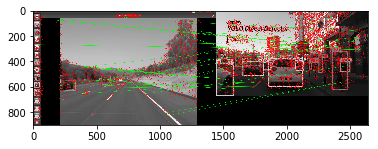

(<matplotlib.image.AxesImage at 0x10dc24828>, None)

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('c1.png',0)          # queryImage
img2 = cv2.imread('c2.jpg',0) # trainImage

sift = cv2.xfeatures2d.SURF_create()
kp1 = sift.detect(img1,None)
kp1, des1 = sift.compute(img1, kp1)
kp2 = sift.detect(img2,None)
kp2, des2 = sift.compute(img2, kp2)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import pandas as pd
import time
import cv2
import threading

vrec = cv2.VideoCapture('v2.mp4',0)
shape = [480,680]

mx = shape[0]
my = shape[1]//2
print("running")
kkk = 300*6*6
while(kkk):
    kkk-=1
    ret, scr = vrec.read()

ret, scr1 = vrec.read()
scr1 = cv2.resize(scr1, (680,480)) 
scr1 = cv2.cvtColor(scr1, cv2.COLOR_BGR2GRAY)
ret, scr2 = vrec.read()
scr2 = cv2.resize(scr2, (680,480)) 
scr2 = cv2.cvtColor(scr2, cv2.COLOR_BGR2GRAY)
while True:
    start_time = time.time()
    scr = scr1
    scr1 = scr2
    ret, scr2 = vrec.read()
#     ret, scr3 = vrec.read()
#     scr = np.mean(scr1,scr2,scr3)
    if not ret:
            break
    scr2 = cv2.resize(scr2, (680,480)) 
    scr2 = cv2.cvtColor(scr2, cv2.COLOR_BGR2GRAY)
    
    d0 = abs(scr1-scr)
    d1 = abs(scr2-scr)
    d2=d0+d1
    
    cv2.imshow('d0',d0)
    cv2.imshow('d1',d1)
    cv2.imshow('d2',d2)
#     cv2.imshow('d3',d3)
#     cv2.imshow('d4',d4)

    cv2.imshow('scr1',scr)
    print("FPS: ", 1.0 / (time.time() - start_time))
    q=cv2.waitKey(1)
    if q == 27:
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("c1.png",cv2.IMREAD_GRAYSCALE)
resize_pic=img
#resize_pic=cv2.resize(img,(640,480),interpolation=cv2.INTER_CUBIC)
edges = cv2.Canny(resize_pic,50,150)
lines_data = cv2.HoughLines(edges,1,np.pi/180,150)
# cv2.imshow('img',lines_data)
print(lines_data)
cv2.imshow('img3',resize_pic )

In [ ]:
cv2.destroyAllWindows()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
# import utils
import cv2
 

ap = argparse.ArgumentParser()
ap.add_argument("-c", "--clusters", required = True, type = int, help = "# of clusters")
args = vars(ap.parse_args())
 
image = cv2.imread('c1.png',1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [ ]:
# image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)
clt.fit(image)

In [ ]:
import numpy as np
import cv2
 
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

In [ ]:

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [ ]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = utils.centroid_histogram(clt)
bar = utils.plot_colors(hist, clt.cluster_centers_)
 
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256]),plt.show()
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(z,2,None,criteria,10,flags)
A = z[labels==0]
B = z[labels==1]
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()


In [ ]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

image = io.imread('c1.png')
io.imshow(image)
io.show()

rows = image.shape[0]
cols = image.shape[1]
 
image = image.reshape(image.shape[0]*image.shape[1],3)
kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 

np.save('codebook_tiger.npy',clusters.imsave('compressed_tiger.png',labels))

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture('720p.mp4')
ret,frame = cap.read()
# setup initial location of window
r,h,c,w = 0,0,50,50  # simply hardcoded the values
track_window = (c,r,w,h)
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
# mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
# cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 12, 0 )
kkk = 300*8*6
while(kkk):
    ret, scr = cap.read()
    kkk-=1
while(1):
    ret ,frame = cap.read() 
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        print(dst)
        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)
    
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

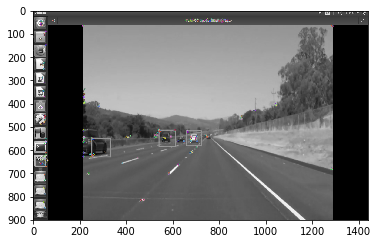

(<matplotlib.image.AxesImage at 0x124367160>, None)

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('c1.png',0)

is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    detector = cv2.SimpleBlobDetector()
else:
    detector = cv2.SimpleBlobDetector_create()

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, img)
# img2 = cv2.drawKeypoints(img,kp)#,color=(0,255,0), flags=0)
# kp = detector.detect(img)
plt.imshow(img2),plt.show()

In [7]:
import cv2
img=cv2.imread('c2.jpg',1)
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp=sift.detect(gray,None)
img=cv2.drawKeypoints(gray, kp, img)
cv2.imshow('img',img)
k = cv2.waitKey(60) & 0xff
if k == 27:
    cv2.destroyAllWindows()

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('c1.png',0)          # queryImage
img2 = cv2.imread('c1.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1 = sift.detect(img1,None)
kp1, des1 = sift.compute(img1, kp1)
kp2 = sift.detect(img2,None)
kp2, des2 = sift.compute(img2, kp2)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow('img',img3)
k = cv2.waitKey(60) & 0xff
if k == 27:
    cv2.destroyAllWindows()

In [38]:
pred=[]
frame = np.zeros((400,400,3), np.uint8) # drawing canvas
mp = np.array((2,1), np.float32) # measurement
tp = np.zeros((2,1), np.float32) # tracked / prediction
meas = []
def onmouse(k,x,y,s,p):
    global mp,meas
    mp = np.array([[np.float32(x)],[np.float32(y)]])
    meas.append((x,y))

def paint():
    global frame,meas,pred
    for i in range(len(meas)-1): cv2.line(frame,meas[i],meas[i+1],(0,100,0))
    for i in range(len(pred)-1): cv2.line(frame,pred[i],pred[i+1],(0,0,200))

def reset():
    global meas,pred,frame
    meas=[]
    pred=[]
    frame = np.zeros((400,400,3), np.uint8)

cv2.namedWindow("kalman")
cv2.setMouseCallback("kalman",onmouse);
kalman = cv2.KalmanFilter(4,2)
kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)
kalman.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)
kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32) * 0.03
#kalman.measurementNoiseCov = np.array([[1,0],[0,1]],np.float32) * 0.00003
while True:
    kalman.correct(mp)
    tp = kalman.predict()
    pred.append((int(tp[0]),int(tp[1])))
    paint()
    cv2.imshow("kalman",frame)
    k = cv2.waitKey(30) &0xFF
    if k == 27: break
    if k == 32: reset()

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import threading

cam = cv2.VideoCapture('v4.mp4',0)

def sift_thread():
    sift = cv2.xfeatures2d.SIFT_create()
    (kps, descs) = sift.detectAndCompute(gray, None)
    cv2.drawKeypoints(gray, kps, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow('SIFT Algorithm', img)


def surf_thread(gray):
    surf = cv2.xfeatures2d.SURF_create()
    (kps2, descs2) = surf.detectAndCompute(gray, None)
    cv2.drawKeypoints(gray, kps2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow('SURF Algorithm', img2)

def fast_thread():
    fast = cv2.FastFeatureDetector_create()
    kps3 = fast.detect(gray, None)
    cv2.drawKeypoints(gray, kps3, img3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow('FAST Algorithm', img3)

def orb_thread():
    orb = cv2.ORB_create()
    kps4 = orb.detect(gray, None)
    (kps4, des4) = orb.compute(gray, kps4)
    cv2.drawKeypoints(gray, kps4, img4, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imshow('ORB Algorithm', img4)

while True:
    (ret, img) = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    surf_thread(gray)
#     t1 = threading.Thread(name = 'SIFT Algorithm', target = sift_thread)
#     t2 = threading.Thread(name = 'SURF Algorithm', target = surf_thread)
#     t3 = threading.Thread(name = 'FAST Algorithm', target = fast_thread)
#     t4 = threading.Thread(name = 'ORB Algorithm', target = orb_thread)
#     t1.start()
#     t2.start()
#     t3.start()
#     t4.start()
#     t1.join()
#     t2.join()
#     t3.join()
#     t4.join()
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:356: error: (-215) size.width>0 && size.height>0 in function imshow
